In [1]:
import pandas as pd
import numpy as np

In [2]:
import statistics

In [3]:
df=pd.read_csv('zomato.csv')

In [4]:
df.head()

,url,address,name,online_order,book_table,rate,votes,phone,location,rest_type,dish_liked,cuisines,approx_cost(for two people),reviews_list,menu_item,listed_in(type),listed_in(city)
0,https://www.zomato.com/bangalore/jalsa-banasha...,"942, 21st Main Road, 2nd Stage, Banashankari, ...",Jalsa,Yes,Yes,4.1/5,775,080 42297555\r\n+91 9743772233,Banashankari,Casual Dining,"Pasta, Lunch Buffet, Masala Papad, Paneer Laja...","North Indian, Mughlai, Chinese",800,"[('Rated 4.0', 'RATED\n A beautiful place to ...",[],Buffet,Banashankari
1,https://www.zomato.com/bangalore/spice-elephan...,"2nd Floor, 80 Feet Road, Near Big Bazaar, 6th ...",Spice Elephant,Yes,No,4.1/5,787,080 41714161,Banashankari,Casual Dining,"Momos, Lunch Buffet, Chocolate Nirvana, Thai G...","Chinese, North Indian, Thai",800,"[('Rated 4.0', 'RATED\n Had been here for din...",[],Buffet,Banashankari
2,https://www.zomato.com/SanchurroBangalore?cont...,"1112, Next to KIMS Medical College, 17th Cross...",San Churro Cafe,Yes,No,3.8/5,918,+91 9663487993,Banashankari,"Cafe, Casual Dining","Churros, Cannelloni, Minestrone Soup, Hot Choc...","Cafe, Mexican, Italian",800,"[('Rated 3.0', ""RATED\n Ambience is not that ...",[],Buffet,Banashankari
3,https://www.zomato.com/bangalore/addhuri-udupi...,"1st Floor, Annakuteera, 3rd Stage, Banashankar...",Addhuri Udupi Bhojana,No,No,3.7/5,88,+91 9620009302,Banashankari,Quick Bites,Masala Dosa,"South Indian, North Indian",300,"[('Rated 4.0', ""RATED\n Great food and proper...",[],Buffet,Banashankari
4,https://www.zomato.com/bangalore/grand-village...,"10, 3rd Floor, Lakshmi Associates, Gandhi Baza...",Grand Village,No,No,3.8/5,166,+91 8026612447\r\n+91 9901210005,Basavanagudi,Casual Dining,"Panipuri, Gol Gappe","North Indian, Rajasthani",600,"[('Rated 4.0', 'RATED\n Very good restaurant ...",[],Buffet,Banashankari


# Dropping unnecessary columns from the dataframe

In [5]:
df=df.drop(columns=['url','address','phone','reviews_list','menu_item','dish_liked'])

In [6]:
# file='ZomatoFinal.xlsx'

In [7]:
# df.to_excel(file)

In [8]:
df.head()

,name,online_order,book_table,rate,votes,location,rest_type,cuisines,approx_cost(for two people),listed_in(type),listed_in(city)
0,Jalsa,Yes,Yes,4.1/5,775,Banashankari,Casual Dining,"North Indian, Mughlai, Chinese",800,Buffet,Banashankari
1,Spice Elephant,Yes,No,4.1/5,787,Banashankari,Casual Dining,"Chinese, North Indian, Thai",800,Buffet,Banashankari
2,San Churro Cafe,Yes,No,3.8/5,918,Banashankari,"Cafe, Casual Dining","Cafe, Mexican, Italian",800,Buffet,Banashankari
3,Addhuri Udupi Bhojana,No,No,3.7/5,88,Banashankari,Quick Bites,"South Indian, North Indian",300,Buffet,Banashankari
4,Grand Village,No,No,3.8/5,166,Basavanagudi,Casual Dining,"North Indian, Rajasthani",600,Buffet,Banashankari


# Total number of data points

In [9]:
len(df)

51717

# Checking for null values

In [10]:
df.isna().sum()

name                              0
online_order                      0
book_table                        0
rate                           7775
votes                             0
location                         21
rest_type                       227
cuisines                         45
approx_cost(for two people)     346
listed_in(type)                   0
listed_in(city)                   0
dtype: int64

In [11]:
# There is repetition of restaurant names for different listed_in types
df[df['name']=='Jalsa'].head()

,name,online_order,book_table,rate,votes,location,rest_type,cuisines,approx_cost(for two people),listed_in(type),listed_in(city)
0,Jalsa,Yes,Yes,4.1/5,775,Banashankari,Casual Dining,"North Indian, Mughlai, Chinese",800,Buffet,Banashankari
456,Jalsa,Yes,Yes,4.1/5,775,Banashankari,Casual Dining,"North Indian, Mughlai, Chinese",800,Delivery,Banashankari
559,Jalsa,Yes,Yes,4.1/5,775,Banashankari,Casual Dining,"North Indian, Mughlai, Chinese",800,Dine-out,Banashankari
2488,Jalsa,Yes,Yes,4.1/5,775,Banashankari,Casual Dining,"North Indian, Mughlai, Chinese",800,Buffet,Basavanagudi
2966,Jalsa,Yes,Yes,4.1/5,775,Banashankari,Casual Dining,"North Indian, Mughlai, Chinese",800,Delivery,Basavanagudi


# Fixing datatypes and null values

# Rate

In [12]:
df['rate'].isna().sum()

7775

In [13]:
type((df.loc[0,'rate']))

str

In [14]:
for i in df.index:
    a=df.loc[i,'rate']
    if type(df.loc[i,'rate'])==str:
        p=df.loc[i,'rate'].find('/')
        df.loc[i,'rate']=df.loc[i,'rate'][:p]
        

In [15]:
df['rate'].value_counts()

NE      2208
3.9     2098
3.8     2022
3.7     2011
3.9     1874
        ... 
2.2        7
2.0        7
2.0        4
1.8        3
1.8        2
Name: rate, Length: 64, dtype: int64

In [16]:
df['rate'].replace({'NE':np.nan,'':np.nan},inplace=True)

In [17]:
df['rate']=df['rate'].astype('float')

In [18]:
df['rate'].isna().sum()

10052

In [19]:
rate_null=df[df['rate'].isna()]
rate_null.head()

,name,online_order,book_table,rate,votes,location,rest_type,cuisines,approx_cost(for two people),listed_in(type),listed_in(city)
72,Spicy Tandoor,No,No,NaN,0,Banashankari,Quick Bites,North Indian,150,Delivery,Banashankari
75,Om Sri Vinayaka Chats,No,No,NaN,0,Banashankari,"Takeaway, Delivery","Street Food, Fast Food",500,Delivery,Banashankari
84,Chill Out,No,No,NaN,0,Banashankari,Quick Bites,"South Indian, Chinese",100,Delivery,Banashankari
90,Me And My Cake,No,No,NaN,0,Banashankari,Delivery,"Bakery, Desserts",500,Delivery,Banashankari
91,Sunsadm,No,No,NaN,0,Banashankari,"Takeaway, Delivery",South Indian,400,Delivery,Banashankari


In [20]:
df[df['name']=='Om Sri Vinayaka Chats']

,name,online_order,book_table,rate,votes,location,rest_type,cuisines,approx_cost(for two people),listed_in(type),listed_in(city)
75,Om Sri Vinayaka Chats,No,No,NaN,0,Banashankari,"Takeaway, Delivery","Street Food, Fast Food",500,Delivery,Banashankari


In [21]:
for i in rate_null.index:
    rate_l=df[df['name']==df.iloc[i]['name']]['rate'].values
    df.loc[i,'rate']=round(rate_l[rate_l>=0].mean(),1)

C:\Users\jesuj\AppData\Local\Temp/ipykernel_20092/2409964071.py:3: RuntimeWarning: Mean of empty slice.
  df.loc[i,'rate']=round(rate_l[rate_l>=0].mean(),1)
D:\Ananconda3\lib\site-packages\numpy\core\_methods.py:188: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)


In [22]:
df['rate'].isna().sum()

7507

In [23]:
rate_null=df[df['rate'].isna()]
rate_null.head()

,name,online_order,book_table,rate,votes,location,rest_type,cuisines,approx_cost(for two people),listed_in(type),listed_in(city)
75,Om Sri Vinayaka Chats,No,No,NaN,0,Banashankari,"Takeaway, Delivery","Street Food, Fast Food",500,Delivery,Banashankari
91,Sunsadm,No,No,NaN,0,Banashankari,"Takeaway, Delivery",South Indian,400,Delivery,Banashankari
92,Annapooraneshwari Mess,No,No,NaN,0,Banashankari,Mess,South Indian,200,Delivery,Banashankari
107,Coffee Shopee,No,No,NaN,0,Banashankari,"Takeaway, Delivery",Beverages,250,Delivery,Banashankari
113,Dharwad Line Bazaar Mishra Pedha,No,No,NaN,0,Banashankari,Dessert Parlor,Mithai,150,Delivery,Banashankari


In [24]:
null_d=pd.DataFrame(columns=df.columns)

In [25]:
null_d.head()

,name,online_order,book_table,rate,votes,location,rest_type,cuisines,approx_cost(for two people),listed_in(type),listed_in(city)


In [26]:
null_d=null_d.append(rate_null)

In [27]:
null_d

,name,online_order,book_table,rate,votes,location,rest_type,cuisines,approx_cost(for two people),listed_in(type),listed_in(city)
75,Om Sri Vinayaka Chats,No,No,NaN,0,Banashankari,"Takeaway, Delivery","Street Food, Fast Food",500,Delivery,Banashankari
91,Sunsadm,No,No,NaN,0,Banashankari,"Takeaway, Delivery",South Indian,400,Delivery,Banashankari
92,Annapooraneshwari Mess,No,No,NaN,0,Banashankari,Mess,South Indian,200,Delivery,Banashankari
107,Coffee Shopee,No,No,NaN,0,Banashankari,"Takeaway, Delivery",Beverages,250,Delivery,Banashankari
113,Dharwad Line Bazaar Mishra Pedha,No,No,NaN,0,Banashankari,Dessert Parlor,Mithai,150,Delivery,Banashankari
...,...,...,...,...,...,...,...,...,...,...,...
51644,Punjabi Thadka,No,No,NaN,0,Brookefield,Quick Bites,North Indian,400,Dine-out,Whitefield
51675,Topsy Turvey,No,No,NaN,0,Whitefield,Bar,Finger Food,900,Drinks & nightlife,Whitefield
51710,Topsy Turvey,No,No,NaN,0,Whitefield,Bar,Finger Food,900,Pubs and bars,Whitefield
51713,Vinod Bar And Restaurant,No,No,NaN,0,Whitefield,Bar,Finger Food,600,Pubs and bars,Whitefield


In [28]:
df.drop(df[df['rate'].isna()].index,inplace=True)

In [29]:
df.head()

,name,online_order,book_table,rate,votes,location,rest_type,cuisines,approx_cost(for two people),listed_in(type),listed_in(city)
0,Jalsa,Yes,Yes,4.1,775,Banashankari,Casual Dining,"North Indian, Mughlai, Chinese",800,Buffet,Banashankari
1,Spice Elephant,Yes,No,4.1,787,Banashankari,Casual Dining,"Chinese, North Indian, Thai",800,Buffet,Banashankari
2,San Churro Cafe,Yes,No,3.8,918,Banashankari,"Cafe, Casual Dining","Cafe, Mexican, Italian",800,Buffet,Banashankari
3,Addhuri Udupi Bhojana,No,No,3.7,88,Banashankari,Quick Bites,"South Indian, North Indian",300,Buffet,Banashankari
4,Grand Village,No,No,3.8,166,Basavanagudi,Casual Dining,"North Indian, Rajasthani",600,Buffet,Banashankari


In [30]:
df.isna().sum()

name                             0
online_order                     0
book_table                       0
rate                             0
votes                            0
location                        10
rest_type                      183
cuisines                        25
approx_cost(for two people)    279
listed_in(type)                  0
listed_in(city)                  0
dtype: int64

# Location

In [31]:
# Since Location and listed_in(city) convey the same information, we drop the column listed_in(city)

In [32]:
df.drop(columns=['listed_in(city)'],inplace=True)

In [33]:
df.isna().sum()

name                             0
online_order                     0
book_table                       0
rate                             0
votes                            0
location                        10
rest_type                      183
cuisines                        25
approx_cost(for two people)    279
listed_in(type)                  0
dtype: int64

# Rest_Type

In [34]:
df.reset_index(inplace=True,drop=True)

In [35]:
df['rest_type'].value_counts()

Quick Bites                   14985
Casual Dining                  9922
Cafe                           3477
Dessert Parlor                 2019
Delivery                       1947
                              ...  
Food Court, Beverage Shop         2
Dessert Parlor, Food Court        2
Bakery, Beverage Shop             1
Sweet Shop, Dessert Parlor        1
Quick Bites, Kiosk                1
Name: rest_type, Length: 91, dtype: int64

In [36]:
df['rest_type'].isna().sum()

183

In [37]:
rest_type_null=df[df['rest_type'].isna()].index

In [38]:
rest_type_null

Int64Index([  886,  1174,  1243,  1412,  1439,  1739,  1753,  1997,  2053,
             2072,
            ...
            42582, 42725, 42763, 42801, 43117, 43132, 43323, 43514, 43808,
            43897],
           dtype='int64', length=183)

In [39]:
df[df['rest_type'].isna()]

,name,online_order,book_table,rate,votes,location,rest_type,cuisines,approx_cost(for two people),listed_in(type)
886,Mughlai Kitchen,Yes,No,3.5,269,BTM,NaN,"Mughlai, North Indian, Chinese, Momos",600,Delivery
1174,Eat & Joy Restaurant,Yes,No,3.0,7,JP Nagar,NaN,"Fast Food, Finger Food",300,Delivery
1243,Kababish Restaurant,Yes,No,3.6,15,BTM,NaN,"North Indian, Chinese, Arabian",700,Delivery
1412,Goli Vada Pav No 1,No,No,3.4,0,Bannerghatta Road,NaN,"Street Food, Burger",150,Delivery
1439,Ammi's Biryani,No,No,2.4,392,Bannerghatta Road,NaN,"Biryani, North Indian",500,Delivery
...,...,...,...,...,...,...,...,...,...,...
43132,Special Biryani House,Yes,No,3.2,202,Whitefield,NaN,"North Indian, Biryani, Chinese",400,Delivery
43323,Bawarchi Restaurant,Yes,No,3.0,0,Whitefield,NaN,"Biryani, North Indian, Chinese, Rolls, Beverages",400,Delivery
43514,Vijayawada Heights,Yes,No,3.2,8,Whitefield,NaN,North Indian,600,Delivery
43808,Special Biryani House,Yes,No,3.2,202,Whitefield,NaN,"North Indian, Biryani, Chinese",400,Dine-out


In [40]:
df[df['name']=='Mughlai Kitchen']

,name,online_order,book_table,rate,votes,location,rest_type,cuisines,approx_cost(for two people),listed_in(type)
886,Mughlai Kitchen,Yes,No,3.5,269,BTM,NaN,"Mughlai, North Indian, Chinese, Momos",600,Delivery
2087,Mughlai Kitchen,Yes,No,3.5,269,BTM,NaN,"Mughlai, North Indian, Chinese, Momos",600,Dine-out
8146,Mughlai Kitchen,Yes,No,3.5,270,BTM,NaN,"Mughlai, North Indian, Chinese, Momos",600,Delivery
9096,Mughlai Kitchen,Yes,No,3.5,270,BTM,NaN,"Mughlai, North Indian, Chinese, Momos",600,Dine-out
11794,Mughlai Kitchen,Yes,No,3.5,0,Electronic City,NaN,"Mughlai, North Indian, Chinese, Momos",600,Delivery
12098,Mughlai Kitchen,Yes,No,3.5,0,Electronic City,NaN,"Mughlai, North Indian, Chinese, Momos",600,Dine-out
18859,Mughlai Kitchen,Yes,No,3.5,270,BTM,NaN,"Mughlai, North Indian, Chinese, Momos",600,Delivery


In [41]:
index=df[df['rest_type'].isna()].index

In [42]:
index

Int64Index([  886,  1174,  1243,  1412,  1439,  1739,  1753,  1997,  2053,
             2072,
            ...
            42582, 42725, 42763, 42801, 43117, 43132, 43323, 43514, 43808,
            43897],
           dtype='int64', length=183)

In [43]:
for i in index:
    name=df.loc[i,'name']
    list=df[df['name']==name]['rest_type'].values
    for j in list:
        if type(j)!=float:
            df.loc[i,'rest_type']=j

In [44]:
df['rest_type'].isna().sum()

83

In [45]:
i=df[df['rest_type'].isna()].index
i

Int64Index([  886,  1174,  1997,  2087,  3685,  3726,  4020,  4042,  6215,
             6342,  7047,  7098,  7443,  7586,  8146,  8448,  8629,  9096,
            11794, 11962, 11984, 12098, 12149, 12235, 13795, 14253, 14617,
            15219, 15398, 16230, 16412, 17012, 17191, 17603, 18134, 18859,
            19198, 19308, 19511, 19934, 19985, 20404, 20999, 21468, 22085,
            22468, 23148, 23264, 23686, 23763, 24495, 24514, 25514, 25568,
            26015, 26093, 26870, 26887, 27776, 27833, 27986, 28656, 28904,
            29212, 30029, 30076, 30246, 30764, 31515, 31534, 34916, 35640,
            36557, 38404, 38722, 39042, 39105, 42129, 42293, 42763, 42801,
            43132, 43808],
           dtype='int64')

In [46]:
df.drop(index=i,inplace=True)

In [47]:
df.isna().sum()

name                             0
online_order                     0
book_table                       0
rate                             0
votes                            0
location                        10
rest_type                        0
cuisines                        25
approx_cost(for two people)    279
listed_in(type)                  0
dtype: int64

# Cuisines

In [48]:
df[df['cuisines'].isna()]

,name,online_order,book_table,rate,votes,location,rest_type,cuisines,approx_cost(for two people),listed_in(type)
400,Lassi Spot,Yes,No,3.3,4,Kumaraswamy Layout,Beverage Shop,NaN,100,Delivery
3528,Chai Point,Yes,No,3.9,0,Marathahalli,"Beverage Shop, Quick Bites",NaN,200,Delivery
6024,Noodle Oodle,Yes,No,3.6,9,Whitefield,Delivery,NaN,400,Delivery
6033,Taste of Chettinad,Yes,No,3.2,0,Whitefield,Delivery,NaN,400,Delivery
19115,Lassi Spot,Yes,No,3.3,4,Kumaraswamy Layout,Beverage Shop,NaN,100,Delivery
21189,Swagatham Rayalaseema Ruchulu,Yes,No,3.3,24,Kalyan Nagar,Casual Dining,NaN,600,Dine-out
22414,Swagatham Rayalaseema Ruchulu,Yes,No,3.3,24,Kalyan Nagar,Casual Dining,NaN,600,Dine-out
22609,New Taj Biryani Centre,No,No,3.5,0,NaN,Quick Bites,NaN,NaN,Dine-out
22681,AB's - Absolute Barbecues,No,No,4.8,0,NaN,Casual Dining,NaN,NaN,Buffet
23750,Manchow,No,No,3.8,0,NaN,Casual Dining,NaN,NaN,Delivery


In [49]:
index=df[df['cuisines'].isna()].index
index

Int64Index([  400,  3528,  6024,  6033, 19115, 21189, 22414, 22609, 22681,
            23750, 24493, 25060, 26241, 26868, 27439, 29675, 33454, 34742,
            34756, 35017, 36892, 39184, 39893, 43167, 43238],
           dtype='int64')

In [50]:
for i in index:
    name=df.loc[i,'name']
    list=df[df['name']==name]['cuisines'].values
    for j in list:
        if type(j)!=float:
            df.loc[i,'cuisines']=j

In [51]:
df[df['cuisines'].isna()]

,name,online_order,book_table,rate,votes,location,rest_type,cuisines,approx_cost(for two people),listed_in(type)
400,Lassi Spot,Yes,No,3.3,4,Kumaraswamy Layout,Beverage Shop,NaN,100,Delivery
19115,Lassi Spot,Yes,No,3.3,4,Kumaraswamy Layout,Beverage Shop,NaN,100,Delivery
21189,Swagatham Rayalaseema Ruchulu,Yes,No,3.3,24,Kalyan Nagar,Casual Dining,NaN,600,Dine-out
22414,Swagatham Rayalaseema Ruchulu,Yes,No,3.3,24,Kalyan Nagar,Casual Dining,NaN,600,Dine-out


In [52]:
i=df[df['cuisines'].isna()].index

In [53]:
df.drop(index=i,inplace=True)

In [54]:
df.isna().sum()

name                             0
online_order                     0
book_table                       0
rate                             0
votes                            0
location                        10
rest_type                        0
cuisines                         0
approx_cost(for two people)    279
listed_in(type)                  0
dtype: int64

# Approx. Cost for 2 people

In [55]:
df[df['approx_cost(for two people)'].isna()]

,name,online_order,book_table,rate,votes,location,rest_type,cuisines,approx_cost(for two people),listed_in(type)
1531,Innate,No,No,3.2,0,JP Nagar,Delivery,Beverages,NaN,Delivery
3271,The Hub - Ibis Bengaluru,No,No,3.9,237,Marathahalli,Bar,Finger Food,NaN,Buffet
3446,North Indian Kitchen,No,No,3.2,13,HSR,Takeaway,North Indian,NaN,Delivery
3530,Only Parathas,No,No,3.3,6,HSR,"Takeaway, Delivery",North Indian,NaN,Delivery
3850,Innate,No,No,3.2,0,Sarjapur Road,Delivery,Beverages,NaN,Delivery
...,...,...,...,...,...,...,...,...,...,...
43478,Innate,No,No,3.2,0,Whitefield,Delivery,Beverages,NaN,Delivery
43582,Cinnabon,No,No,4.0,80,Whitefield,Quick Bites,"Beverages, American, Bakery",NaN,Desserts
43850,Mast Kalandar,No,No,2.6,76,Whitefield,Casual Dining,North Indian,NaN,Dine-out
43869,Karavalli Food Court,No,No,3.2,4,Whitefield,Casual Dining,South Indian,NaN,Dine-out


In [56]:
index=df[df['approx_cost(for two people)'].isna()].index

In [57]:
for i in index:
    name=df.loc[i,'name']
    list=df[df['name']==name]['approx_cost(for two people)'].values
    for j in list:
        if type(j)!=float:
            df.loc[i,'approx_cost(for two people)']=j

In [58]:
df[df['approx_cost(for two people)'].isna()]

,name,online_order,book_table,rate,votes,location,rest_type,cuisines,approx_cost(for two people),listed_in(type)
1531,Innate,No,No,3.2,0,JP Nagar,Delivery,Beverages,NaN,Delivery
3271,The Hub - Ibis Bengaluru,No,No,3.9,237,Marathahalli,Bar,Finger Food,NaN,Buffet
3446,North Indian Kitchen,No,No,3.2,13,HSR,Takeaway,North Indian,NaN,Delivery
3850,Innate,No,No,3.2,0,Sarjapur Road,Delivery,Beverages,NaN,Delivery
4226,The Hub - Ibis Bengaluru,No,No,3.9,237,Marathahalli,Bar,Finger Food,NaN,Dine-out
...,...,...,...,...,...,...,...,...,...,...
42728,The Hub - Ibis Bengaluru,No,No,3.9,237,Marathahalli,Bar,Finger Food,NaN,Dine-out
42895,The Hub - Ibis Bengaluru,No,No,3.9,237,Marathahalli,Bar,Finger Food,NaN,Drinks & nightlife
42914,The Hub - Ibis Bengaluru,No,No,3.9,237,Marathahalli,Bar,Finger Food,NaN,Pubs and bars
43478,Innate,No,No,3.2,0,Whitefield,Delivery,Beverages,NaN,Delivery


In [59]:
i=df[df['approx_cost(for two people)'].isna()].index

In [60]:
df.drop(index=i,inplace=True)

In [61]:
df.reset_index(drop=True,inplace=True)

In [62]:
df.head()

,name,online_order,book_table,rate,votes,location,rest_type,cuisines,approx_cost(for two people),listed_in(type)
0,Jalsa,Yes,Yes,4.1,775,Banashankari,Casual Dining,"North Indian, Mughlai, Chinese",800,Buffet
1,Spice Elephant,Yes,No,4.1,787,Banashankari,Casual Dining,"Chinese, North Indian, Thai",800,Buffet
2,San Churro Cafe,Yes,No,3.8,918,Banashankari,"Cafe, Casual Dining","Cafe, Mexican, Italian",800,Buffet
3,Addhuri Udupi Bhojana,No,No,3.7,88,Banashankari,Quick Bites,"South Indian, North Indian",300,Buffet
4,Grand Village,No,No,3.8,166,Basavanagudi,Casual Dining,"North Indian, Rajasthani",600,Buffet


In [63]:
len(df)

44022

In [64]:
df.isna().sum()

name                            0
online_order                    0
book_table                      0
rate                            0
votes                           0
location                       10
rest_type                       0
cuisines                        0
approx_cost(for two people)     0
listed_in(type)                 0
dtype: int64

In [65]:
df

,name,online_order,book_table,rate,votes,location,rest_type,cuisines,approx_cost(for two people),listed_in(type)
0,Jalsa,Yes,Yes,4.1,775,Banashankari,Casual Dining,"North Indian, Mughlai, Chinese",800,Buffet
1,Spice Elephant,Yes,No,4.1,787,Banashankari,Casual Dining,"Chinese, North Indian, Thai",800,Buffet
2,San Churro Cafe,Yes,No,3.8,918,Banashankari,"Cafe, Casual Dining","Cafe, Mexican, Italian",800,Buffet
3,Addhuri Udupi Bhojana,No,No,3.7,88,Banashankari,Quick Bites,"South Indian, North Indian",300,Buffet
4,Grand Village,No,No,3.8,166,Basavanagudi,Casual Dining,"North Indian, Rajasthani",600,Buffet
...,...,...,...,...,...,...,...,...,...,...
44017,The Farm House Bar n Grill,No,No,3.7,34,Whitefield,"Casual Dining, Bar","North Indian, Continental",800,Pubs and bars
44018,Bhagini,No,No,2.5,81,Whitefield,"Casual Dining, Bar","Andhra, South Indian, Chinese, North Indian",800,Pubs and bars
44019,Best Brews - Four Points by Sheraton Bengaluru...,No,No,3.6,27,Whitefield,Bar,Continental,"1,500",Pubs and bars
44020,Chime - Sheraton Grand Bengaluru Whitefield Ho...,No,Yes,4.3,236,"ITPL Main Road, Whitefield",Bar,Finger Food,"2,500",Pubs and bars


In [66]:
df['cuisines'].value_counts()

North Indian                                                        2306
North Indian, Chinese                                               2055
South Indian                                                        1337
Biryani                                                              722
Bakery, Desserts                                                     719
                                                                    ... 
Continental, North Indian, Chinese, American, Pizza, Finger Food       1
Arabian, Asian, Chinese, Afghan                                        1
Cafe, Beverages, Fast Food, Street Food                                1
Beverages, Ice Cream, Desserts                                         1
North Indian, Chinese, Arabian, Momos                                  1
Name: cuisines, Length: 2412, dtype: int64

In [67]:
# df.loc[1,'cuisines']

In [68]:
# string='North Indian,Continental'
# string.split(',')
# for i in string.split(','):
#     print(i.strip())

In [69]:
# 'cuisine_'+'Continental'

In [70]:
for i in df.index:
    string=df.loc[i,'cuisines']
    l=string.split(',')
    for j in l:
        strp=j.strip()
        column_name='cuisine_'+strp
        df.loc[i,column_name]='Yes'

D:\Ananconda3\lib\site-packages\pandas\core\indexing.py:1684: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead.  To get a de-fragmented frame, use `newframe = frame.copy()`
  self.obj[key] = infer_fill_value(value)


In [71]:
# for i in df.index:
#     string=df.loc[i,'cuisines']
#     l=string.split(',')
#     for j in l:
#         strp=j.strip()
#         column_name='cuisine_'+strp
#         df.loc[i,column_name]='Yes'

In [72]:
df.head()

,name,online_order,book_table,rate,votes,location,rest_type,cuisines,approx_cost(for two people),listed_in(type),...,cuisine_British,cuisine_Paan,cuisine_German,cuisine_Russian,cuisine_Drinks Only,cuisine_Jewish,cuisine_Vegan,cuisine_Pan Asian,cuisine_Raw Meats,cuisine_Sindhi
0,Jalsa,Yes,Yes,4.1,775,Banashankari,Casual Dining,"North Indian, Mughlai, Chinese",800,Buffet,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,Spice Elephant,Yes,No,4.1,787,Banashankari,Casual Dining,"Chinese, North Indian, Thai",800,Buffet,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,San Churro Cafe,Yes,No,3.8,918,Banashankari,"Cafe, Casual Dining","Cafe, Mexican, Italian",800,Buffet,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,Addhuri Udupi Bhojana,No,No,3.7,88,Banashankari,Quick Bites,"South Indian, North Indian",300,Buffet,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,Grand Village,No,No,3.8,166,Basavanagudi,Casual Dining,"North Indian, Rajasthani",600,Buffet,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [73]:
df.replace(np.nan,'No',inplace=True)

In [74]:
df.head()

,name,online_order,book_table,rate,votes,location,rest_type,cuisines,approx_cost(for two people),listed_in(type),...,cuisine_British,cuisine_Paan,cuisine_German,cuisine_Russian,cuisine_Drinks Only,cuisine_Jewish,cuisine_Vegan,cuisine_Pan Asian,cuisine_Raw Meats,cuisine_Sindhi
0,Jalsa,Yes,Yes,4.1,775,Banashankari,Casual Dining,"North Indian, Mughlai, Chinese",800,Buffet,...,No,No,No,No,No,No,No,No,No,No
1,Spice Elephant,Yes,No,4.1,787,Banashankari,Casual Dining,"Chinese, North Indian, Thai",800,Buffet,...,No,No,No,No,No,No,No,No,No,No
2,San Churro Cafe,Yes,No,3.8,918,Banashankari,"Cafe, Casual Dining","Cafe, Mexican, Italian",800,Buffet,...,No,No,No,No,No,No,No,No,No,No
3,Addhuri Udupi Bhojana,No,No,3.7,88,Banashankari,Quick Bites,"South Indian, North Indian",300,Buffet,...,No,No,No,No,No,No,No,No,No,No
4,Grand Village,No,No,3.8,166,Basavanagudi,Casual Dining,"North Indian, Rajasthani",600,Buffet,...,No,No,No,No,No,No,No,No,No,No


In [75]:
sorted(df.columns)

['approx_cost(for two people)',
 'book_table',
 'cuisine_Afghan',
 'cuisine_Afghani',
 'cuisine_African',
 'cuisine_American',
 'cuisine_Andhra',
 'cuisine_Arabian',
 'cuisine_Asian',
 'cuisine_Assamese',
 'cuisine_Australian',
 'cuisine_Awadhi',
 'cuisine_BBQ',
 'cuisine_Bakery',
 'cuisine_Bar Food',
 'cuisine_Belgian',
 'cuisine_Bengali',
 'cuisine_Beverages',
 'cuisine_Bihari',
 'cuisine_Biryani',
 'cuisine_Bohri',
 'cuisine_British',
 'cuisine_Bubble Tea',
 'cuisine_Burger',
 'cuisine_Burmese',
 'cuisine_Cafe',
 'cuisine_Cantonese',
 'cuisine_Charcoal Chicken',
 'cuisine_Chettinad',
 'cuisine_Chinese',
 'cuisine_Coffee',
 'cuisine_Continental',
 'cuisine_Desserts',
 'cuisine_Drinks Only',
 'cuisine_European',
 'cuisine_Fast Food',
 'cuisine_Finger Food',
 'cuisine_French',
 'cuisine_German',
 'cuisine_Goan',
 'cuisine_Greek',
 'cuisine_Grill',
 'cuisine_Gujarati',
 'cuisine_Healthy Food',
 'cuisine_Hot dogs',
 'cuisine_Hyderabadi',
 'cuisine_Ice Cream',
 'cuisine_Indian',
 'cuisine

# Listed in type

In [76]:
df['listed_in(type)'].value_counts()

Delivery              21997
Dine-out              14898
Desserts               2987
Cafes                  1562
Drinks & nightlife     1061
Buffet                  866
Pubs and bars           651
Name: listed_in(type), dtype: int64

# Rest_type

In [77]:
df['rest_type'].value_counts()

Quick Bites                   15017
Casual Dining                  9919
Cafe                           3457
Dessert Parlor                 2019
Delivery                       1944
                              ...  
Food Court, Beverage Shop         2
Dessert Parlor, Food Court        2
Bakery, Beverage Shop             1
Sweet Shop, Dessert Parlor        1
Quick Bites, Kiosk                1
Name: rest_type, Length: 91, dtype: int64

In [78]:
'Quick Bites'.split(',')

['Quick Bites']

In [79]:
for i in df.index:
    string=df.loc[i,'rest_type']
    l=string.split(',')
    for j in l:
        strp=j.strip()
        column_name='rest_type_'+strp
        df.loc[i,column_name]='Yes'

D:\Ananconda3\lib\site-packages\pandas\core\indexing.py:1684: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead.  To get a de-fragmented frame, use `newframe = frame.copy()`
  self.obj[key] = infer_fill_value(value)


In [80]:
df.replace(np.nan,'No',inplace=True)

In [81]:
df.head()

,name,online_order,book_table,rate,votes,location,rest_type,cuisines,approx_cost(for two people),listed_in(type),...,rest_type_Microbrewery,rest_type_Lounge,rest_type_Food Court,rest_type_Dhaba,rest_type_Club,rest_type_Irani Cafee,rest_type_Confectionery,rest_type_Bhojanalya,rest_type_Pop Up,rest_type_Meat Shop
0,Jalsa,Yes,Yes,4.1,775,Banashankari,Casual Dining,"North Indian, Mughlai, Chinese",800,Buffet,...,No,No,No,No,No,No,No,No,No,No
1,Spice Elephant,Yes,No,4.1,787,Banashankari,Casual Dining,"Chinese, North Indian, Thai",800,Buffet,...,No,No,No,No,No,No,No,No,No,No
2,San Churro Cafe,Yes,No,3.8,918,Banashankari,"Cafe, Casual Dining","Cafe, Mexican, Italian",800,Buffet,...,No,No,No,No,No,No,No,No,No,No
3,Addhuri Udupi Bhojana,No,No,3.7,88,Banashankari,Quick Bites,"South Indian, North Indian",300,Buffet,...,No,No,No,No,No,No,No,No,No,No
4,Grand Village,No,No,3.8,166,Basavanagudi,Casual Dining,"North Indian, Rajasthani",600,Buffet,...,No,No,No,No,No,No,No,No,No,No


In [82]:
df['name'].replace({'Ã\x83Â\x83Ã\x82Â\x83Ã\x83Â\x82Ã\x82Â\x83Ã\x83Â\x83Ã\x82Â\x82Ã\x83Â\x82Ã\x82Â\x83Ã\x83Â\x83Ã\x82Â\x83Ã\x83Â\x82Ã\x82Â\x82Ã\x83Â\x83Ã\x82Â\x82Ã\x83Â\x82Ã\x82Â©':''},regex=True,inplace=True)

In [83]:
df.replace({'Ã\x83Â\x83Ã\x82Â\x83Ã\x83Â\x82Ã\x82Â\x83Ã\x83Â\x83Ã\x82Â\x82Ã\x83Â\x82Ã\x82Â©':'e',
           'Ã\x83Â\x83Ã\x82Â\x83Ã\x83Â\x82Ã\x82Â\x83Ã\x83Â\x83Ã\x82Â\x82Ã\x83Â\x82Ã\x82Â©':'e',
           'Ã\x83Â\x83Ã\x82Â\x83Ã\x83Â\x82Ã\x82Â\x83Ã\x83Â\x83Ã\x82Â\x82Ã\x83Â\x82Ã\x82Â©':'e',
           'Ã\x83Â\x83Ã\x82Â\x83Ã\x83Â\x82Ã\x82Â\x83Ã\x83Â\x83Ã\x82Â\x82Ã\x83Â\x82Ã\x82Â©':'e'},regex=True,inplace=True)

In [84]:
# df.to_excel('cleaned_zomato.xlsx')

In [85]:
# df.to_csv('cleaned_zomato.csv')

In [86]:
df.isna().sum()[df.isna().sum()!=0]

Series([], dtype: int64)

In [87]:
df.shape

(44022, 141)

In [88]:
df.head()

,name,online_order,book_table,rate,votes,location,rest_type,cuisines,approx_cost(for two people),listed_in(type),...,rest_type_Microbrewery,rest_type_Lounge,rest_type_Food Court,rest_type_Dhaba,rest_type_Club,rest_type_Irani Cafee,rest_type_Confectionery,rest_type_Bhojanalya,rest_type_Pop Up,rest_type_Meat Shop
0,Jalsa,Yes,Yes,4.1,775,Banashankari,Casual Dining,"North Indian, Mughlai, Chinese",800,Buffet,...,No,No,No,No,No,No,No,No,No,No
1,Spice Elephant,Yes,No,4.1,787,Banashankari,Casual Dining,"Chinese, North Indian, Thai",800,Buffet,...,No,No,No,No,No,No,No,No,No,No
2,San Churro Cafe,Yes,No,3.8,918,Banashankari,"Cafe, Casual Dining","Cafe, Mexican, Italian",800,Buffet,...,No,No,No,No,No,No,No,No,No,No
3,Addhuri Udupi Bhojana,No,No,3.7,88,Banashankari,Quick Bites,"South Indian, North Indian",300,Buffet,...,No,No,No,No,No,No,No,No,No,No
4,Grand Village,No,No,3.8,166,Basavanagudi,Casual Dining,"North Indian, Rajasthani",600,Buffet,...,No,No,No,No,No,No,No,No,No,No


In [89]:
df.columns

Index(['name', 'online_order', 'book_table', 'rate', 'votes', 'location',
       'rest_type', 'cuisines', 'approx_cost(for two people)',
       'listed_in(type)',
       ...
       'rest_type_Microbrewery', 'rest_type_Lounge', 'rest_type_Food Court',
       'rest_type_Dhaba', 'rest_type_Club', 'rest_type_Irani Cafee',
       'rest_type_Confectionery', 'rest_type_Bhojanalya', 'rest_type_Pop Up',
       'rest_type_Meat Shop'],
      dtype='object', length=141)

In [90]:
df.head()

,name,online_order,book_table,rate,votes,location,rest_type,cuisines,approx_cost(for two people),listed_in(type),...,rest_type_Microbrewery,rest_type_Lounge,rest_type_Food Court,rest_type_Dhaba,rest_type_Club,rest_type_Irani Cafee,rest_type_Confectionery,rest_type_Bhojanalya,rest_type_Pop Up,rest_type_Meat Shop
0,Jalsa,Yes,Yes,4.1,775,Banashankari,Casual Dining,"North Indian, Mughlai, Chinese",800,Buffet,...,No,No,No,No,No,No,No,No,No,No
1,Spice Elephant,Yes,No,4.1,787,Banashankari,Casual Dining,"Chinese, North Indian, Thai",800,Buffet,...,No,No,No,No,No,No,No,No,No,No
2,San Churro Cafe,Yes,No,3.8,918,Banashankari,"Cafe, Casual Dining","Cafe, Mexican, Italian",800,Buffet,...,No,No,No,No,No,No,No,No,No,No
3,Addhuri Udupi Bhojana,No,No,3.7,88,Banashankari,Quick Bites,"South Indian, North Indian",300,Buffet,...,No,No,No,No,No,No,No,No,No,No
4,Grand Village,No,No,3.8,166,Basavanagudi,Casual Dining,"North Indian, Rajasthani",600,Buffet,...,No,No,No,No,No,No,No,No,No,No


In [91]:
df[(df['name']=='Jalsa') & (df['location']=='Banashankari')].head()

,name,online_order,book_table,rate,votes,location,rest_type,cuisines,approx_cost(for two people),listed_in(type),...,rest_type_Microbrewery,rest_type_Lounge,rest_type_Food Court,rest_type_Dhaba,rest_type_Club,rest_type_Irani Cafee,rest_type_Confectionery,rest_type_Bhojanalya,rest_type_Pop Up,rest_type_Meat Shop
0,Jalsa,Yes,Yes,4.1,775,Banashankari,Casual Dining,"North Indian, Mughlai, Chinese",800,Buffet,...,No,No,No,No,No,No,No,No,No,No
412,Jalsa,Yes,Yes,4.1,775,Banashankari,Casual Dining,"North Indian, Mughlai, Chinese",800,Delivery,...,No,No,No,No,No,No,No,No,No,No
503,Jalsa,Yes,Yes,4.1,775,Banashankari,Casual Dining,"North Indian, Mughlai, Chinese",800,Dine-out,...,No,No,No,No,No,No,No,No,No,No
2108,Jalsa,Yes,Yes,4.1,775,Banashankari,Casual Dining,"North Indian, Mughlai, Chinese",800,Buffet,...,No,No,No,No,No,No,No,No,No,No
2568,Jalsa,Yes,Yes,4.1,775,Banashankari,Casual Dining,"North Indian, Mughlai, Chinese",800,Delivery,...,No,No,No,No,No,No,No,No,No,No


In [92]:
df.head()

,name,online_order,book_table,rate,votes,location,rest_type,cuisines,approx_cost(for two people),listed_in(type),...,rest_type_Microbrewery,rest_type_Lounge,rest_type_Food Court,rest_type_Dhaba,rest_type_Club,rest_type_Irani Cafee,rest_type_Confectionery,rest_type_Bhojanalya,rest_type_Pop Up,rest_type_Meat Shop
0,Jalsa,Yes,Yes,4.1,775,Banashankari,Casual Dining,"North Indian, Mughlai, Chinese",800,Buffet,...,No,No,No,No,No,No,No,No,No,No
1,Spice Elephant,Yes,No,4.1,787,Banashankari,Casual Dining,"Chinese, North Indian, Thai",800,Buffet,...,No,No,No,No,No,No,No,No,No,No
2,San Churro Cafe,Yes,No,3.8,918,Banashankari,"Cafe, Casual Dining","Cafe, Mexican, Italian",800,Buffet,...,No,No,No,No,No,No,No,No,No,No
3,Addhuri Udupi Bhojana,No,No,3.7,88,Banashankari,Quick Bites,"South Indian, North Indian",300,Buffet,...,No,No,No,No,No,No,No,No,No,No
4,Grand Village,No,No,3.8,166,Basavanagudi,Casual Dining,"North Indian, Rajasthani",600,Buffet,...,No,No,No,No,No,No,No,No,No,No


In [92]:
df[df['name']=='Jalsa'][['name','location','rest_type','cuisines','listed_in(type)']]


,name,location,rest_type,cuisines,listed_in(type)
0,Jalsa,Banashankari,Casual Dining,"North Indian, Mughlai, Chinese",Buffet
412,Jalsa,Banashankari,Casual Dining,"North Indian, Mughlai, Chinese",Delivery
503,Jalsa,Banashankari,Casual Dining,"North Indian, Mughlai, Chinese",Dine-out
2108,Jalsa,Banashankari,Casual Dining,"North Indian, Mughlai, Chinese",Buffet
2568,Jalsa,Banashankari,Casual Dining,"North Indian, Mughlai, Chinese",Delivery
2993,Jalsa,Banashankari,Casual Dining,"North Indian, Mughlai, Chinese",Dine-out
6592,Jalsa,Marathahalli,Casual Dining,"North Indian, Mughlai",Delivery
16511,Jalsa,Banashankari,Casual Dining,"North Indian, Mughlai, Chinese",Buffet
17461,Jalsa,Banashankari,Casual Dining,"North Indian, Mughlai, Chinese",Delivery
18197,Jalsa,Banashankari,Casual Dining,"North Indian, Mughlai, Chinese",Dine-out


In [93]:
df.drop_duplicates(subset=['name','location','rest_type','cuisines','listed_in(type)'],inplace=True)

In [94]:
len(df)

18157

# EDA

In [95]:
l=[]
for i in df.index:
    a=df.loc[i,'name'],df.loc[i,'location']
    l.append(a)

In [96]:
l

[('Jalsa', 'Banashankari'),
 ('Spice Elephant', 'Banashankari'),
 ('San Churro Cafe', 'Banashankari'),
 ('Addhuri Udupi Bhojana', 'Banashankari'),
 ('Grand Village', 'Basavanagudi'),
 ('Timepass Dinner', 'Basavanagudi'),
 ('Rosewood International Hotel - Bar & Restaurant', 'Mysore Road'),
 ('Onesta', 'Banashankari'),
 ('Penthouse Cafe', 'Banashankari'),
 ('Smacznego', 'Banashankari'),
 ('Cafe Down The Alley', 'Banashankari'),
 ('Cafe Shuffle', 'Banashankari'),
 ('The Coffee Shack', 'Banashankari'),
 ('Caf-Eleven', 'Banashankari'),
 ('San Churro Cafe', 'Banashankari'),
 ('Cafe Vivacity', 'Banashankari'),
 ('Catch-up-ino', 'Banashankari'),
 ("Kirthi's Biryani", 'Banashankari'),
 ('T3H Cafe', 'Banashankari'),
 ('360 Atoms Restaurant And Cafe', 'Banashankari'),
 ('The Vintage Cafe', 'Banashankari'),
 ('Woodee Pizza', 'Banashankari'),
 ('Cafe Coffee Day', 'Banashankari'),
 ('My Tea House', 'Banashankari'),
 ('Hide Out Cafe', 'Banashankari'),
 ('CAFE NOVA', 'Banashankari'),
 ('Coffee Tindi',

In [97]:
l_f=[]

In [98]:
for i in l:
    if i not in l_f:
        l_f.append(i)

In [99]:
l_f

[('Jalsa', 'Banashankari'),
 ('Spice Elephant', 'Banashankari'),
 ('San Churro Cafe', 'Banashankari'),
 ('Addhuri Udupi Bhojana', 'Banashankari'),
 ('Grand Village', 'Basavanagudi'),
 ('Timepass Dinner', 'Basavanagudi'),
 ('Rosewood International Hotel - Bar & Restaurant', 'Mysore Road'),
 ('Onesta', 'Banashankari'),
 ('Penthouse Cafe', 'Banashankari'),
 ('Smacznego', 'Banashankari'),
 ('Cafe Down The Alley', 'Banashankari'),
 ('Cafe Shuffle', 'Banashankari'),
 ('The Coffee Shack', 'Banashankari'),
 ('Caf-Eleven', 'Banashankari'),
 ('Cafe Vivacity', 'Banashankari'),
 ('Catch-up-ino', 'Banashankari'),
 ("Kirthi's Biryani", 'Banashankari'),
 ('T3H Cafe', 'Banashankari'),
 ('360 Atoms Restaurant And Cafe', 'Banashankari'),
 ('The Vintage Cafe', 'Banashankari'),
 ('Woodee Pizza', 'Banashankari'),
 ('Cafe Coffee Day', 'Banashankari'),
 ('My Tea House', 'Banashankari'),
 ('Hide Out Cafe', 'Banashankari'),
 ('CAFE NOVA', 'Banashankari'),
 ('Coffee Tindi', 'Banashankari'),
 ('Sea Green Cafe', 

In [100]:
len(l_f)

9773

## There are over 9500 resturants in Bangalore

In [101]:
m_r=df[df['rate']==df['rate'].max()]['name'].values
m_r

array(['Byg Brewski Brewing Company', 'Byg Brewski Brewing Company',
       'Byg Brewski Brewing Company', 'Belgian Waffle Factory',
       'Belgian Waffle Factory', 'Flechazo', 'Punjab Grill', 'Flechazo',
       "AB's - Absolute Barbecues", 'Asia Kitchen By Mainland China',
       'Asia Kitchen By Mainland China', 'Belgian Waffle Factory',
       "AB's - Absolute Barbecues", 'Asia Kitchen By Mainland China',
       'Asia Kitchen By Mainland China', 'Milano Ice Cream',
       'Punjab Grill', 'Punjab Grill', 'Sant Spa Cuisine'], dtype=object)

In [102]:
max_rate=[]
for i in m_r:
    if i not in max_rate:
        max_rate.append(i)

# There are restaurant with 0 votes and the maximum no. of votes a restaurant has got is 16345

In [103]:
df['votes'].describe()

count    18157.000000
mean       296.458831
std        806.268190
min          0.000000
25%         15.000000
50%         57.000000
75%        220.000000
max      16345.000000
Name: votes, dtype: float64

In [104]:
df[df['votes']==0]

,name,online_order,book_table,rate,votes,location,rest_type,cuisines,approx_cost(for two people),listed_in(type),...,rest_type_Microbrewery,rest_type_Lounge,rest_type_Food Court,rest_type_Dhaba,rest_type_Club,rest_type_Irani Cafee,rest_type_Confectionery,rest_type_Bhojanalya,rest_type_Pop Up,rest_type_Meat Shop
72,Spicy Tandoor,No,No,2.7,0,Banashankari,Quick Bites,North Indian,150,Delivery,...,No,No,No,No,No,No,No,No,No,No
83,Chill Out,No,No,3.4,0,Banashankari,Quick Bites,"South Indian, Chinese",100,Delivery,...,No,No,No,No,No,No,No,No,No,No
89,Me And My Cake,No,No,3.2,0,Banashankari,Delivery,"Bakery, Desserts",500,Delivery,...,No,No,No,No,No,No,No,No,No,No
106,Hari Super Sandwich,No,No,4.0,0,Banashankari,"Takeaway, Delivery","Sandwich, Pizza, Beverages",200,Delivery,...,No,No,No,No,No,No,No,No,No,No
109,Kulfi & More,No,No,3.6,0,Banashankari,Dessert Parlor,"Ice Cream, Desserts, Juices",150,Delivery,...,No,No,No,No,No,No,No,No,No,No
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
43709,Bawarchi Restaurant,Yes,No,3.0,0,Whitefield,Casual Dining,"Biryani, North Indian, Chinese, Rolls, Beverages",400,Dine-out,...,No,No,No,No,No,No,No,No,No,No
43785,Dhadoom,No,No,3.9,0,Whitefield,Food Court,"Italian, Mexican, Burger, Fast Food",450,Dine-out,...,No,No,Yes,No,No,No,No,No,No,No
43824,Punjabi Chulha,No,No,3.6,0,Whitefield,Quick Bites,North Indian,400,Dine-out,...,No,No,No,No,No,No,No,No,No,No
43861,Food Junction,No,No,3.5,0,Whitefield,Quick Bites,Street Food,100,Dine-out,...,No,No,No,No,No,No,No,No,No,No


In [105]:
df[df['votes']==16345]

,name,online_order,book_table,rate,votes,location,rest_type,cuisines,approx_cost(for two people),listed_in(type),...,rest_type_Microbrewery,rest_type_Lounge,rest_type_Food Court,rest_type_Dhaba,rest_type_Club,rest_type_Irani Cafee,rest_type_Confectionery,rest_type_Bhojanalya,rest_type_Pop Up,rest_type_Meat Shop
3408,Byg Brewski Brewing Company,Yes,Yes,4.9,16345,Sarjapur Road,Microbrewery,"Continental, North Indian, Italian, South Indi...","1,600",Delivery,...,Yes,No,No,No,No,No,No,No,No,No
4162,Byg Brewski Brewing Company,Yes,Yes,4.9,16345,Sarjapur Road,Microbrewery,"Continental, North Indian, Italian, South Indi...","1,600",Dine-out,...,Yes,No,No,No,No,No,No,No,No,No
4286,Byg Brewski Brewing Company,Yes,Yes,4.9,16345,Sarjapur Road,Microbrewery,"Continental, North Indian, Italian, South Indi...","1,600",Drinks & nightlife,...,Yes,No,No,No,No,No,No,No,No,No


In [106]:
# The restaurants with 0 votes are new restaurants 
# Byg Brewski Brewing Company is a pub. It also has the highest rating
# The approx cost for 2 here is 1,600

# Byg Brewski Brewing Company has received the most number of votes

In [107]:
df[df['name']=='Byg Brewski Brewing Company']

,name,online_order,book_table,rate,votes,location,rest_type,cuisines,approx_cost(for two people),listed_in(type),...,rest_type_Microbrewery,rest_type_Lounge,rest_type_Food Court,rest_type_Dhaba,rest_type_Club,rest_type_Irani Cafee,rest_type_Confectionery,rest_type_Bhojanalya,rest_type_Pop Up,rest_type_Meat Shop
3408,Byg Brewski Brewing Company,Yes,Yes,4.9,16345,Sarjapur Road,Microbrewery,"Continental, North Indian, Italian, South Indi...","1,600",Delivery,...,Yes,No,No,No,No,No,No,No,No,No
4162,Byg Brewski Brewing Company,Yes,Yes,4.9,16345,Sarjapur Road,Microbrewery,"Continental, North Indian, Italian, South Indi...","1,600",Dine-out,...,Yes,No,No,No,No,No,No,No,No,No
4286,Byg Brewski Brewing Company,Yes,Yes,4.9,16345,Sarjapur Road,Microbrewery,"Continental, North Indian, Italian, South Indi...","1,600",Drinks & nightlife,...,Yes,No,No,No,No,No,No,No,No,No


In [108]:
pd.set_option('display.max_columns',None)

In [109]:
df[df['location']=='Sarjapur Road']

,name,online_order,book_table,rate,votes,location,rest_type,cuisines,approx_cost(for two people),listed_in(type),cuisine_North Indian,cuisine_Mughlai,cuisine_Chinese,cuisine_Thai,cuisine_Cafe,cuisine_Mexican,cuisine_Italian,cuisine_South Indian,cuisine_Rajasthani,cuisine_Andhra,cuisine_Pizza,cuisine_Continental,cuisine_Momos,cuisine_Beverages,cuisine_Fast Food,cuisine_American,cuisine_French,cuisine_European,cuisine_Bakery,cuisine_Burger,cuisine_Desserts,cuisine_Biryani,cuisine_Street Food,cuisine_Rolls,cuisine_Ice Cream,cuisine_Healthy Food,cuisine_Salad,cuisine_Asian,cuisine_Korean,cuisine_Indonesian,cuisine_Japanese,cuisine_Goan,cuisine_Seafood,cuisine_Kebab,cuisine_Steak,cuisine_Mithai,cuisine_Iranian,cuisine_Sandwich,cuisine_Juices,cuisine_Mangalorean,cuisine_Vietnamese,cuisine_Hyderabadi,cuisine_Bengali,cuisine_Arabian,cuisine_BBQ,cuisine_Tea,cuisine_Afghani,cuisine_Lebanese,cuisine_Finger Food,cuisine_Tibetan,cuisine_Charcoal Chicken,cuisine_Middle Eastern,cuisine_Mediterranean,cuisine_Kerala,cuisine_Oriya,cuisine_Bihari,cuisine_Roast Chicken,cuisine_Maharashtrian,cuisine_Bohri,cuisine_African,cuisine_Nepalese,cuisine_Turkish,cuisine_Tamil,cuisine_Tex-Mex,cuisine_Belgian,cuisine_Gujarati,cuisine_South American,cuisine_Konkan,cuisine_Chettinad,cuisine_Wraps,cuisine_Coffee,cuisine_Indian,cuisine_Afghan,cuisine_Modern Indian,cuisine_Lucknowi,cuisine_Australian,cuisine_Kashmiri,cuisine_Spanish,cuisine_Malaysian,cuisine_Burmese,cuisine_Sushi,cuisine_Portuguese,cuisine_Parsi,cuisine_Greek,cuisine_North Eastern,cuisine_Bar Food,cuisine_Singaporean,cuisine_Awadhi,cuisine_Naga,cuisine_Cantonese,cuisine_Grill,cuisine_Bubble Tea,cuisine_Hot dogs,cuisine_Assamese,cuisine_Sri Lankan,cuisine_Mongolian,cuisine_British,cuisine_Paan,cuisine_German,cuisine_Russian,cuisine_Drinks Only,cuisine_Jewish,cuisine_Vegan,cuisine_Pan Asian,cuisine_Raw Meats,cuisine_Sindhi,rest_type_Casual Dining,rest_type_Cafe,rest_type_Quick Bites,rest_type_Delivery,rest_type_Mess,rest_type_Dessert Parlor,rest_type_Bakery,rest_type_Pub,rest_type_Takeaway,rest_type_Fine Dining,rest_type_Beverage Shop,rest_type_Sweet Shop,rest_type_Bar,rest_type_Kiosk,rest_type_Food Truck,rest_type_Microbrewery,rest_type_Lounge,rest_type_Food Court,rest_type_Dhaba,rest_type_Club,rest_type_Irani Cafee,rest_type_Confectionery,rest_type_Bhojanalya,rest_type_Pop Up,rest_type_Meat Shop
2067,Owl's Kitchen,No,No,2.6,53,Sarjapur Road,Quick Bites,"North Indian, Chinese",500,Dine-out,Yes,No,Yes,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,Yes,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No
3238,The Fisherman's Wharf,Yes,Yes,4.4,4099,Sarjapur Road,"Casual Dining, Bar","Seafood, Goan, North Indian, Continental, Asian","1,400",Buffet,Yes,No,No,No,No,No,No,No,No,No,No,Yes,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,Yes,No,No,No,Yes,Yes,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,Yes,No,No,No,No,No,No,No,No,No,No,No,Yes,No,No,No,No,No,No,No,No,No,No,No,No
3256,AB's - Absolute Barbecues,No,Yes,4.7,881,Sarjapur Road,Casual Dining,"European, Mediterranean, North Indian, BBQ","1,600",Buffet,Yes,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,Yes,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,Yes,No,No,No,No,No,No,No,Yes,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,Yes,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No
3257,The Hidden Home,Yes,Yes,4.3,994,Sarjapur Road,Casual Dining,

In [110]:
df[df['rest_type_Bar']=='Yes']['location'].value_counts().sort_values(ascending=False)

Indiranagar           91
Whitefield            55
Marathahalli          49
Electronic City       47
HSR                   37
                      ..
Nagawara               1
Kumaraswamy Layout     1
RT Nagar               1
Sahakara Nagar         1
Sanjay Nagar           1
Name: location, Length: 61, dtype: int64

In [111]:
# Indiranagar has the highest number of bars

In [112]:
df[df['rest_type_Microbrewery']=='Yes']['location'].value_counts().sort_values(ascending=False)

Whitefield               22
Sarjapur Road            17
Koramangala 5th Block    11
Kalyan Nagar             11
Lavelle Road              9
Brigade Road              8
Koramangala 4th Block     8
Indiranagar               7
JP Nagar                  7
Residency Road            7
Koramangala 6th Block     7
Marathahalli              4
Old Airport Road          4
Jayanagar                 3
Domlur                    3
BTM                       3
Malleshwaram              2
Bannerghatta Road         1
Sahakara Nagar            1
Name: location, dtype: int64

## 8 restaurants in Bangalore have the highest rating of 4.9

In [113]:
df['rate'].max()

4.9

In [114]:
max_rate

['Byg Brewski Brewing Company',
 'Belgian Waffle Factory',
 'Flechazo',
 'Punjab Grill',
 "AB's - Absolute Barbecues",
 'Asia Kitchen By Mainland China',
 'Milano Ice Cream',
 'Sant Spa Cuisine']

# listed in Type

In [115]:
len(df)

18157

In [116]:
df[(df['listed_in(type)']=='Delivery')& (df['name']=='Foodiction') ]

,name,online_order,book_table,rate,votes,location,rest_type,cuisines,approx_cost(for two people),listed_in(type),cuisine_North Indian,cuisine_Mughlai,cuisine_Chinese,cuisine_Thai,cuisine_Cafe,cuisine_Mexican,cuisine_Italian,cuisine_South Indian,cuisine_Rajasthani,cuisine_Andhra,cuisine_Pizza,cuisine_Continental,cuisine_Momos,cuisine_Beverages,cuisine_Fast Food,cuisine_American,cuisine_French,cuisine_European,cuisine_Bakery,cuisine_Burger,cuisine_Desserts,cuisine_Biryani,cuisine_Street Food,cuisine_Rolls,cuisine_Ice Cream,cuisine_Healthy Food,cuisine_Salad,cuisine_Asian,cuisine_Korean,cuisine_Indonesian,cuisine_Japanese,cuisine_Goan,cuisine_Seafood,cuisine_Kebab,cuisine_Steak,cuisine_Mithai,cuisine_Iranian,cuisine_Sandwich,cuisine_Juices,cuisine_Mangalorean,cuisine_Vietnamese,cuisine_Hyderabadi,cuisine_Bengali,cuisine_Arabian,cuisine_BBQ,cuisine_Tea,cuisine_Afghani,cuisine_Lebanese,cuisine_Finger Food,cuisine_Tibetan,cuisine_Charcoal Chicken,cuisine_Middle Eastern,cuisine_Mediterranean,cuisine_Kerala,cuisine_Oriya,cuisine_Bihari,cuisine_Roast Chicken,cuisine_Maharashtrian,cuisine_Bohri,cuisine_African,cuisine_Nepalese,cuisine_Turkish,cuisine_Tamil,cuisine_Tex-Mex,cuisine_Belgian,cuisine_Gujarati,cuisine_South American,cuisine_Konkan,cuisine_Chettinad,cuisine_Wraps,cuisine_Coffee,cuisine_Indian,cuisine_Afghan,cuisine_Modern Indian,cuisine_Lucknowi,cuisine_Australian,cuisine_Kashmiri,cuisine_Spanish,cuisine_Malaysian,cuisine_Burmese,cuisine_Sushi,cuisine_Portuguese,cuisine_Parsi,cuisine_Greek,cuisine_North Eastern,cuisine_Bar Food,cuisine_Singaporean,cuisine_Awadhi,cuisine_Naga,cuisine_Cantonese,cuisine_Grill,cuisine_Bubble Tea,cuisine_Hot dogs,cuisine_Assamese,cuisine_Sri Lankan,cuisine_Mongolian,cuisine_British,cuisine_Paan,cuisine_German,cuisine_Russian,cuisine_Drinks Only,cuisine_Jewish,cuisine_Vegan,cuisine_Pan Asian,cuisine_Raw Meats,cuisine_Sindhi,rest_type_Casual Dining,rest_type_Cafe,rest_type_Quick Bites,rest_type_Delivery,rest_type_Mess,rest_type_Dessert Parlor,rest_type_Bakery,rest_type_Pub,rest_type_Takeaway,rest_type_Fine Dining,rest_type_Beverage Shop,rest_type_Sweet Shop,rest_type_Bar,rest_type_Kiosk,rest_type_Food Truck,rest_type_Microbrewery,rest_type_Lounge,rest_type_Food Court,rest_type_Dhaba,rest_type_Club,rest_type_Irani Cafee,rest_type_Confectionery,rest_type_Bhojanalya,rest_type_Pop Up,rest_type_Meat Shop
31,Foodiction,Yes,No,2.8,506,Banashankari,Quick Bites,"North Indian, Fast Food, Chinese, Burger",500,Delivery,Yes,No,Yes,No,No,No,No,No,No,No,No,No,No,No,Yes,No,No,No,No,Yes,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,Yes,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No
1420,Foodiction,No,No,2.9,54,Bannerghatta Road,Quick Bites,"North Indian, Fast Food, Chinese, Burger",500,Delivery,Yes,No,Yes,No,No,No,No,No,No,No,No,No,No,No,Yes,No,No,No,No,Yes,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,Yes,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No
8310,Foodiction,No,No,2.8,0,BTM,Quick Bites,"North Indian, Fast Food, Burger",500,Delivery,Yes,No,No,No,No,No,No,No,No,No,No,No,No,No,Yes,No,No,No,No,Yes,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,Yes,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No
11911,Foodiction,No,No,2.8,0,Electronic City,Delivery,"North Indian, Fast Food, Chinese, Burger",500,Delivery,Yes,No,Yes,No

In [117]:
100*df['listed_in(type)'].value_counts()/9773

Delivery              81.776323
Dine-out              70.561752
Desserts              15.184693
Cafes                  6.968178
Drinks & nightlife     4.287322
Pubs and bars          3.519902
Buffet                 3.489205
Name: listed_in(type), dtype: float64

In [118]:
listed_in=pd.DataFrame(df['listed_in(type)'].value_counts())
listed_in=listed_in.reset_index()
listed_in

,index,listed_in(type)
0,Delivery,7992
1,Dine-out,6896
2,Desserts,1484
3,Cafes,681
4,Drinks & nightlife,419
5,Pubs and bars,344
6,Buffet,341


In [119]:
import matplotlib.pyplot as plt
import seaborn as sns

Text(0, 0.5, 'Count')

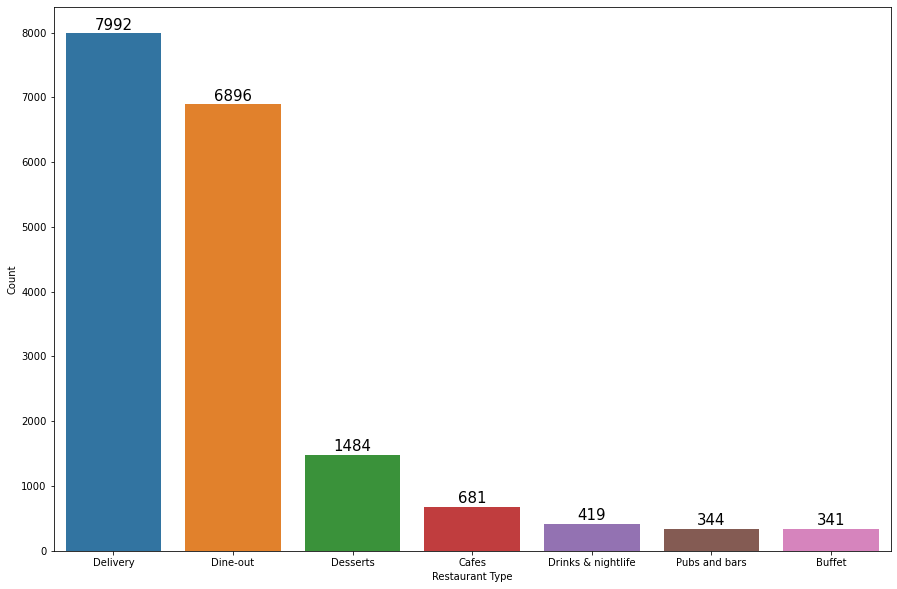

In [120]:
plt.figure(figsize=(15,10))
plots=sns.barplot(x=listed_in['index'],y=listed_in['listed_in(type)'])
for bar in plots.patches:

    plots.annotate(format(bar.get_height(), '.0f'),
                   (bar.get_x() + bar.get_width() / 2,
                    bar.get_height()), ha='center', va='center',
                   size=15, xytext=(0, 8),
                   textcoords='offset points')
plt.xlabel('Restaurant Type')
plt.ylabel('Count')

In [121]:
df.head()

,name,online_order,book_table,rate,votes,location,rest_type,cuisines,approx_cost(for two people),listed_in(type),cuisine_North Indian,cuisine_Mughlai,cuisine_Chinese,cuisine_Thai,cuisine_Cafe,cuisine_Mexican,cuisine_Italian,cuisine_South Indian,cuisine_Rajasthani,cuisine_Andhra,cuisine_Pizza,cuisine_Continental,cuisine_Momos,cuisine_Beverages,cuisine_Fast Food,cuisine_American,cuisine_French,cuisine_European,cuisine_Bakery,cuisine_Burger,cuisine_Desserts,cuisine_Biryani,cuisine_Street Food,cuisine_Rolls,cuisine_Ice Cream,cuisine_Healthy Food,cuisine_Salad,cuisine_Asian,cuisine_Korean,cuisine_Indonesian,cuisine_Japanese,cuisine_Goan,cuisine_Seafood,cuisine_Kebab,cuisine_Steak,cuisine_Mithai,cuisine_Iranian,cuisine_Sandwich,cuisine_Juices,cuisine_Mangalorean,cuisine_Vietnamese,cuisine_Hyderabadi,cuisine_Bengali,cuisine_Arabian,cuisine_BBQ,cuisine_Tea,cuisine_Afghani,cuisine_Lebanese,cuisine_Finger Food,cuisine_Tibetan,cuisine_Charcoal Chicken,cuisine_Middle Eastern,cuisine_Mediterranean,cuisine_Kerala,cuisine_Oriya,cuisine_Bihari,cuisine_Roast Chicken,cuisine_Maharashtrian,cuisine_Bohri,cuisine_African,cuisine_Nepalese,cuisine_Turkish,cuisine_Tamil,cuisine_Tex-Mex,cuisine_Belgian,cuisine_Gujarati,cuisine_South American,cuisine_Konkan,cuisine_Chettinad,cuisine_Wraps,cuisine_Coffee,cuisine_Indian,cuisine_Afghan,cuisine_Modern Indian,cuisine_Lucknowi,cuisine_Australian,cuisine_Kashmiri,cuisine_Spanish,cuisine_Malaysian,cuisine_Burmese,cuisine_Sushi,cuisine_Portuguese,cuisine_Parsi,cuisine_Greek,cuisine_North Eastern,cuisine_Bar Food,cuisine_Singaporean,cuisine_Awadhi,cuisine_Naga,cuisine_Cantonese,cuisine_Grill,cuisine_Bubble Tea,cuisine_Hot dogs,cuisine_Assamese,cuisine_Sri Lankan,cuisine_Mongolian,cuisine_British,cuisine_Paan,cuisine_German,cuisine_Russian,cuisine_Drinks Only,cuisine_Jewish,cuisine_Vegan,cuisine_Pan Asian,cuisine_Raw Meats,cuisine_Sindhi,rest_type_Casual Dining,rest_type_Cafe,rest_type_Quick Bites,rest_type_Delivery,rest_type_Mess,rest_type_Dessert Parlor,rest_type_Bakery,rest_type_Pub,rest_type_Takeaway,rest_type_Fine Dining,rest_type_Beverage Shop,rest_type_Sweet Shop,rest_type_Bar,rest_type_Kiosk,rest_type_Food Truck,rest_type_Microbrewery,rest_type_Lounge,rest_type_Food Court,rest_type_Dhaba,rest_type_Club,rest_type_Irani Cafee,rest_type_Confectionery,rest_type_Bhojanalya,rest_type_Pop Up,rest_type_Meat Shop
0,Jalsa,Yes,Yes,4.1,775,Banashankari,Casual Dining,"North Indian, Mughlai, Chinese",800,Buffet,Yes,Yes,Yes,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,Yes,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No
1,Spice Elephant,Yes,No,4.1,787,Banashankari,Casual Dining,"Chinese, North Indian, Thai",800,Buffet,Yes,No,Yes,Yes,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,Yes,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No
2,San Churro Cafe,Yes,No,3.8,918,Banashankari,"Cafe, Casual Dining","Cafe, Mexican, Italian",800,Buffet,No,No,No,No,Yes,Yes,Yes,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,Yes,Yes,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No
3,Addhuri Udupi Bhojana,No,No,3.7,88,Banashankari,Quick Bites,"South Indian, North Indian",300,Buffet,Yes,No,No,No,No,No,No,Yes,No,No,No,No,N

In [122]:
df['approx_cost(for two people)'].replace(',','',regex=True,inplace=True)

In [123]:
df['approx_cost(for two people)']=df['approx_cost(for two people)'].astype('int')

In [124]:
df['approx_cost(for two people)'].value_counts().sort_index(ascending=False)

6000      1
5000      1
4500      2
4100      2
4000     10
       ... 
100     278
80        4
70        1
50        1
40        4
Name: approx_cost(for two people), Length: 64, dtype: int64

In [125]:
type=df.groupby('listed_in(type)').mean()['approx_cost(for two people)'].sort_values(ascending=False)

In [126]:
df['approx_cost(for two people)'].value_counts()

400     2585
300     2254
500     1888
200     1471
600     1394
        ... 
5000       1
3700       1
50         1
130        1
3200       1
Name: approx_cost(for two people), Length: 64, dtype: int64

In [127]:
df.groupby('listed_in(type)').mean()

,rate,votes,approx_cost(for two people)
listed_in(type),,,
Buffet,3.979765,1006.478006,1281.378299
Cafes,3.816446,418.775330,621.439060
Delivery,3.607432,205.777528,476.334960
Desserts,3.727695,156.826819,388.119946
Dine-out,3.633367,294.719693,596.367459
Drinks & nightlife,3.990931,1131.482100,1463.365155
Pubs and bars,4.010465,1077.398256,1309.593023


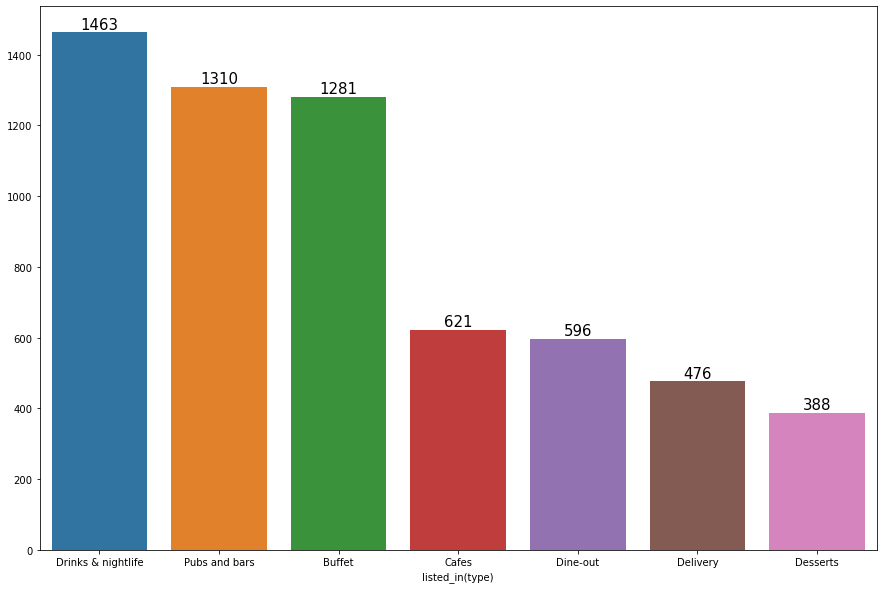

In [128]:
plt.figure(figsize=(15,10))
plots=sns.barplot(x=type.index,y=type.values)
for bar in plots.patches:

    plots.annotate(format(bar.get_height(), '.0f'),
                   (bar.get_x() + bar.get_width() / 2,
                    bar.get_height()), ha='center', va='center',
                   size=15, xytext=(0, 8),
                   textcoords='offset points')




In [129]:
# Almost 82 % of the resturants in Bangalore have a delivery option
# 70% of the restaurants have dineout

# The percentage of bars and pubs in Bangalore compared to the total number of restaurants is approx 3.4 % (344)

# Only 3.5 % of the restaurants in Bangalore have a Buffet option

# approx_cost(for two people)

# The costliest restaurant charges approx ₹ 6000 for 2 people

In [130]:
df['approx_cost(for two people)'].replace(',','',regex=True,inplace=True)

In [131]:
df['approx_cost(for two people)']=df['approx_cost(for two people)'].astype('int')

In [132]:
df['approx_cost(for two people)'].value_counts().sort_index(ascending=False)

6000      1
5000      1
4500      2
4100      2
4000     10
       ... 
100     278
80        4
70        1
50        1
40        4
Name: approx_cost(for two people), Length: 64, dtype: int64

In [133]:
df[df['approx_cost(for two people)']==df['approx_cost(for two people)'].max()]

,name,online_order,book_table,rate,votes,location,rest_type,cuisines,approx_cost(for two people),listed_in(type),cuisine_North Indian,cuisine_Mughlai,cuisine_Chinese,cuisine_Thai,cuisine_Cafe,cuisine_Mexican,cuisine_Italian,cuisine_South Indian,cuisine_Rajasthani,cuisine_Andhra,cuisine_Pizza,cuisine_Continental,cuisine_Momos,cuisine_Beverages,cuisine_Fast Food,cuisine_American,cuisine_French,cuisine_European,cuisine_Bakery,cuisine_Burger,cuisine_Desserts,cuisine_Biryani,cuisine_Street Food,cuisine_Rolls,cuisine_Ice Cream,cuisine_Healthy Food,cuisine_Salad,cuisine_Asian,cuisine_Korean,cuisine_Indonesian,cuisine_Japanese,cuisine_Goan,cuisine_Seafood,cuisine_Kebab,cuisine_Steak,cuisine_Mithai,cuisine_Iranian,cuisine_Sandwich,cuisine_Juices,cuisine_Mangalorean,cuisine_Vietnamese,cuisine_Hyderabadi,cuisine_Bengali,cuisine_Arabian,cuisine_BBQ,cuisine_Tea,cuisine_Afghani,cuisine_Lebanese,cuisine_Finger Food,cuisine_Tibetan,cuisine_Charcoal Chicken,cuisine_Middle Eastern,cuisine_Mediterranean,cuisine_Kerala,cuisine_Oriya,cuisine_Bihari,cuisine_Roast Chicken,cuisine_Maharashtrian,cuisine_Bohri,cuisine_African,cuisine_Nepalese,cuisine_Turkish,cuisine_Tamil,cuisine_Tex-Mex,cuisine_Belgian,cuisine_Gujarati,cuisine_South American,cuisine_Konkan,cuisine_Chettinad,cuisine_Wraps,cuisine_Coffee,cuisine_Indian,cuisine_Afghan,cuisine_Modern Indian,cuisine_Lucknowi,cuisine_Australian,cuisine_Kashmiri,cuisine_Spanish,cuisine_Malaysian,cuisine_Burmese,cuisine_Sushi,cuisine_Portuguese,cuisine_Parsi,cuisine_Greek,cuisine_North Eastern,cuisine_Bar Food,cuisine_Singaporean,cuisine_Awadhi,cuisine_Naga,cuisine_Cantonese,cuisine_Grill,cuisine_Bubble Tea,cuisine_Hot dogs,cuisine_Assamese,cuisine_Sri Lankan,cuisine_Mongolian,cuisine_British,cuisine_Paan,cuisine_German,cuisine_Russian,cuisine_Drinks Only,cuisine_Jewish,cuisine_Vegan,cuisine_Pan Asian,cuisine_Raw Meats,cuisine_Sindhi,rest_type_Casual Dining,rest_type_Cafe,rest_type_Quick Bites,rest_type_Delivery,rest_type_Mess,rest_type_Dessert Parlor,rest_type_Bakery,rest_type_Pub,rest_type_Takeaway,rest_type_Fine Dining,rest_type_Beverage Shop,rest_type_Sweet Shop,rest_type_Bar,rest_type_Kiosk,rest_type_Food Truck,rest_type_Microbrewery,rest_type_Lounge,rest_type_Food Court,rest_type_Dhaba,rest_type_Club,rest_type_Irani Cafee,rest_type_Confectionery,rest_type_Bhojanalya,rest_type_Pop Up,rest_type_Meat Shop
16282,Le Cirque Signature - The Leela Palace,No,Yes,4.3,126,Old Airport Road,Fine Dining,"French, Italian",6000,Dine-out,No,No,No,No,No,No,Yes,No,No,No,No,No,No,No,No,No,Yes,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,Yes,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No


In [134]:
# Le Cirque Signature - The Leela Palace is the costliest restaurant to eat in Bangalore 
# They have a pretty good rating of 4.3 and do not have an online order option

In [135]:
df.groupby('name').count()['online_order'].sort_values(ascending=False).head(7)

name
Cafe Coffee Day      76
Just Bake            56
Five Star Chicken    49
Pizza Hut            47
Onesta               47
Domino's Pizza       45
Subway               45
Name: online_order, dtype: int64

In [136]:
chains=pd.DataFrame(df.groupby('name').count()['online_order'].sort_values(ascending=False).head(7))

Text(0, 0.5, 'Count')

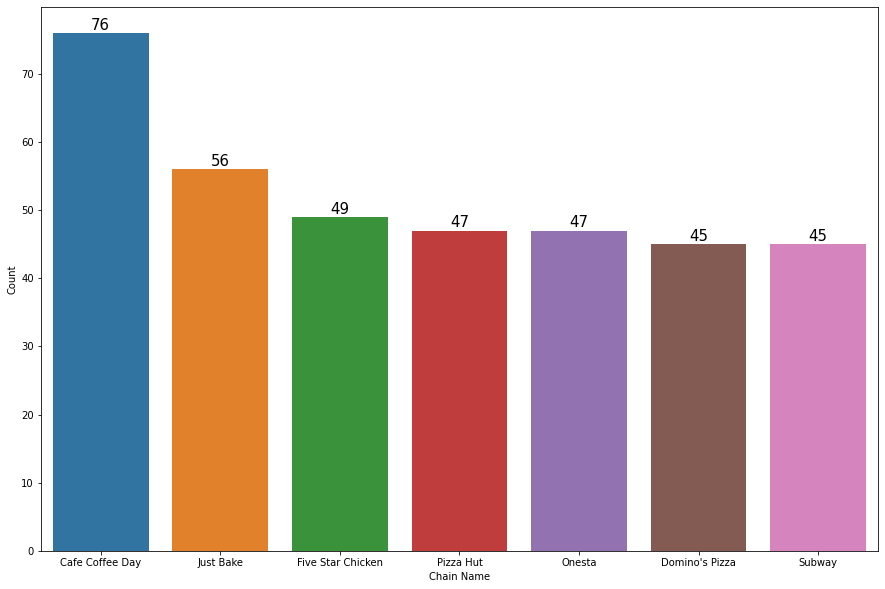

In [137]:
plt.figure(figsize=(15,10))
plots=sns.barplot(x=chains.index,y=chains['online_order'])
for bar in plots.patches:

    plots.annotate(format(bar.get_height(), '.0f'),
                   (bar.get_x() + bar.get_width() / 2,
                    bar.get_height()), ha='center', va='center',
                   size=15, xytext=(0, 8),
                   textcoords='offset points')
plt.xlabel('Chain Name')
plt.ylabel('Count')

# Location

In [138]:
df['location'].value_counts().head(7)

Whitefield         1173
Indiranagar        1020
BTM                1004
HSR                 987
Marathahalli        980
Electronic City     912
JP Nagar            735
Name: location, dtype: int64

In [139]:
loc=pd.DataFrame(df['location'].value_counts().head(7))
loc

,location
Whitefield,1173
Indiranagar,1020
BTM,1004
HSR,987
Marathahalli,980
Electronic City,912
JP Nagar,735


Text(0, 0.5, 'Count')

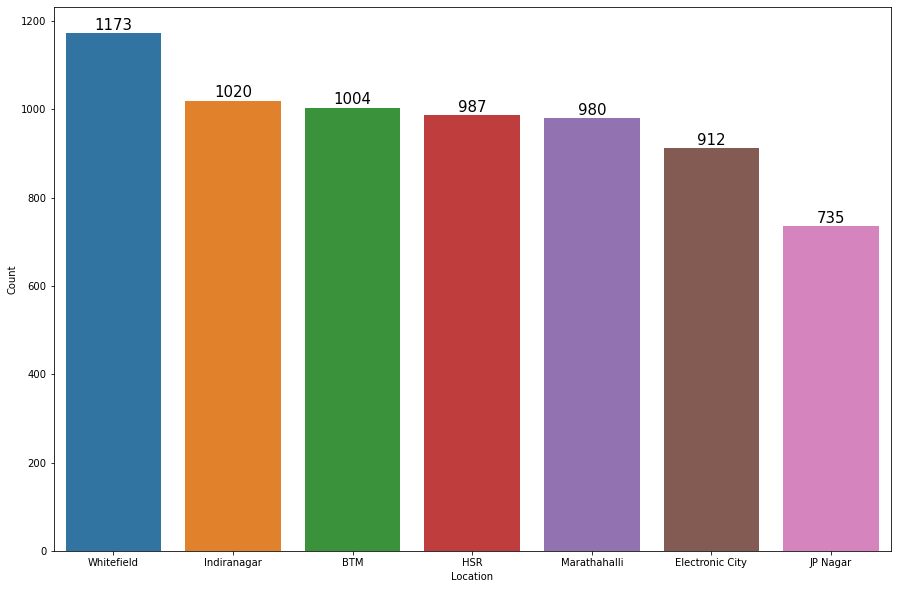

In [140]:
plt.figure(figsize=(15,10))
plots=sns.barplot(x=loc.index,y=loc['location'])
for bar in plots.patches:

    plots.annotate(format(bar.get_height(), '.0f'),
                   (bar.get_x() + bar.get_width() / 2,
                    bar.get_height()), ha='center', va='center',
                   size=15, xytext=(0, 8),
                   textcoords='offset points')
plt.xlabel('Location')
plt.ylabel('Count')

In [141]:
# Whitefield has the most number of restaurants.
# Indiranagar, btm, HSR and MArathahalli have almost the same number of restaurants

In [142]:
df.groupby('location')['rate'].mean().sort_values(ascending=False)

location
Lavelle Road             4.111864
Sankey Road              4.010526
Church Street            3.998413
St. Marks Road           3.996250
Koramangala 5th Block    3.989921
                           ...   
North Bangalore          3.366667
West Bangalore           3.366667
Bommanahalli             3.296939
Peenya                   3.200000
Old Madras Road          3.200000
Name: rate, Length: 93, dtype: float64

In [143]:
avg_rate=pd.DataFrame(df.groupby('location')['rate'].mean().sort_values(ascending=False).head(7))
avg_rate

,rate
location,
Lavelle Road,4.111864
Sankey Road,4.010526
Church Street,3.998413
St. Marks Road,3.996250
Koramangala 5th Block,3.989921
Koramangala 3rd Block,3.946512
Koramangala 4th Block,3.904566


In [144]:
a_r1=round(avg_rate,2)
a_r1

,rate
location,
Lavelle Road,4.11
Sankey Road,4.01
Church Street,4.00
St. Marks Road,4.00
Koramangala 5th Block,3.99
Koramangala 3rd Block,3.95
Koramangala 4th Block,3.90


''

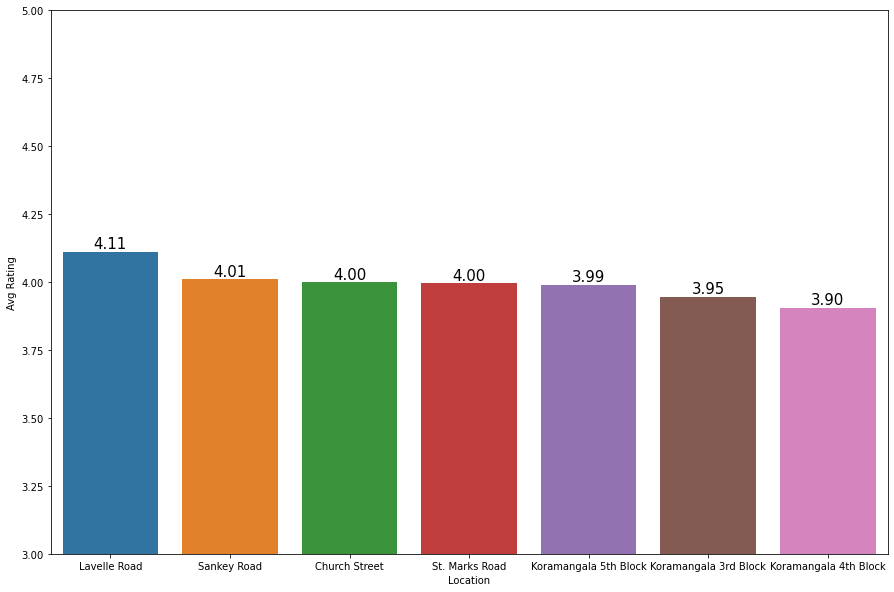

In [145]:
plt.figure(figsize=(15,10))
plots=sns.barplot(x=avg_rate.index,y=avg_rate['rate'])
plt.ylim(3,5)
for bar in plots.patches:

    plots.annotate(format(bar.get_height(), '.2f'),
                   (bar.get_x() + bar.get_width() / 2,
                    bar.get_height()), ha='center', va='center',
                   size=15, xytext=(0, 8),
                   textcoords='offset points')
plt.xlabel('Location')
plt.ylabel('Avg Rating')
,

# Restaurant Type

In [146]:
df['rest_type'].value_counts().head(5)

Quick Bites       6341
Casual Dining     4065
Cafe              1336
Dessert Parlor     893
Delivery           719
Name: rest_type, dtype: int64

In [147]:
rest_type=pd.DataFrame(df['rest_type'].value_counts().head(7))
rest_type


,rest_type
Quick Bites,6341
Casual Dining,4065
Cafe,1336
Dessert Parlor,893
Delivery,719
"Takeaway, Delivery",588
"Casual Dining, Bar",444


Text(0, 0.5, 'Count')

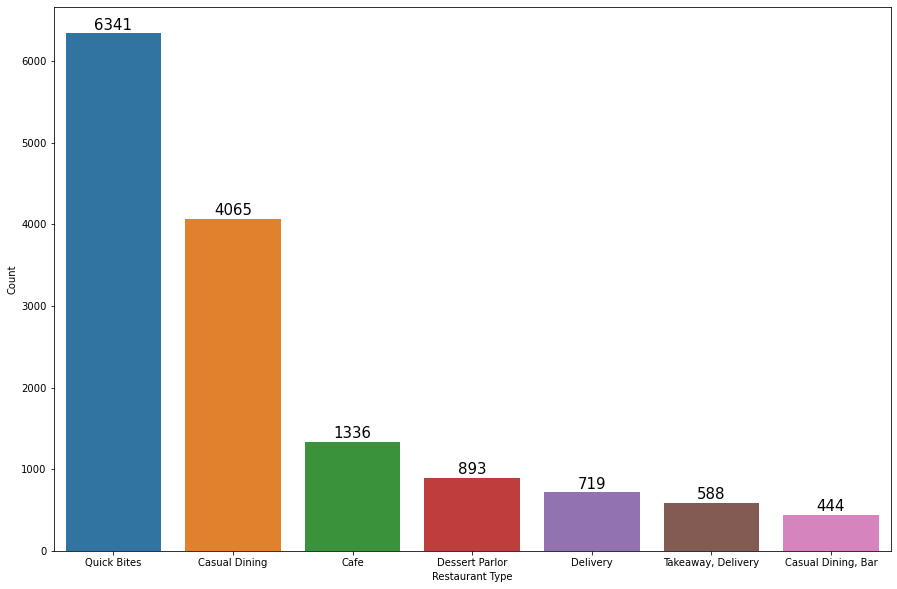

In [148]:
plt.figure(figsize=(15,10))
plots=sns.barplot(x=rest_type.index,y=rest_type['rest_type'])
for bar in plots.patches:

    plots.annotate(format(bar.get_height(), '.0f'),
                   (bar.get_x() + bar.get_width() / 2,
                    bar.get_height()), ha='center', va='center',
                   size=15, xytext=(0, 8),
                   textcoords='offset points')
plt.xlabel('Restaurant Type')
plt.ylabel('Count')

In [149]:
# The most common restaurant type is quick bites followed by casual dining and cafe

In [150]:
df.head()

,name,online_order,book_table,rate,votes,location,rest_type,cuisines,approx_cost(for two people),listed_in(type),cuisine_North Indian,cuisine_Mughlai,cuisine_Chinese,cuisine_Thai,cuisine_Cafe,cuisine_Mexican,cuisine_Italian,cuisine_South Indian,cuisine_Rajasthani,cuisine_Andhra,cuisine_Pizza,cuisine_Continental,cuisine_Momos,cuisine_Beverages,cuisine_Fast Food,cuisine_American,cuisine_French,cuisine_European,cuisine_Bakery,cuisine_Burger,cuisine_Desserts,cuisine_Biryani,cuisine_Street Food,cuisine_Rolls,cuisine_Ice Cream,cuisine_Healthy Food,cuisine_Salad,cuisine_Asian,cuisine_Korean,cuisine_Indonesian,cuisine_Japanese,cuisine_Goan,cuisine_Seafood,cuisine_Kebab,cuisine_Steak,cuisine_Mithai,cuisine_Iranian,cuisine_Sandwich,cuisine_Juices,cuisine_Mangalorean,cuisine_Vietnamese,cuisine_Hyderabadi,cuisine_Bengali,cuisine_Arabian,cuisine_BBQ,cuisine_Tea,cuisine_Afghani,cuisine_Lebanese,cuisine_Finger Food,cuisine_Tibetan,cuisine_Charcoal Chicken,cuisine_Middle Eastern,cuisine_Mediterranean,cuisine_Kerala,cuisine_Oriya,cuisine_Bihari,cuisine_Roast Chicken,cuisine_Maharashtrian,cuisine_Bohri,cuisine_African,cuisine_Nepalese,cuisine_Turkish,cuisine_Tamil,cuisine_Tex-Mex,cuisine_Belgian,cuisine_Gujarati,cuisine_South American,cuisine_Konkan,cuisine_Chettinad,cuisine_Wraps,cuisine_Coffee,cuisine_Indian,cuisine_Afghan,cuisine_Modern Indian,cuisine_Lucknowi,cuisine_Australian,cuisine_Kashmiri,cuisine_Spanish,cuisine_Malaysian,cuisine_Burmese,cuisine_Sushi,cuisine_Portuguese,cuisine_Parsi,cuisine_Greek,cuisine_North Eastern,cuisine_Bar Food,cuisine_Singaporean,cuisine_Awadhi,cuisine_Naga,cuisine_Cantonese,cuisine_Grill,cuisine_Bubble Tea,cuisine_Hot dogs,cuisine_Assamese,cuisine_Sri Lankan,cuisine_Mongolian,cuisine_British,cuisine_Paan,cuisine_German,cuisine_Russian,cuisine_Drinks Only,cuisine_Jewish,cuisine_Vegan,cuisine_Pan Asian,cuisine_Raw Meats,cuisine_Sindhi,rest_type_Casual Dining,rest_type_Cafe,rest_type_Quick Bites,rest_type_Delivery,rest_type_Mess,rest_type_Dessert Parlor,rest_type_Bakery,rest_type_Pub,rest_type_Takeaway,rest_type_Fine Dining,rest_type_Beverage Shop,rest_type_Sweet Shop,rest_type_Bar,rest_type_Kiosk,rest_type_Food Truck,rest_type_Microbrewery,rest_type_Lounge,rest_type_Food Court,rest_type_Dhaba,rest_type_Club,rest_type_Irani Cafee,rest_type_Confectionery,rest_type_Bhojanalya,rest_type_Pop Up,rest_type_Meat Shop
0,Jalsa,Yes,Yes,4.1,775,Banashankari,Casual Dining,"North Indian, Mughlai, Chinese",800,Buffet,Yes,Yes,Yes,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,Yes,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No
1,Spice Elephant,Yes,No,4.1,787,Banashankari,Casual Dining,"Chinese, North Indian, Thai",800,Buffet,Yes,No,Yes,Yes,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,Yes,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No
2,San Churro Cafe,Yes,No,3.8,918,Banashankari,"Cafe, Casual Dining","Cafe, Mexican, Italian",800,Buffet,No,No,No,No,Yes,Yes,Yes,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,Yes,Yes,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No
3,Addhuri Udupi Bhojana,No,No,3.7,88,Banashankari,Quick Bites,"South Indian, North Indian",300,Buffet,Yes,No,No,No,No,No,No,Yes,No,No,No,No,N

In [151]:
pd.set_option('display.max_columns',None)

In [152]:
a=[]
b=[]
d=dict({})
for i in df.columns[-25:]:
    a.append(i)
    b.append(df.loc[:,i].value_counts()['Yes'])
    
d.update(zip(b,a))
    
    
    

In [153]:
d

{5128: 'rest_type_Casual Dining',
 1852: 'rest_type_Cafe',
 6952: 'rest_type_Quick Bites',
 1307: 'rest_type_Delivery',
 89: 'rest_type_Mess',
 1289: 'rest_type_Dessert Parlor',
 748: 'rest_type_Bakery',
 375: 'rest_type_Pub',
 619: 'rest_type_Takeaway',
 140: 'rest_type_Fine Dining',
 476: 'rest_type_Beverage Shop',
 283: 'rest_type_Sweet Shop',
 931: 'rest_type_Bar',
 80: 'rest_type_Kiosk',
 30: 'rest_type_Food Truck',
 135: 'rest_type_Microbrewery',
 201: 'rest_type_Lounge',
 315: 'rest_type_Food Court',
 6: 'rest_type_Dhaba',
 16: 'rest_type_Club',
 3: 'rest_type_Irani Cafee',
 4: 'rest_type_Confectionery',
 2: 'rest_type_Meat Shop',
 1: 'rest_type_Pop Up'}

In [154]:
a1=[]
b1=[]
d1=dict({})
for i in sorted(d,reverse=True)[:5]:
    a1.append(i)
    b1.append(d[i])

d1.update(zip(b1,a1))


In [155]:
d1

{'rest_type_Quick Bites': 6952,
 'rest_type_Casual Dining': 5128,
 'rest_type_Cafe': 1852,
 'rest_type_Delivery': 1307,
 'rest_type_Dessert Parlor': 1289}

In [156]:
d1.keys

<function dict.keys>

In [157]:
cuisines=pd.DataFrame({'Rest_Type':d1.keys(),'Count':d1.values()})

Text(0, 0.5, 'Count')

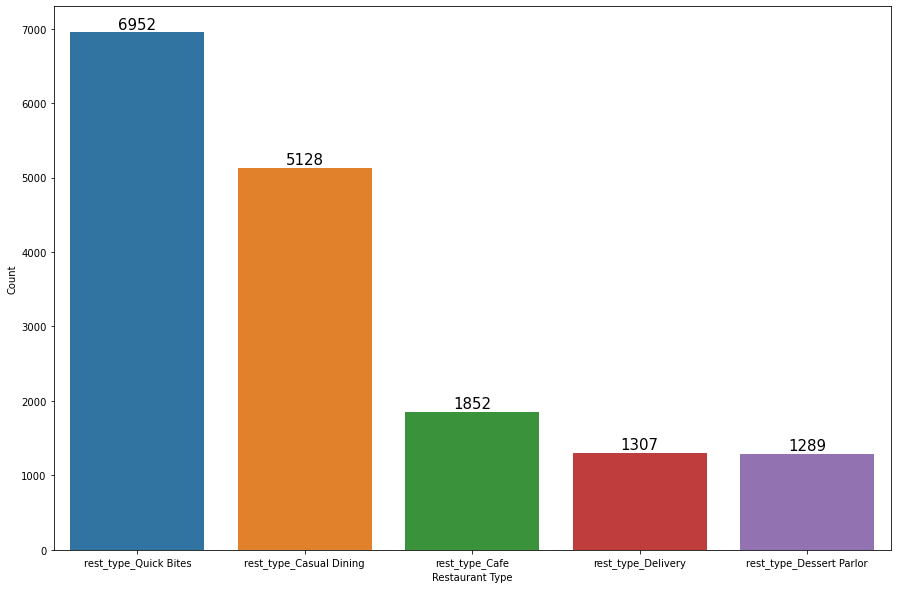

In [158]:
plt.figure(figsize=(15,10))
plots=sns.barplot(x=cuisines['Rest_Type'],y=cuisines['Count'])
for bar in plots.patches:

    plots.annotate(format(bar.get_height(), '.0f'),
                   (bar.get_x() + bar.get_width() / 2,
                    bar.get_height()), ha='center', va='center',
                   size=15, xytext=(0, 8),
                   textcoords='offset points')
plt.xlabel('Restaurant Type')
plt.ylabel('Count')


In [159]:
df.loc[:,'cuisine_Mughlai']

0        Yes
1         No
2         No
3         No
4         No
        ... 
44017     No
44018     No
44019     No
44020     No
44021     No
Name: cuisine_Mughlai, Length: 18157, dtype: object

In [160]:
d=dict({})

In [161]:
for i in df.columns[-25:]:
    print(i)

rest_type_Casual Dining
rest_type_Cafe
rest_type_Quick Bites
rest_type_Delivery
rest_type_Mess
rest_type_Dessert Parlor
rest_type_Bakery
rest_type_Pub
rest_type_Takeaway
rest_type_Fine Dining
rest_type_Beverage Shop
rest_type_Sweet Shop
rest_type_Bar
rest_type_Kiosk
rest_type_Food Truck
rest_type_Microbrewery
rest_type_Lounge
rest_type_Food Court
rest_type_Dhaba
rest_type_Club
rest_type_Irani Cafee
rest_type_Confectionery
rest_type_Bhojanalya
rest_type_Pop Up
rest_type_Meat Shop


# Online Order

D:\Ananconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='online_order', ylabel='count'>

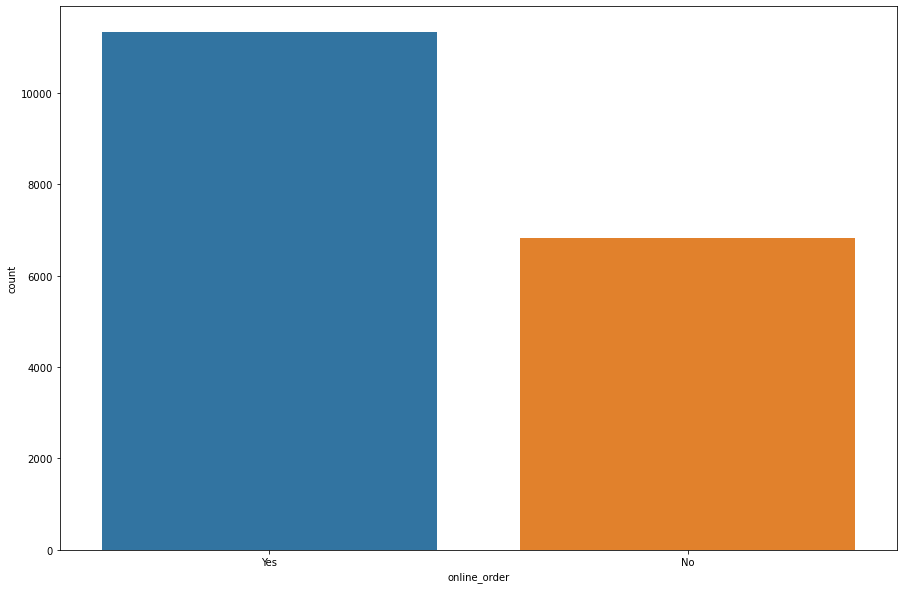

In [162]:
plt.figure(figsize=(15,10))
sns.countplot(df['online_order'])


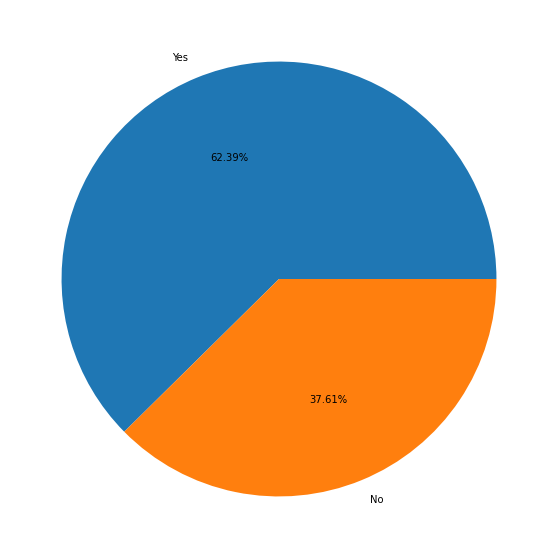

In [163]:
plt.figure(figsize=(15,10))
plt.pie(df['online_order'].value_counts(),labels=['Yes','No'],autopct='%.2f%%')
plt.show()

# Book Table

D:\Ananconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='book_table', ylabel='count'>

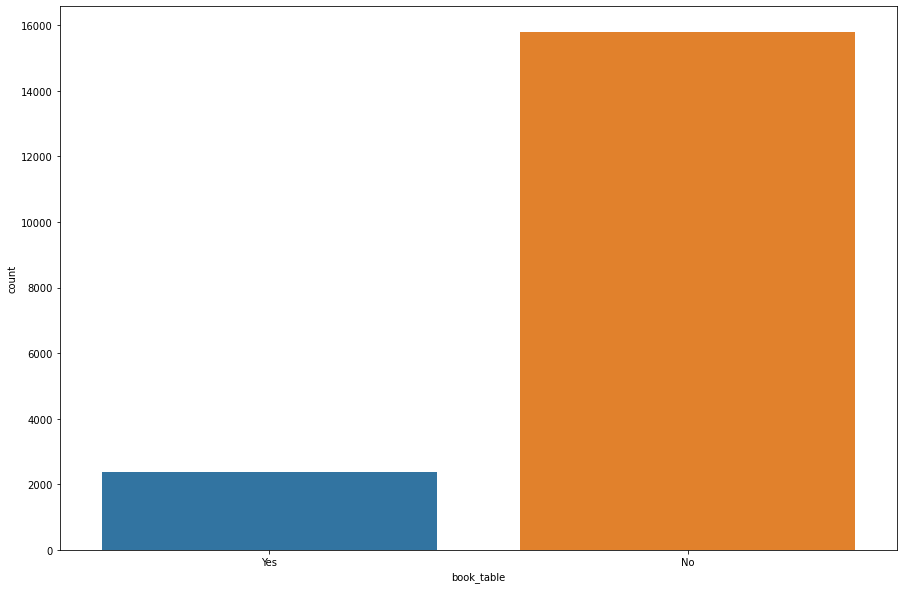

In [164]:
plt.figure(figsize=(15,10))
sns.countplot(df['book_table'])

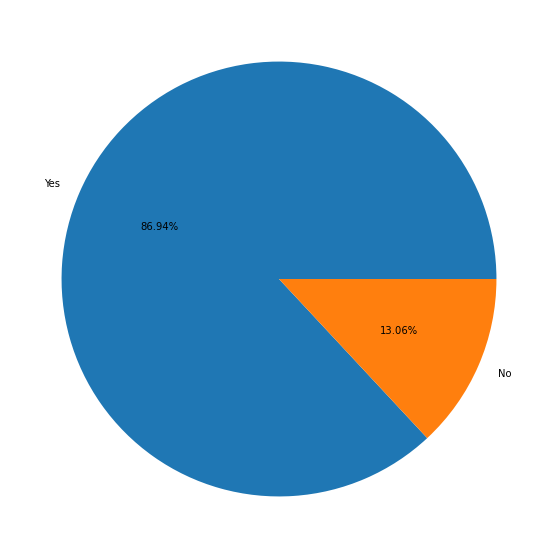

In [165]:
plt.figure(figsize=(15,10))
plt.pie(df['book_table'].value_counts(),labels=['Yes','No'],autopct='%.2f%%')
plt.show()

Text(0, 0.5, 'Cost for 2')

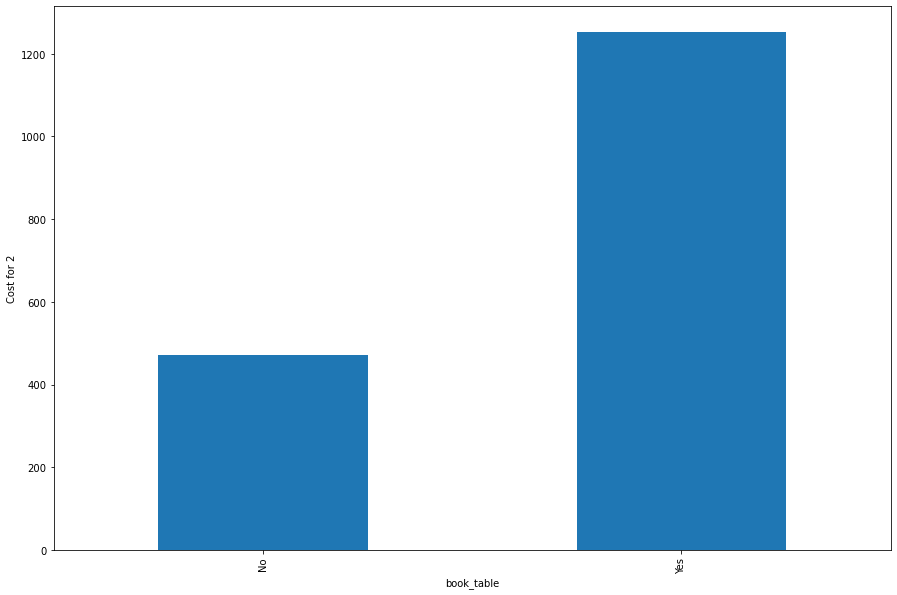

In [166]:
plt.figure(figsize=(15,10))
df.groupby('book_table')['approx_cost(for two people)'].mean().plot(kind='bar')
plt.ylabel('Cost for 2')

# Cuisines

In [167]:
df['cuisines'].value_counts().head(5)

North Indian             909
North Indian, Chinese    855
South Indian             592
Bakery, Desserts         356
Biryani                  291
Name: cuisines, dtype: int64

# Correlation

In [168]:
df.corr()

,rate,votes,approx_cost(for two people)
rate,1.000000,0.420907,0.370686
votes,0.420907,1.000000,0.372686
approx_cost(for two people),0.370686,0.372686,1.000000


In [169]:
# We can say that there is a very slight correlation between votes and the rating of the restaurants.
# There is almost no relationship between how pricey the restaurant is and its rating

In [170]:
df1=df.replace({'Yes':1,'No':0})

In [171]:
df1.head()

,name,online_order,book_table,rate,votes,location,rest_type,cuisines,approx_cost(for two people),listed_in(type),cuisine_North Indian,cuisine_Mughlai,cuisine_Chinese,cuisine_Thai,cuisine_Cafe,cuisine_Mexican,cuisine_Italian,cuisine_South Indian,cuisine_Rajasthani,cuisine_Andhra,cuisine_Pizza,cuisine_Continental,cuisine_Momos,cuisine_Beverages,cuisine_Fast Food,cuisine_American,cuisine_French,cuisine_European,cuisine_Bakery,cuisine_Burger,cuisine_Desserts,cuisine_Biryani,cuisine_Street Food,cuisine_Rolls,cuisine_Ice Cream,cuisine_Healthy Food,cuisine_Salad,cuisine_Asian,cuisine_Korean,cuisine_Indonesian,cuisine_Japanese,cuisine_Goan,cuisine_Seafood,cuisine_Kebab,cuisine_Steak,cuisine_Mithai,cuisine_Iranian,cuisine_Sandwich,cuisine_Juices,cuisine_Mangalorean,cuisine_Vietnamese,cuisine_Hyderabadi,cuisine_Bengali,cuisine_Arabian,cuisine_BBQ,cuisine_Tea,cuisine_Afghani,cuisine_Lebanese,cuisine_Finger Food,cuisine_Tibetan,cuisine_Charcoal Chicken,cuisine_Middle Eastern,cuisine_Mediterranean,cuisine_Kerala,cuisine_Oriya,cuisine_Bihari,cuisine_Roast Chicken,cuisine_Maharashtrian,cuisine_Bohri,cuisine_African,cuisine_Nepalese,cuisine_Turkish,cuisine_Tamil,cuisine_Tex-Mex,cuisine_Belgian,cuisine_Gujarati,cuisine_South American,cuisine_Konkan,cuisine_Chettinad,cuisine_Wraps,cuisine_Coffee,cuisine_Indian,cuisine_Afghan,cuisine_Modern Indian,cuisine_Lucknowi,cuisine_Australian,cuisine_Kashmiri,cuisine_Spanish,cuisine_Malaysian,cuisine_Burmese,cuisine_Sushi,cuisine_Portuguese,cuisine_Parsi,cuisine_Greek,cuisine_North Eastern,cuisine_Bar Food,cuisine_Singaporean,cuisine_Awadhi,cuisine_Naga,cuisine_Cantonese,cuisine_Grill,cuisine_Bubble Tea,cuisine_Hot dogs,cuisine_Assamese,cuisine_Sri Lankan,cuisine_Mongolian,cuisine_British,cuisine_Paan,cuisine_German,cuisine_Russian,cuisine_Drinks Only,cuisine_Jewish,cuisine_Vegan,cuisine_Pan Asian,cuisine_Raw Meats,cuisine_Sindhi,rest_type_Casual Dining,rest_type_Cafe,rest_type_Quick Bites,rest_type_Delivery,rest_type_Mess,rest_type_Dessert Parlor,rest_type_Bakery,rest_type_Pub,rest_type_Takeaway,rest_type_Fine Dining,rest_type_Beverage Shop,rest_type_Sweet Shop,rest_type_Bar,rest_type_Kiosk,rest_type_Food Truck,rest_type_Microbrewery,rest_type_Lounge,rest_type_Food Court,rest_type_Dhaba,rest_type_Club,rest_type_Irani Cafee,rest_type_Confectionery,rest_type_Bhojanalya,rest_type_Pop Up,rest_type_Meat Shop
0,Jalsa,1,1,4.1,775,Banashankari,Casual Dining,"North Indian, Mughlai, Chinese",800,Buffet,1,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,Spice Elephant,1,0,4.1,787,Banashankari,Casual Dining,"Chinese, North Indian, Thai",800,Buffet,1,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,San Churro Cafe,1,0,3.8,918,Banashankari,"Cafe, Casual Dining","Cafe, Mexican, Italian",800,Buffet,0,0,0,0,1,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,Addhuri Udupi Bhojana,0,0,3.7,88,Banashankari,Quick Bites,"South Indian, North Indian",300,Buffet,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4,Grand Village,0,0,3.8,166,Basavanagudi,Casual Dining,"North Indian, Rajasthani",600,Buffet,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,

In [172]:
a=[]
b=[]
d=dict({})
for i in df.columns[11:-25]:
    a.append(i)
    b.append(df.loc[:,i].value_counts()['Yes'])
    
d.update(zip(b,a))
    
    
    

In [173]:
a1=[]
b1=[]
d1=dict({})
for i in sorted(d,reverse=True)[:5]:
    a1.append(i)
    b1.append(d[i])

d1.update(zip(b1,a1))


In [174]:
d1

{'cuisine_Chinese': 5579,
 'cuisine_Fast Food': 2954,
 'cuisine_South Indian': 2889,
 'cuisine_Biryani': 2357,
 'cuisine_Desserts': 2103}

In [175]:
d1.keys

<function dict.keys>

In [176]:
cuisines=pd.DataFrame({'Cuisine':d1.keys(),'Count':d1.values()})

Text(0, 0.5, 'Count')

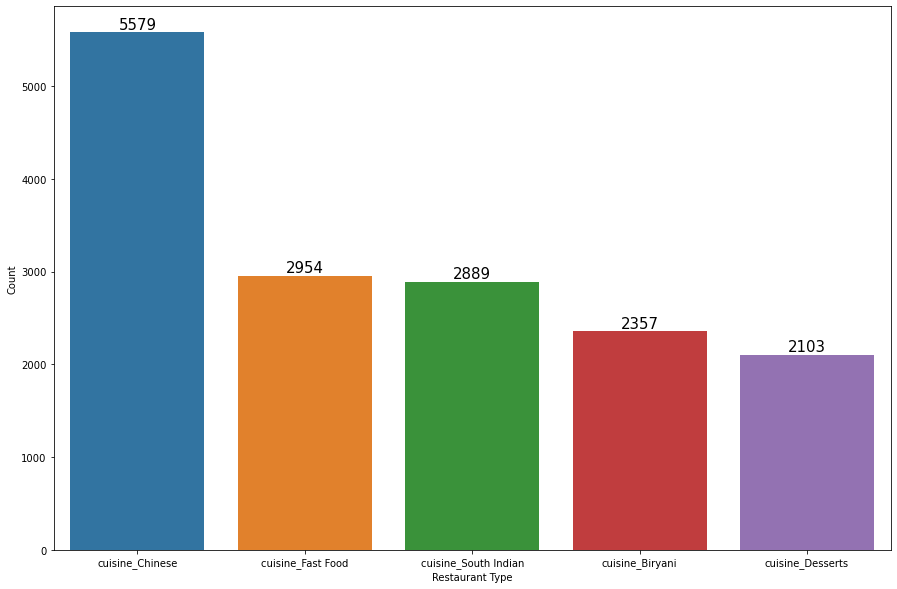

In [177]:
plt.figure(figsize=(15,10))
plots=sns.barplot(x=cuisines['Cuisine'],y=cuisines['Count'])
for bar in plots.patches:

    plots.annotate(format(bar.get_height(), '.0f'),
                   (bar.get_x() + bar.get_width() / 2,
                    bar.get_height()), ha='center', va='center',
                   size=15, xytext=(0, 8),
                   textcoords='offset points')
plt.xlabel('Restaurant Type')
plt.ylabel('Count')


In [178]:
x=df1.drop(columns=['name','rate','cuisines'])

In [179]:
x.head()

,online_order,book_table,votes,location,rest_type,approx_cost(for two people),listed_in(type),cuisine_North Indian,cuisine_Mughlai,cuisine_Chinese,cuisine_Thai,cuisine_Cafe,cuisine_Mexican,cuisine_Italian,cuisine_South Indian,cuisine_Rajasthani,cuisine_Andhra,cuisine_Pizza,cuisine_Continental,cuisine_Momos,cuisine_Beverages,cuisine_Fast Food,cuisine_American,cuisine_French,cuisine_European,cuisine_Bakery,cuisine_Burger,cuisine_Desserts,cuisine_Biryani,cuisine_Street Food,cuisine_Rolls,cuisine_Ice Cream,cuisine_Healthy Food,cuisine_Salad,cuisine_Asian,cuisine_Korean,cuisine_Indonesian,cuisine_Japanese,cuisine_Goan,cuisine_Seafood,cuisine_Kebab,cuisine_Steak,cuisine_Mithai,cuisine_Iranian,cuisine_Sandwich,cuisine_Juices,cuisine_Mangalorean,cuisine_Vietnamese,cuisine_Hyderabadi,cuisine_Bengali,cuisine_Arabian,cuisine_BBQ,cuisine_Tea,cuisine_Afghani,cuisine_Lebanese,cuisine_Finger Food,cuisine_Tibetan,cuisine_Charcoal Chicken,cuisine_Middle Eastern,cuisine_Mediterranean,cuisine_Kerala,cuisine_Oriya,cuisine_Bihari,cuisine_Roast Chicken,cuisine_Maharashtrian,cuisine_Bohri,cuisine_African,cuisine_Nepalese,cuisine_Turkish,cuisine_Tamil,cuisine_Tex-Mex,cuisine_Belgian,cuisine_Gujarati,cuisine_South American,cuisine_Konkan,cuisine_Chettinad,cuisine_Wraps,cuisine_Coffee,cuisine_Indian,cuisine_Afghan,cuisine_Modern Indian,cuisine_Lucknowi,cuisine_Australian,cuisine_Kashmiri,cuisine_Spanish,cuisine_Malaysian,cuisine_Burmese,cuisine_Sushi,cuisine_Portuguese,cuisine_Parsi,cuisine_Greek,cuisine_North Eastern,cuisine_Bar Food,cuisine_Singaporean,cuisine_Awadhi,cuisine_Naga,cuisine_Cantonese,cuisine_Grill,cuisine_Bubble Tea,cuisine_Hot dogs,cuisine_Assamese,cuisine_Sri Lankan,cuisine_Mongolian,cuisine_British,cuisine_Paan,cuisine_German,cuisine_Russian,cuisine_Drinks Only,cuisine_Jewish,cuisine_Vegan,cuisine_Pan Asian,cuisine_Raw Meats,cuisine_Sindhi,rest_type_Casual Dining,rest_type_Cafe,rest_type_Quick Bites,rest_type_Delivery,rest_type_Mess,rest_type_Dessert Parlor,rest_type_Bakery,rest_type_Pub,rest_type_Takeaway,rest_type_Fine Dining,rest_type_Beverage Shop,rest_type_Sweet Shop,rest_type_Bar,rest_type_Kiosk,rest_type_Food Truck,rest_type_Microbrewery,rest_type_Lounge,rest_type_Food Court,rest_type_Dhaba,rest_type_Club,rest_type_Irani Cafee,rest_type_Confectionery,rest_type_Bhojanalya,rest_type_Pop Up,rest_type_Meat Shop
0,1,1,775,Banashankari,Casual Dining,800,Buffet,1,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,1,0,787,Banashankari,Casual Dining,800,Buffet,1,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,1,0,918,Banashankari,"Cafe, Casual Dining",800,Buffet,0,0,0,0,1,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,0,0,88,Banashankari,Quick Bites,300,Buffet,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4,0,0,166,Basavanagudi,Casual Dining,600,Buffet,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


In [180]:
x=pd.get_dummies(x,drop_first=True)

In [181]:
y=df1['rate']

In [182]:
import statsmodels.api as sm

In [183]:
x=sm.add_constant(x)

D:\Ananconda3\lib\site-packages\statsmodels\tsa\tsatools.py:142: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)


In [184]:
from sklearn.model_selection import train_test_split

In [185]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.3,random_state=10)

In [186]:
model=sm.OLS(y_train,x_train).fit()

In [187]:
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                   rate   R-squared:                       0.391
Model:                            OLS   Adj. R-squared:                  0.377
Method:                 Least Squares   F-statistic:                     27.56
Date:                Mon, 02 May 2022   Prob (F-statistic):               0.00
Time:                        18:58:10   Log-Likelihood:                -4275.0
No. Observations:               12709   AIC:                             9130.
Df Residuals:                   12419   BIC:                         1.129e+04
Df Model:                         289                                         
Covariance Type:            nonrobust                                         
===========================================================================================================
                                              coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------------------------
const                                       3.5633      0.189     18.860      0.000       3.193       3.934
online_order                                0.0861      0.007     12.465      0.000       0.073       0.100
book_table                                  0.2176      0.013     16.732      0.000       0.192       0.243
votes                                       0.0001   5.03e-06     28.884      0.000       0.000       0.000
approx_cost(for two people)                 0.0002   1.55e-05     10.944      0.000       0.000       0.000
cuisine_North Indian                       -0.0329      0.008     -3.960      0.000      -0.049      -0.017
cuisine_Mughlai                             0.0438      0.018      2.446      0.014       0.009       0.079
cuisine_Chinese                            -0.0683      0.008     -8.280      0.000      -0.084      -0.052
cuisine_Thai                                0.0388      0.026      1.503      0.133      -0.012       0.089
cuisine_Cafe                                0.0711      0.041      1.730      0.084      -0.009       0.152
cuisine_Mexican                             0.2118      0.031      6.940      0.000       0.152       0.272
cuisine_Italian                            -0.0003      0.014     -0.022      0.982      -0.028       0.028
cuisine_South Indian                        0.0397      0.009      4.243      0.000       0.021       0.058
cuisine_Rajasthani                          0.1539      0.058      2.648      0.008       0.040       0.268
cuisine_Andhra                              0.0111      0.017      0.663      0.507      -0.022       0.044
cuisine_Pizza                              -0.0314      0.017     -1.901      0.057      -0.064       0.001
cuisine_Continental                         0.0652      0.012      5.463      0.000       0.042       0.089
cuisine_Momos                               0.1166      0.022      5.361      0.000       0.074       0.159
cuisine_Beverages                           0.0726      0.013      5.776      0.000       0.048       0.097
cuisine_Fast Food                          -0.0182      0.009     -1.936      0.053      -0.037       0.000
cuisine_American                           -0.0298      0.021     -1.398      0.162      -0.072       0.012
cuisine_French                              0.0013      0.076      0.017      0.986      -0.147       0.150
cuisine_European                            0.0096      0.030      0.325      0.745      -0.048       0.068
cuisine_Bakery                             -0.0145      0.024     -0.595      0.552      -0.062       0.033
cuisine_Burger                              0.0591      0.017      3.433      0.001       0.025       0.093
cuisine_Desserts                            0.1144      0.0

In [188]:
coef=pd.DataFrame(model.params)

In [189]:
coef.columns=['Coefficients']

In [190]:
coef.sort_values(by='Coefficients',ascending=False).head(6)

,Coefficients
const,3.563264
cuisine_African,0.669623
cuisine_German,0.603941
"rest_type_Cafe, Lounge",0.550010
rest_type_Pop Up,0.536519
rest_type_Pop Up,0.536519


In [191]:
from sklearn import metrics

In [192]:
metrics.mean_squared_error(y_test,model.predict(x_test))

0.12489689819181797

# RMSE

In [193]:
np.sqrt(metrics.mean_squared_error(y_test,model.predict(x_test)))

0.35340755253929984

In [194]:
from sklearn.linear_model import LinearRegression

In [195]:
lr=LinearRegression()

In [196]:
from mlxtend.feature_selection import SequentialFeatureSelector as sfs

In [197]:
sfs1=sfs(lr,k_features='best',scoring='neg_root_mean_squared_error')

In [198]:
model.pvalues[model.pvalues<0.05]

const                                 2.998755e-78
online_order                          1.888088e-35
book_table                            3.643423e-62
votes                                1.324604e-177
approx_cost(for two people)           9.468368e-28
                                         ...      
rest_type_Quick Bites                 1.401033e-06
rest_type_Quick Bites, Bakery         3.120342e-02
rest_type_Quick Bites, Cafe           2.292563e-03
rest_type_Quick Bites, Food Court     4.576841e-02
rest_type_Sweet Shop                  1.541384e-04
Length: 124, dtype: float64

In [199]:
from sklearn import metrics

In [200]:
df['approx_cost(for two people)'].corr(df['rate'])

0.37068554038970025

In [201]:
df.head()

,name,online_order,book_table,rate,votes,location,rest_type,cuisines,approx_cost(for two people),listed_in(type),cuisine_North Indian,cuisine_Mughlai,cuisine_Chinese,cuisine_Thai,cuisine_Cafe,cuisine_Mexican,cuisine_Italian,cuisine_South Indian,cuisine_Rajasthani,cuisine_Andhra,cuisine_Pizza,cuisine_Continental,cuisine_Momos,cuisine_Beverages,cuisine_Fast Food,cuisine_American,cuisine_French,cuisine_European,cuisine_Bakery,cuisine_Burger,cuisine_Desserts,cuisine_Biryani,cuisine_Street Food,cuisine_Rolls,cuisine_Ice Cream,cuisine_Healthy Food,cuisine_Salad,cuisine_Asian,cuisine_Korean,cuisine_Indonesian,cuisine_Japanese,cuisine_Goan,cuisine_Seafood,cuisine_Kebab,cuisine_Steak,cuisine_Mithai,cuisine_Iranian,cuisine_Sandwich,cuisine_Juices,cuisine_Mangalorean,cuisine_Vietnamese,cuisine_Hyderabadi,cuisine_Bengali,cuisine_Arabian,cuisine_BBQ,cuisine_Tea,cuisine_Afghani,cuisine_Lebanese,cuisine_Finger Food,cuisine_Tibetan,cuisine_Charcoal Chicken,cuisine_Middle Eastern,cuisine_Mediterranean,cuisine_Kerala,cuisine_Oriya,cuisine_Bihari,cuisine_Roast Chicken,cuisine_Maharashtrian,cuisine_Bohri,cuisine_African,cuisine_Nepalese,cuisine_Turkish,cuisine_Tamil,cuisine_Tex-Mex,cuisine_Belgian,cuisine_Gujarati,cuisine_South American,cuisine_Konkan,cuisine_Chettinad,cuisine_Wraps,cuisine_Coffee,cuisine_Indian,cuisine_Afghan,cuisine_Modern Indian,cuisine_Lucknowi,cuisine_Australian,cuisine_Kashmiri,cuisine_Spanish,cuisine_Malaysian,cuisine_Burmese,cuisine_Sushi,cuisine_Portuguese,cuisine_Parsi,cuisine_Greek,cuisine_North Eastern,cuisine_Bar Food,cuisine_Singaporean,cuisine_Awadhi,cuisine_Naga,cuisine_Cantonese,cuisine_Grill,cuisine_Bubble Tea,cuisine_Hot dogs,cuisine_Assamese,cuisine_Sri Lankan,cuisine_Mongolian,cuisine_British,cuisine_Paan,cuisine_German,cuisine_Russian,cuisine_Drinks Only,cuisine_Jewish,cuisine_Vegan,cuisine_Pan Asian,cuisine_Raw Meats,cuisine_Sindhi,rest_type_Casual Dining,rest_type_Cafe,rest_type_Quick Bites,rest_type_Delivery,rest_type_Mess,rest_type_Dessert Parlor,rest_type_Bakery,rest_type_Pub,rest_type_Takeaway,rest_type_Fine Dining,rest_type_Beverage Shop,rest_type_Sweet Shop,rest_type_Bar,rest_type_Kiosk,rest_type_Food Truck,rest_type_Microbrewery,rest_type_Lounge,rest_type_Food Court,rest_type_Dhaba,rest_type_Club,rest_type_Irani Cafee,rest_type_Confectionery,rest_type_Bhojanalya,rest_type_Pop Up,rest_type_Meat Shop
0,Jalsa,Yes,Yes,4.1,775,Banashankari,Casual Dining,"North Indian, Mughlai, Chinese",800,Buffet,Yes,Yes,Yes,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,Yes,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No
1,Spice Elephant,Yes,No,4.1,787,Banashankari,Casual Dining,"Chinese, North Indian, Thai",800,Buffet,Yes,No,Yes,Yes,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,Yes,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No
2,San Churro Cafe,Yes,No,3.8,918,Banashankari,"Cafe, Casual Dining","Cafe, Mexican, Italian",800,Buffet,No,No,No,No,Yes,Yes,Yes,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,Yes,Yes,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No
3,Addhuri Udupi Bhojana,No,No,3.7,88,Banashankari,Quick Bites,"South Indian, North Indian",300,Buffet,Yes,No,No,No,No,No,No,Yes,No,No,No,No,N

In [202]:
df1.head()

,name,online_order,book_table,rate,votes,location,rest_type,cuisines,approx_cost(for two people),listed_in(type),cuisine_North Indian,cuisine_Mughlai,cuisine_Chinese,cuisine_Thai,cuisine_Cafe,cuisine_Mexican,cuisine_Italian,cuisine_South Indian,cuisine_Rajasthani,cuisine_Andhra,cuisine_Pizza,cuisine_Continental,cuisine_Momos,cuisine_Beverages,cuisine_Fast Food,cuisine_American,cuisine_French,cuisine_European,cuisine_Bakery,cuisine_Burger,cuisine_Desserts,cuisine_Biryani,cuisine_Street Food,cuisine_Rolls,cuisine_Ice Cream,cuisine_Healthy Food,cuisine_Salad,cuisine_Asian,cuisine_Korean,cuisine_Indonesian,cuisine_Japanese,cuisine_Goan,cuisine_Seafood,cuisine_Kebab,cuisine_Steak,cuisine_Mithai,cuisine_Iranian,cuisine_Sandwich,cuisine_Juices,cuisine_Mangalorean,cuisine_Vietnamese,cuisine_Hyderabadi,cuisine_Bengali,cuisine_Arabian,cuisine_BBQ,cuisine_Tea,cuisine_Afghani,cuisine_Lebanese,cuisine_Finger Food,cuisine_Tibetan,cuisine_Charcoal Chicken,cuisine_Middle Eastern,cuisine_Mediterranean,cuisine_Kerala,cuisine_Oriya,cuisine_Bihari,cuisine_Roast Chicken,cuisine_Maharashtrian,cuisine_Bohri,cuisine_African,cuisine_Nepalese,cuisine_Turkish,cuisine_Tamil,cuisine_Tex-Mex,cuisine_Belgian,cuisine_Gujarati,cuisine_South American,cuisine_Konkan,cuisine_Chettinad,cuisine_Wraps,cuisine_Coffee,cuisine_Indian,cuisine_Afghan,cuisine_Modern Indian,cuisine_Lucknowi,cuisine_Australian,cuisine_Kashmiri,cuisine_Spanish,cuisine_Malaysian,cuisine_Burmese,cuisine_Sushi,cuisine_Portuguese,cuisine_Parsi,cuisine_Greek,cuisine_North Eastern,cuisine_Bar Food,cuisine_Singaporean,cuisine_Awadhi,cuisine_Naga,cuisine_Cantonese,cuisine_Grill,cuisine_Bubble Tea,cuisine_Hot dogs,cuisine_Assamese,cuisine_Sri Lankan,cuisine_Mongolian,cuisine_British,cuisine_Paan,cuisine_German,cuisine_Russian,cuisine_Drinks Only,cuisine_Jewish,cuisine_Vegan,cuisine_Pan Asian,cuisine_Raw Meats,cuisine_Sindhi,rest_type_Casual Dining,rest_type_Cafe,rest_type_Quick Bites,rest_type_Delivery,rest_type_Mess,rest_type_Dessert Parlor,rest_type_Bakery,rest_type_Pub,rest_type_Takeaway,rest_type_Fine Dining,rest_type_Beverage Shop,rest_type_Sweet Shop,rest_type_Bar,rest_type_Kiosk,rest_type_Food Truck,rest_type_Microbrewery,rest_type_Lounge,rest_type_Food Court,rest_type_Dhaba,rest_type_Club,rest_type_Irani Cafee,rest_type_Confectionery,rest_type_Bhojanalya,rest_type_Pop Up,rest_type_Meat Shop
0,Jalsa,1,1,4.1,775,Banashankari,Casual Dining,"North Indian, Mughlai, Chinese",800,Buffet,1,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,Spice Elephant,1,0,4.1,787,Banashankari,Casual Dining,"Chinese, North Indian, Thai",800,Buffet,1,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,San Churro Cafe,1,0,3.8,918,Banashankari,"Cafe, Casual Dining","Cafe, Mexican, Italian",800,Buffet,0,0,0,0,1,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,Addhuri Udupi Bhojana,0,0,3.7,88,Banashankari,Quick Bites,"South Indian, North Indian",300,Buffet,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4,Grand Village,0,0,3.8,166,Basavanagudi,Casual Dining,"North Indian, Rajasthani",600,Buffet,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,

D:\Ananconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='approx_cost(for two people)'>

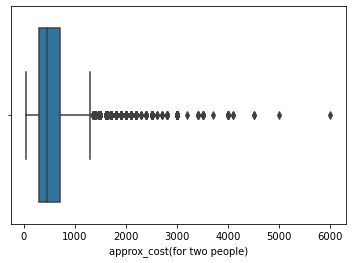

In [203]:
sns.boxplot(df['approx_cost(for two people)'])

In [204]:
def func(x):
    if x<=500:
        return '<500'
    elif x>500 and x<=1000:
    elif x>1000 and x<=2000:
    elif x>2000 and x<=1000:
    elif x>500 and x<=1000:

IndentationError: expected an indented block (Temp/ipykernel_15984/3708453621.py, line 5)

In [205]:
df.head()

,name,online_order,book_table,rate,votes,location,rest_type,cuisines,approx_cost(for two people),listed_in(type),cuisine_North Indian,cuisine_Mughlai,cuisine_Chinese,cuisine_Thai,cuisine_Cafe,cuisine_Mexican,cuisine_Italian,cuisine_South Indian,cuisine_Rajasthani,cuisine_Andhra,cuisine_Pizza,cuisine_Continental,cuisine_Momos,cuisine_Beverages,cuisine_Fast Food,cuisine_American,cuisine_French,cuisine_European,cuisine_Bakery,cuisine_Burger,cuisine_Desserts,cuisine_Biryani,cuisine_Street Food,cuisine_Rolls,cuisine_Ice Cream,cuisine_Healthy Food,cuisine_Salad,cuisine_Asian,cuisine_Korean,cuisine_Indonesian,cuisine_Japanese,cuisine_Goan,cuisine_Seafood,cuisine_Kebab,cuisine_Steak,cuisine_Mithai,cuisine_Iranian,cuisine_Sandwich,cuisine_Juices,cuisine_Mangalorean,cuisine_Vietnamese,cuisine_Hyderabadi,cuisine_Bengali,cuisine_Arabian,cuisine_BBQ,cuisine_Tea,cuisine_Afghani,cuisine_Lebanese,cuisine_Finger Food,cuisine_Tibetan,cuisine_Charcoal Chicken,cuisine_Middle Eastern,cuisine_Mediterranean,cuisine_Kerala,cuisine_Oriya,cuisine_Bihari,cuisine_Roast Chicken,cuisine_Maharashtrian,cuisine_Bohri,cuisine_African,cuisine_Nepalese,cuisine_Turkish,cuisine_Tamil,cuisine_Tex-Mex,cuisine_Belgian,cuisine_Gujarati,cuisine_South American,cuisine_Konkan,cuisine_Chettinad,cuisine_Wraps,cuisine_Coffee,cuisine_Indian,cuisine_Afghan,cuisine_Modern Indian,cuisine_Lucknowi,cuisine_Australian,cuisine_Kashmiri,cuisine_Spanish,cuisine_Malaysian,cuisine_Burmese,cuisine_Sushi,cuisine_Portuguese,cuisine_Parsi,cuisine_Greek,cuisine_North Eastern,cuisine_Bar Food,cuisine_Singaporean,cuisine_Awadhi,cuisine_Naga,cuisine_Cantonese,cuisine_Grill,cuisine_Bubble Tea,cuisine_Hot dogs,cuisine_Assamese,cuisine_Sri Lankan,cuisine_Mongolian,cuisine_British,cuisine_Paan,cuisine_German,cuisine_Russian,cuisine_Drinks Only,cuisine_Jewish,cuisine_Vegan,cuisine_Pan Asian,cuisine_Raw Meats,cuisine_Sindhi,rest_type_Casual Dining,rest_type_Cafe,rest_type_Quick Bites,rest_type_Delivery,rest_type_Mess,rest_type_Dessert Parlor,rest_type_Bakery,rest_type_Pub,rest_type_Takeaway,rest_type_Fine Dining,rest_type_Beverage Shop,rest_type_Sweet Shop,rest_type_Bar,rest_type_Kiosk,rest_type_Food Truck,rest_type_Microbrewery,rest_type_Lounge,rest_type_Food Court,rest_type_Dhaba,rest_type_Club,rest_type_Irani Cafee,rest_type_Confectionery,rest_type_Bhojanalya,rest_type_Pop Up,rest_type_Meat Shop
0,Jalsa,Yes,Yes,4.1,775,Banashankari,Casual Dining,"North Indian, Mughlai, Chinese",800,Buffet,Yes,Yes,Yes,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,Yes,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No
1,Spice Elephant,Yes,No,4.1,787,Banashankari,Casual Dining,"Chinese, North Indian, Thai",800,Buffet,Yes,No,Yes,Yes,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,Yes,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No
2,San Churro Cafe,Yes,No,3.8,918,Banashankari,"Cafe, Casual Dining","Cafe, Mexican, Italian",800,Buffet,No,No,No,No,Yes,Yes,Yes,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,Yes,Yes,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No
3,Addhuri Udupi Bhojana,No,No,3.7,88,Banashankari,Quick Bites,"South Indian, North Indian",300,Buffet,Yes,No,No,No,No,No,No,Yes,No,No,No,No,N

In [206]:
# Univariate Analysis

# Rate

D:\Ananconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='rate'>

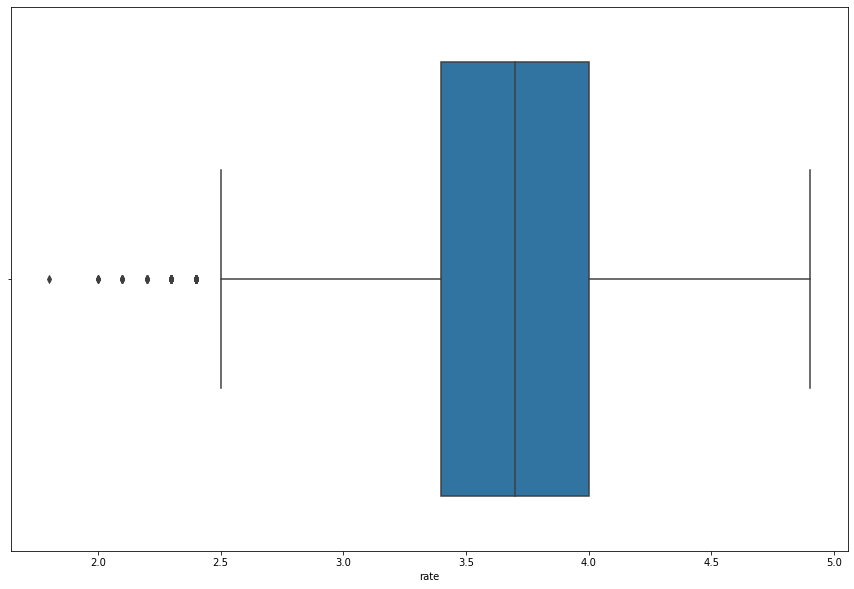

In [207]:
plt.figure(figsize=(15,10))
sns.boxplot(df['rate'])

In [208]:
df['rate'].mean()

3.6584292559343665

# Votes

D:\Ananconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='votes'>

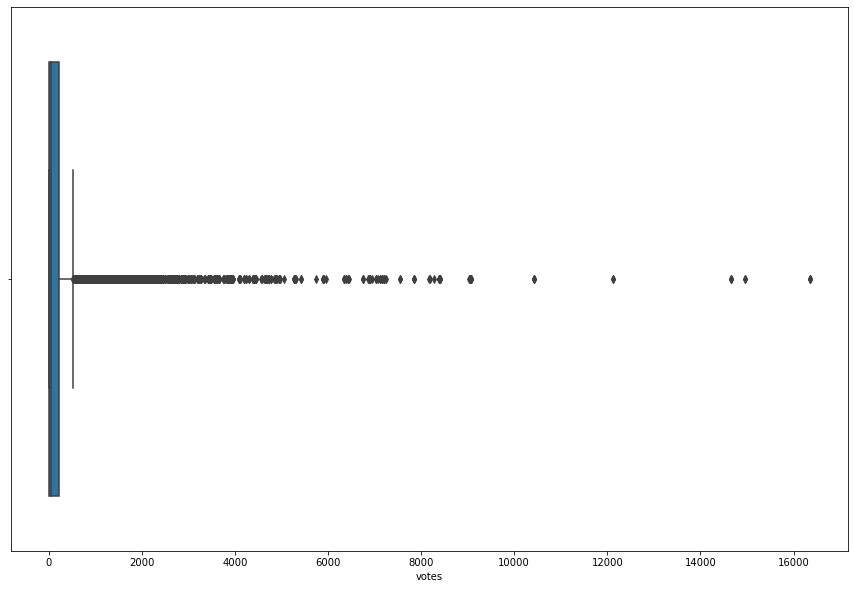

In [209]:
plt.figure(figsize=(15,10))
sns.boxplot(df['votes'])

# approx_cost(for two people)

D:\Ananconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='approx_cost(for two people)'>

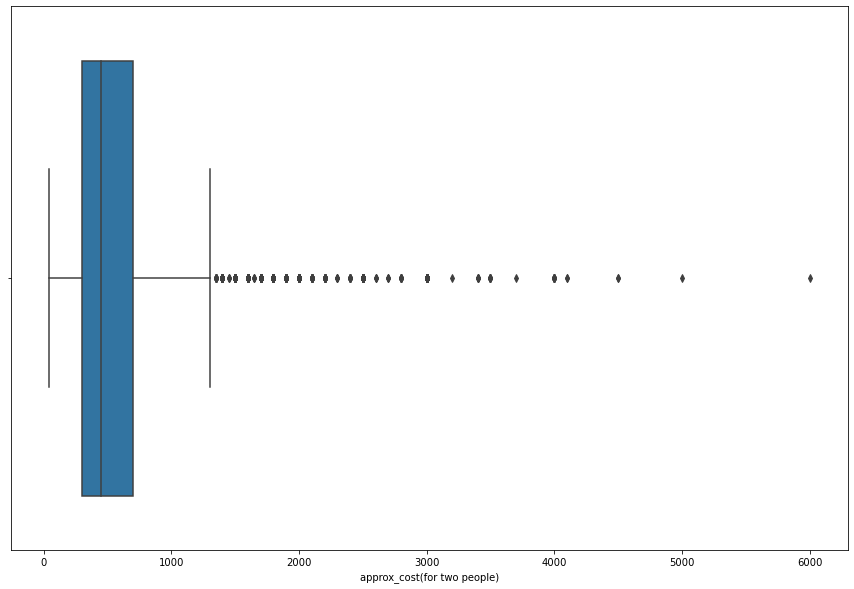

In [210]:
plt.figure(figsize=(15,10))
sns.boxplot(df['approx_cost(for two people)'])

In [211]:
df['approx_cost(for two people)'].mean()

573.8386848047585

In [212]:
df['approx_cost(for two people)'].describe()

count    18157.000000
mean       573.838685
std        434.532704
min         40.000000
25%        300.000000
50%        450.000000
75%        700.000000
max       6000.000000
Name: approx_cost(for two people), dtype: float64

# rest_type

In [213]:
df['rest_type'].value_counts()

Quick Bites                   6341
Casual Dining                 4065
Cafe                          1336
Dessert Parlor                 893
Delivery                       719
                              ... 
Fine Dining, Microbrewery        1
Quick Bites, Kiosk               1
Sweet Shop, Dessert Parlor       1
Dessert Parlor, Food Court       1
Pop Up                           1
Name: rest_type, Length: 91, dtype: int64

# Statistical test for significance

In [214]:
from scipy.stats import f_oneway

In [215]:
# Ho- Online order is not significant
# H1- online order is significant

In [216]:
f_oneway(df[df['online_order']=='Yes']['rate'],df[df['online_order']=='No']['rate'])

F_onewayResult(statistic=114.08478873078313, pvalue=1.497162742458366e-26)

In [217]:
# We reject the null hypothesis as the p value is less than 0.05
# hence we can say that the online order column is significant


In [218]:
# Ho- Book Table is not significant
# H1- Book Table is significant

In [219]:
f_oneway(df[df['book_table']=='Yes']['rate'],df[df['book_table']=='No']['rate'])

F_onewayResult(statistic=3681.5627955212285, pvalue=0.0)

In [220]:
# We reject the null hypothesis and say that the book table column is significant

In [221]:
# Ho- listed_in(type) is not significant
# H1- listed_in(city) is significant

In [222]:
df['listed_in(type)'].value_counts()

Delivery              7992
Dine-out              6896
Desserts              1484
Cafes                  681
Drinks & nightlife     419
Pubs and bars          344
Buffet                 341
Name: listed_in(type), dtype: int64

In [223]:
from scipy.stats import f_oneway

In [224]:
f_oneway(df[df['listed_in(type)']=='Delivery']['rate'],
        df[df['listed_in(type)']=='Dine-out']['rate'],
        df[df['listed_in(type)']=='Desserts']['rate'],
        df[df['listed_in(type)']=='Cafes']['rate'],
        df[df['listed_in(type)']=='Drinks & nightlife']['rate'],
        df[df['listed_in(type)']=='Pubs and bars']['rate'],
        df[df['listed_in(type)']=='Buffet']['rate'])

F_onewayResult(statistic=159.32057784062053, pvalue=5.2558060811387286e-198)

In [225]:
# We can reject the null hypothesis and say that the listed_in(type) column is significant

In [226]:
df.corr()

,rate,votes,approx_cost(for two people)
rate,1.000000,0.420907,0.370686
votes,0.420907,1.000000,0.372686
approx_cost(for two people),0.370686,0.372686,1.000000


In [227]:
# Both the input numerical variable have fairly good correlation with the target variable

# Checking assumptions for linear regression

In [228]:
df.corr()

,rate,votes,approx_cost(for two people)
rate,1.000000,0.420907,0.370686
votes,0.420907,1.000000,0.372686
approx_cost(for two people),0.370686,0.372686,1.000000


In [229]:
# As we can see there is no strong multicollinearity between the input  variables

In [230]:
df['votes'].skew()


7.6826345401195075

In [231]:
df['approx_cost(for two people)'].skew()

2.609412796214938

D:\Ananconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:>

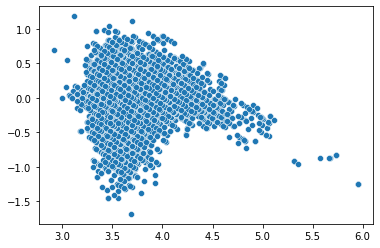

In [232]:
sns.scatterplot(model.predict(x),model.resid)

In [233]:
df.head()

,name,online_order,book_table,rate,votes,location,rest_type,cuisines,approx_cost(for two people),listed_in(type),cuisine_North Indian,cuisine_Mughlai,cuisine_Chinese,cuisine_Thai,cuisine_Cafe,cuisine_Mexican,cuisine_Italian,cuisine_South Indian,cuisine_Rajasthani,cuisine_Andhra,cuisine_Pizza,cuisine_Continental,cuisine_Momos,cuisine_Beverages,cuisine_Fast Food,cuisine_American,cuisine_French,cuisine_European,cuisine_Bakery,cuisine_Burger,cuisine_Desserts,cuisine_Biryani,cuisine_Street Food,cuisine_Rolls,cuisine_Ice Cream,cuisine_Healthy Food,cuisine_Salad,cuisine_Asian,cuisine_Korean,cuisine_Indonesian,cuisine_Japanese,cuisine_Goan,cuisine_Seafood,cuisine_Kebab,cuisine_Steak,cuisine_Mithai,cuisine_Iranian,cuisine_Sandwich,cuisine_Juices,cuisine_Mangalorean,cuisine_Vietnamese,cuisine_Hyderabadi,cuisine_Bengali,cuisine_Arabian,cuisine_BBQ,cuisine_Tea,cuisine_Afghani,cuisine_Lebanese,cuisine_Finger Food,cuisine_Tibetan,cuisine_Charcoal Chicken,cuisine_Middle Eastern,cuisine_Mediterranean,cuisine_Kerala,cuisine_Oriya,cuisine_Bihari,cuisine_Roast Chicken,cuisine_Maharashtrian,cuisine_Bohri,cuisine_African,cuisine_Nepalese,cuisine_Turkish,cuisine_Tamil,cuisine_Tex-Mex,cuisine_Belgian,cuisine_Gujarati,cuisine_South American,cuisine_Konkan,cuisine_Chettinad,cuisine_Wraps,cuisine_Coffee,cuisine_Indian,cuisine_Afghan,cuisine_Modern Indian,cuisine_Lucknowi,cuisine_Australian,cuisine_Kashmiri,cuisine_Spanish,cuisine_Malaysian,cuisine_Burmese,cuisine_Sushi,cuisine_Portuguese,cuisine_Parsi,cuisine_Greek,cuisine_North Eastern,cuisine_Bar Food,cuisine_Singaporean,cuisine_Awadhi,cuisine_Naga,cuisine_Cantonese,cuisine_Grill,cuisine_Bubble Tea,cuisine_Hot dogs,cuisine_Assamese,cuisine_Sri Lankan,cuisine_Mongolian,cuisine_British,cuisine_Paan,cuisine_German,cuisine_Russian,cuisine_Drinks Only,cuisine_Jewish,cuisine_Vegan,cuisine_Pan Asian,cuisine_Raw Meats,cuisine_Sindhi,rest_type_Casual Dining,rest_type_Cafe,rest_type_Quick Bites,rest_type_Delivery,rest_type_Mess,rest_type_Dessert Parlor,rest_type_Bakery,rest_type_Pub,rest_type_Takeaway,rest_type_Fine Dining,rest_type_Beverage Shop,rest_type_Sweet Shop,rest_type_Bar,rest_type_Kiosk,rest_type_Food Truck,rest_type_Microbrewery,rest_type_Lounge,rest_type_Food Court,rest_type_Dhaba,rest_type_Club,rest_type_Irani Cafee,rest_type_Confectionery,rest_type_Bhojanalya,rest_type_Pop Up,rest_type_Meat Shop
0,Jalsa,Yes,Yes,4.1,775,Banashankari,Casual Dining,"North Indian, Mughlai, Chinese",800,Buffet,Yes,Yes,Yes,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,Yes,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No
1,Spice Elephant,Yes,No,4.1,787,Banashankari,Casual Dining,"Chinese, North Indian, Thai",800,Buffet,Yes,No,Yes,Yes,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,Yes,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No
2,San Churro Cafe,Yes,No,3.8,918,Banashankari,"Cafe, Casual Dining","Cafe, Mexican, Italian",800,Buffet,No,No,No,No,Yes,Yes,Yes,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,Yes,Yes,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No
3,Addhuri Udupi Bhojana,No,No,3.7,88,Banashankari,Quick Bites,"South Indian, North Indian",300,Buffet,Yes,No,No,No,No,No,No,Yes,No,No,No,No,N

In [234]:
l=[]

In [235]:
a=df_oo.loc[0,'name'],df_oo.loc[0,'listed_in(city)']

NameError: name 'df_oo' is not defined

In [ ]:
a

In [ ]:
type(a)

In [ ]:
df.loc[0,'name'],df.loc[0,'listed_in(city)']

In [ ]:
sns.scatterplot(df['approx_cost(for two people)'],df['rate'])

In [ ]:
sns.scatterplot(df['votes'],df['rate'])

In [ ]:
# string='North Indian,Continental'
# while string!='' or string!=' ':
#     p=string.find(',')

#     if p>0:
#         q=string.find(', ')
#         r=string.find(',',q)
#         print(string[:r])
#         if q<0:
            
#             r=string.find(',')
#             print(string[:r])
#             string=string[r+1:]
#             #print(string)
#         elif q>0:
#             string=string[q+2:]
#             #print(string)
#     elif p<0:
#         print(string)
#         break
            
    

            

In [ ]:
# for i in df.index:
#     string=df.loc[i,'cuisines']
    
#     while string!='' or string!=' ':
#         p=string.find(',')
#         if p<0:
#             q=string.find(', ')
#             string=string[q+2:]
#             df.loc[i,string]='Yes'
#         else:
#             string=string[p+1:]
#             df.loc[i,string]='Yes'
        

In [ ]:
df.head()

In [ ]:
plt.figure(figsize=(15,10))
sns.boxplot(df['rate'],df['book_table'])

In [ ]:
plt.figure(figsize=(15,10))
sns.boxplot(df['rate'],df['online_order'])

In [ ]:
sns.scatterplot(df['votes'],df['rate'],hue=df['book_table'])

In [ ]:
sns.scatterplot(df['votes'],df['rate'])

In [ ]:
plt.figure(figsize=(15,10))
sns.boxplot(df['approx_cost(for two people)'],df['listed_in(type)'])

In [ ]:
plt.figure(figsize=(15,10))
sns.histplot(df['rate'],kde=True)

In [ ]:
df['rate'].skew()

In [ ]:
pd.crosstab(df['online_order'],df['listed_in(type)'])

In [236]:
df.head()

,name,online_order,book_table,rate,votes,location,rest_type,cuisines,approx_cost(for two people),listed_in(type),cuisine_North Indian,cuisine_Mughlai,cuisine_Chinese,cuisine_Thai,cuisine_Cafe,cuisine_Mexican,cuisine_Italian,cuisine_South Indian,cuisine_Rajasthani,cuisine_Andhra,cuisine_Pizza,cuisine_Continental,cuisine_Momos,cuisine_Beverages,cuisine_Fast Food,cuisine_American,cuisine_French,cuisine_European,cuisine_Bakery,cuisine_Burger,cuisine_Desserts,cuisine_Biryani,cuisine_Street Food,cuisine_Rolls,cuisine_Ice Cream,cuisine_Healthy Food,cuisine_Salad,cuisine_Asian,cuisine_Korean,cuisine_Indonesian,cuisine_Japanese,cuisine_Goan,cuisine_Seafood,cuisine_Kebab,cuisine_Steak,cuisine_Mithai,cuisine_Iranian,cuisine_Sandwich,cuisine_Juices,cuisine_Mangalorean,cuisine_Vietnamese,cuisine_Hyderabadi,cuisine_Bengali,cuisine_Arabian,cuisine_BBQ,cuisine_Tea,cuisine_Afghani,cuisine_Lebanese,cuisine_Finger Food,cuisine_Tibetan,cuisine_Charcoal Chicken,cuisine_Middle Eastern,cuisine_Mediterranean,cuisine_Kerala,cuisine_Oriya,cuisine_Bihari,cuisine_Roast Chicken,cuisine_Maharashtrian,cuisine_Bohri,cuisine_African,cuisine_Nepalese,cuisine_Turkish,cuisine_Tamil,cuisine_Tex-Mex,cuisine_Belgian,cuisine_Gujarati,cuisine_South American,cuisine_Konkan,cuisine_Chettinad,cuisine_Wraps,cuisine_Coffee,cuisine_Indian,cuisine_Afghan,cuisine_Modern Indian,cuisine_Lucknowi,cuisine_Australian,cuisine_Kashmiri,cuisine_Spanish,cuisine_Malaysian,cuisine_Burmese,cuisine_Sushi,cuisine_Portuguese,cuisine_Parsi,cuisine_Greek,cuisine_North Eastern,cuisine_Bar Food,cuisine_Singaporean,cuisine_Awadhi,cuisine_Naga,cuisine_Cantonese,cuisine_Grill,cuisine_Bubble Tea,cuisine_Hot dogs,cuisine_Assamese,cuisine_Sri Lankan,cuisine_Mongolian,cuisine_British,cuisine_Paan,cuisine_German,cuisine_Russian,cuisine_Drinks Only,cuisine_Jewish,cuisine_Vegan,cuisine_Pan Asian,cuisine_Raw Meats,cuisine_Sindhi,rest_type_Casual Dining,rest_type_Cafe,rest_type_Quick Bites,rest_type_Delivery,rest_type_Mess,rest_type_Dessert Parlor,rest_type_Bakery,rest_type_Pub,rest_type_Takeaway,rest_type_Fine Dining,rest_type_Beverage Shop,rest_type_Sweet Shop,rest_type_Bar,rest_type_Kiosk,rest_type_Food Truck,rest_type_Microbrewery,rest_type_Lounge,rest_type_Food Court,rest_type_Dhaba,rest_type_Club,rest_type_Irani Cafee,rest_type_Confectionery,rest_type_Bhojanalya,rest_type_Pop Up,rest_type_Meat Shop
0,Jalsa,Yes,Yes,4.1,775,Banashankari,Casual Dining,"North Indian, Mughlai, Chinese",800,Buffet,Yes,Yes,Yes,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,Yes,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No
1,Spice Elephant,Yes,No,4.1,787,Banashankari,Casual Dining,"Chinese, North Indian, Thai",800,Buffet,Yes,No,Yes,Yes,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,Yes,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No
2,San Churro Cafe,Yes,No,3.8,918,Banashankari,"Cafe, Casual Dining","Cafe, Mexican, Italian",800,Buffet,No,No,No,No,Yes,Yes,Yes,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,Yes,Yes,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No
3,Addhuri Udupi Bhojana,No,No,3.7,88,Banashankari,Quick Bites,"South Indian, North Indian",300,Buffet,Yes,No,No,No,No,No,No,Yes,No,No,No,No,N

In [237]:
from sklearn.tree import DecisionTreeRegressor

In [238]:
x=df.drop(columns=['name','rate'])

In [239]:
x.head()

,online_order,book_table,votes,location,rest_type,cuisines,approx_cost(for two people),listed_in(type),cuisine_North Indian,cuisine_Mughlai,cuisine_Chinese,cuisine_Thai,cuisine_Cafe,cuisine_Mexican,cuisine_Italian,cuisine_South Indian,cuisine_Rajasthani,cuisine_Andhra,cuisine_Pizza,cuisine_Continental,cuisine_Momos,cuisine_Beverages,cuisine_Fast Food,cuisine_American,cuisine_French,cuisine_European,cuisine_Bakery,cuisine_Burger,cuisine_Desserts,cuisine_Biryani,cuisine_Street Food,cuisine_Rolls,cuisine_Ice Cream,cuisine_Healthy Food,cuisine_Salad,cuisine_Asian,cuisine_Korean,cuisine_Indonesian,cuisine_Japanese,cuisine_Goan,cuisine_Seafood,cuisine_Kebab,cuisine_Steak,cuisine_Mithai,cuisine_Iranian,cuisine_Sandwich,cuisine_Juices,cuisine_Mangalorean,cuisine_Vietnamese,cuisine_Hyderabadi,cuisine_Bengali,cuisine_Arabian,cuisine_BBQ,cuisine_Tea,cuisine_Afghani,cuisine_Lebanese,cuisine_Finger Food,cuisine_Tibetan,cuisine_Charcoal Chicken,cuisine_Middle Eastern,cuisine_Mediterranean,cuisine_Kerala,cuisine_Oriya,cuisine_Bihari,cuisine_Roast Chicken,cuisine_Maharashtrian,cuisine_Bohri,cuisine_African,cuisine_Nepalese,cuisine_Turkish,cuisine_Tamil,cuisine_Tex-Mex,cuisine_Belgian,cuisine_Gujarati,cuisine_South American,cuisine_Konkan,cuisine_Chettinad,cuisine_Wraps,cuisine_Coffee,cuisine_Indian,cuisine_Afghan,cuisine_Modern Indian,cuisine_Lucknowi,cuisine_Australian,cuisine_Kashmiri,cuisine_Spanish,cuisine_Malaysian,cuisine_Burmese,cuisine_Sushi,cuisine_Portuguese,cuisine_Parsi,cuisine_Greek,cuisine_North Eastern,cuisine_Bar Food,cuisine_Singaporean,cuisine_Awadhi,cuisine_Naga,cuisine_Cantonese,cuisine_Grill,cuisine_Bubble Tea,cuisine_Hot dogs,cuisine_Assamese,cuisine_Sri Lankan,cuisine_Mongolian,cuisine_British,cuisine_Paan,cuisine_German,cuisine_Russian,cuisine_Drinks Only,cuisine_Jewish,cuisine_Vegan,cuisine_Pan Asian,cuisine_Raw Meats,cuisine_Sindhi,rest_type_Casual Dining,rest_type_Cafe,rest_type_Quick Bites,rest_type_Delivery,rest_type_Mess,rest_type_Dessert Parlor,rest_type_Bakery,rest_type_Pub,rest_type_Takeaway,rest_type_Fine Dining,rest_type_Beverage Shop,rest_type_Sweet Shop,rest_type_Bar,rest_type_Kiosk,rest_type_Food Truck,rest_type_Microbrewery,rest_type_Lounge,rest_type_Food Court,rest_type_Dhaba,rest_type_Club,rest_type_Irani Cafee,rest_type_Confectionery,rest_type_Bhojanalya,rest_type_Pop Up,rest_type_Meat Shop
0,Yes,Yes,775,Banashankari,Casual Dining,"North Indian, Mughlai, Chinese",800,Buffet,Yes,Yes,Yes,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,Yes,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No
1,Yes,No,787,Banashankari,Casual Dining,"Chinese, North Indian, Thai",800,Buffet,Yes,No,Yes,Yes,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,Yes,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No
2,Yes,No,918,Banashankari,"Cafe, Casual Dining","Cafe, Mexican, Italian",800,Buffet,No,No,No,No,Yes,Yes,Yes,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,Yes,Yes,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No
3,No,No,88,Banashankari,Quick Bites,"South Indian, North Indian",300,Buffet,Yes,No,No,No,No,No,No,Yes,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No

In [240]:
y=df['rate']

# Decision Tree

In [241]:
dt=DecisionTreeRegressor(max_depth=30)

In [242]:
x=pd.get_dummies(x,drop_first=True)

In [243]:
from sklearn.model_selection import train_test_split

In [244]:
x_train,x_test,y_train,y_test=train_test_split(x,y,random_state=10)

In [245]:
dt.fit(x_train,y_train)

DecisionTreeRegressor(max_depth=30)

In [246]:
from sklearn import tree

In [247]:
import matplotlib.pyplot as plt

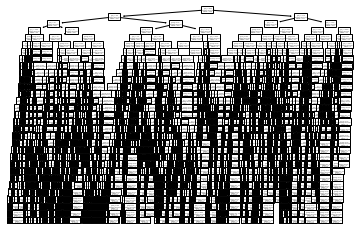

In [248]:
tree.plot_tree(dt)
plt.show()


In [249]:
from sklearn import metrics

In [250]:
metrics.r2_score(y_test,dt.predict(x_test))

0.6180210947590221

# Random Forest Regressor

In [251]:
from sklearn.ensemble import RandomForestRegressor

In [252]:
rf=RandomForestRegressor()

In [253]:
rf.fit(x_train,y_train)

RandomForestRegressor()

In [254]:
metrics.r2_score(y_test,rf.predict(x_test))

0.7336568314297593

In [267]:
mse=metrics.mean_squared_error(y_test,rf.predict(x_test))
mse

0.05320817217627264

In [268]:
np.sqrt(mse)

0.23066896665193748

In [255]:
from xgboost import XGBRegressor

# XG Boost

In [256]:
xg=XGBRegressor()

In [257]:
xg.fit(x_train,y_train)

XGBRegressor(base_score=0.5, booster='gbtree', colsample_bylevel=1,
             colsample_bynode=1, colsample_bytree=1, enable_categorical=False,
             gamma=0, gpu_id=-1, importance_type=None,
             interaction_constraints='', learning_rate=0.300000012,
             max_delta_step=0, max_depth=6, min_child_weight=1, missing=nan,
             monotone_constraints='()', n_estimators=100, n_jobs=8,
             num_parallel_tree=1, predictor='auto', random_state=0, reg_alpha=0,
             reg_lambda=1, scale_pos_weight=1, subsample=1, tree_method='exact',
             validate_parameters=1, verbosity=None)

In [258]:
metrics.r2_score(y_test,xg.predict(x_test))

0.5831107190257787

In [259]:
from sklearn.ensemble import 


In [ ]:
dt

In [261]:
est=[dt,rf]

In [279]:
df.head()

,name,online_order,book_table,rate,votes,location,rest_type,cuisines,approx_cost(for two people),listed_in(type),cuisine_North Indian,cuisine_Mughlai,cuisine_Chinese,cuisine_Thai,cuisine_Cafe,cuisine_Mexican,cuisine_Italian,cuisine_South Indian,cuisine_Rajasthani,cuisine_Andhra,cuisine_Pizza,cuisine_Continental,cuisine_Momos,cuisine_Beverages,cuisine_Fast Food,cuisine_American,cuisine_French,cuisine_European,cuisine_Bakery,cuisine_Burger,cuisine_Desserts,cuisine_Biryani,cuisine_Street Food,cuisine_Rolls,cuisine_Ice Cream,cuisine_Healthy Food,cuisine_Salad,cuisine_Asian,cuisine_Korean,cuisine_Indonesian,cuisine_Japanese,cuisine_Goan,cuisine_Seafood,cuisine_Kebab,cuisine_Steak,cuisine_Mithai,cuisine_Iranian,cuisine_Sandwich,cuisine_Juices,cuisine_Mangalorean,cuisine_Vietnamese,cuisine_Hyderabadi,cuisine_Bengali,cuisine_Arabian,cuisine_BBQ,cuisine_Tea,cuisine_Afghani,cuisine_Lebanese,cuisine_Finger Food,cuisine_Tibetan,cuisine_Charcoal Chicken,cuisine_Middle Eastern,cuisine_Mediterranean,cuisine_Kerala,cuisine_Oriya,cuisine_Bihari,cuisine_Roast Chicken,cuisine_Maharashtrian,cuisine_Bohri,cuisine_African,cuisine_Nepalese,cuisine_Turkish,cuisine_Tamil,cuisine_Tex-Mex,cuisine_Belgian,cuisine_Gujarati,cuisine_South American,cuisine_Konkan,cuisine_Chettinad,cuisine_Wraps,cuisine_Coffee,cuisine_Indian,cuisine_Afghan,cuisine_Modern Indian,cuisine_Lucknowi,cuisine_Australian,cuisine_Kashmiri,cuisine_Spanish,cuisine_Malaysian,cuisine_Burmese,cuisine_Sushi,cuisine_Portuguese,cuisine_Parsi,cuisine_Greek,cuisine_North Eastern,cuisine_Bar Food,cuisine_Singaporean,cuisine_Awadhi,cuisine_Naga,cuisine_Cantonese,cuisine_Grill,cuisine_Bubble Tea,cuisine_Hot dogs,cuisine_Assamese,cuisine_Sri Lankan,cuisine_Mongolian,cuisine_British,cuisine_Paan,cuisine_German,cuisine_Russian,cuisine_Drinks Only,cuisine_Jewish,cuisine_Vegan,cuisine_Pan Asian,cuisine_Raw Meats,cuisine_Sindhi,rest_type_Casual Dining,rest_type_Cafe,rest_type_Quick Bites,rest_type_Delivery,rest_type_Mess,rest_type_Dessert Parlor,rest_type_Bakery,rest_type_Pub,rest_type_Takeaway,rest_type_Fine Dining,rest_type_Beverage Shop,rest_type_Sweet Shop,rest_type_Bar,rest_type_Kiosk,rest_type_Food Truck,rest_type_Microbrewery,rest_type_Lounge,rest_type_Food Court,rest_type_Dhaba,rest_type_Club,rest_type_Irani Cafee,rest_type_Confectionery,rest_type_Bhojanalya,rest_type_Pop Up,rest_type_Meat Shop
0,Jalsa,Yes,Yes,4.1,775,Banashankari,Casual Dining,"North Indian, Mughlai, Chinese",800,Buffet,Yes,Yes,Yes,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,Yes,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No
1,Spice Elephant,Yes,No,4.1,787,Banashankari,Casual Dining,"Chinese, North Indian, Thai",800,Buffet,Yes,No,Yes,Yes,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,Yes,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No
2,San Churro Cafe,Yes,No,3.8,918,Banashankari,"Cafe, Casual Dining","Cafe, Mexican, Italian",800,Buffet,No,No,No,No,Yes,Yes,Yes,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,Yes,Yes,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No
3,Addhuri Udupi Bhojana,No,No,3.7,88,Banashankari,Quick Bites,"South Indian, North Indian",300,Buffet,Yes,No,No,No,No,No,No,Yes,No,No,No,No,N

# Adaboost

In [282]:
from sklearn.ensemble import AdaBoostRegressor

In [285]:
ab=AdaBoostRegressor()

In [286]:
ab.fit(x_train,y_train)

AdaBoostRegressor()

In [287]:
metrics.r2_score(y_test,ab.predict(x_test))

0.25984035499166946

In [288]:
from sklearn.ensemble import GradientBoostingRegressor

In [289]:
gb=GradientBoostingRegressor()

In [290]:
gb.fit(x_train,y_train)

GradientBoostingRegressor()

In [291]:
metrics.r2_score(y_test,gb.predict(x_test))

0.4780685638179729

In [280]:
for i in df.columns:
    if 'cuisine' in i:
        print(i)

cuisines
cuisine_North Indian
cuisine_Mughlai
cuisine_Chinese
cuisine_Thai
cuisine_Cafe
cuisine_Mexican
cuisine_Italian
cuisine_South Indian
cuisine_Rajasthani
cuisine_Andhra
cuisine_Pizza
cuisine_Continental
cuisine_Momos
cuisine_Beverages
cuisine_Fast Food
cuisine_American
cuisine_French
cuisine_European
cuisine_Bakery
cuisine_Burger
cuisine_Desserts
cuisine_Biryani
cuisine_Street Food
cuisine_Rolls
cuisine_Ice Cream
cuisine_Healthy Food
cuisine_Salad
cuisine_Asian
cuisine_Korean
cuisine_Indonesian
cuisine_Japanese
cuisine_Goan
cuisine_Seafood
cuisine_Kebab
cuisine_Steak
cuisine_Mithai
cuisine_Iranian
cuisine_Sandwich
cuisine_Juices
cuisine_Mangalorean
cuisine_Vietnamese
cuisine_Hyderabadi
cuisine_Bengali
cuisine_Arabian
cuisine_BBQ
cuisine_Tea
cuisine_Afghani
cuisine_Lebanese
cuisine_Finger Food
cuisine_Tibetan
cuisine_Charcoal Chicken
cuisine_Middle Eastern
cuisine_Mediterranean
cuisine_Kerala
cuisine_Oriya
cuisine_Bihari
cuisine_Roast Chicken
cuisine_Maharashtrian
cuisine_Bohri
cu

In [271]:
from sklearn.linear_model import Ridge

In [277]:
lr = LinearRegression()

ridge = Ridge(random_state=1)


stregr = StackingRegressor(estimators=, 
                           final_estimator=rf)

In [93]:
df.head()

,name,online_order,book_table,rate,votes,location,rest_type,cuisines,approx_cost(for two people),listed_in(type),...,rest_type_Microbrewery,rest_type_Lounge,rest_type_Food Court,rest_type_Dhaba,rest_type_Club,rest_type_Irani Cafee,rest_type_Confectionery,rest_type_Bhojanalya,rest_type_Pop Up,rest_type_Meat Shop
0,Jalsa,Yes,Yes,4.1,775,Banashankari,Casual Dining,"North Indian, Mughlai, Chinese",800,Buffet,...,No,No,No,No,No,No,No,No,No,No
1,Spice Elephant,Yes,No,4.1,787,Banashankari,Casual Dining,"Chinese, North Indian, Thai",800,Buffet,...,No,No,No,No,No,No,No,No,No,No
2,San Churro Cafe,Yes,No,3.8,918,Banashankari,"Cafe, Casual Dining","Cafe, Mexican, Italian",800,Buffet,...,No,No,No,No,No,No,No,No,No,No
3,Addhuri Udupi Bhojana,No,No,3.7,88,Banashankari,Quick Bites,"South Indian, North Indian",300,Buffet,...,No,No,No,No,No,No,No,No,No,No
4,Grand Village,No,No,3.8,166,Basavanagudi,Casual Dining,"North Indian, Rajasthani",600,Buffet,...,No,No,No,No,No,No,No,No,No,No


In [94]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 44022 entries, 0 to 44021
Columns: 141 entries, name to rest_type_Meat Shop
dtypes: float64(1), int64(1), object(139)
memory usage: 47.4+ MB


In [101]:
df['cost_2']=df['approx_cost(for two people)']

In [102]:
df.drop(columns='approx_cost(for two people)',inplace=True)

In [103]:
df.head()

,name,online_order,book_table,rate,votes,location,rest_type,cuisines,listed_in(type),cuisine_North Indian,...,rest_type_Lounge,rest_type_Food Court,rest_type_Dhaba,rest_type_Club,rest_type_Irani Cafee,rest_type_Confectionery,rest_type_Bhojanalya,rest_type_Pop Up,rest_type_Meat Shop,cost_2
0,Jalsa,Yes,Yes,4.1,775,Banashankari,Casual Dining,"North Indian, Mughlai, Chinese",Buffet,Yes,...,No,No,No,No,No,No,No,No,No,800
1,Spice Elephant,Yes,No,4.1,787,Banashankari,Casual Dining,"Chinese, North Indian, Thai",Buffet,Yes,...,No,No,No,No,No,No,No,No,No,800
2,San Churro Cafe,Yes,No,3.8,918,Banashankari,"Cafe, Casual Dining","Cafe, Mexican, Italian",Buffet,No,...,No,No,No,No,No,No,No,No,No,800
3,Addhuri Udupi Bhojana,No,No,3.7,88,Banashankari,Quick Bites,"South Indian, North Indian",Buffet,Yes,...,No,No,No,No,No,No,No,No,No,300
4,Grand Village,No,No,3.8,166,Basavanagudi,Casual Dining,"North Indian, Rajasthani",Buffet,Yes,...,No,No,No,No,No,No,No,No,No,600


In [110]:
df['cost_2'].replace({',':''},regex=True,inplace=True)

In [112]:
df['cost_2']=df['cost_2'].astype('int')

In [113]:
df.head()

,name,online_order,book_table,rate,votes,location,rest_type,cuisines,listed_in(type),cuisine_North Indian,...,rest_type_Lounge,rest_type_Food Court,rest_type_Dhaba,rest_type_Club,rest_type_Irani Cafee,rest_type_Confectionery,rest_type_Bhojanalya,rest_type_Pop Up,rest_type_Meat Shop,cost_2
0,Jalsa,Yes,Yes,4.1,775,Banashankari,Casual Dining,"North Indian, Mughlai, Chinese",Buffet,Yes,...,No,No,No,No,No,No,No,No,No,800
1,Spice Elephant,Yes,No,4.1,787,Banashankari,Casual Dining,"Chinese, North Indian, Thai",Buffet,Yes,...,No,No,No,No,No,No,No,No,No,800
2,San Churro Cafe,Yes,No,3.8,918,Banashankari,"Cafe, Casual Dining","Cafe, Mexican, Italian",Buffet,No,...,No,No,No,No,No,No,No,No,No,800
3,Addhuri Udupi Bhojana,No,No,3.7,88,Banashankari,Quick Bites,"South Indian, North Indian",Buffet,Yes,...,No,No,No,No,No,No,No,No,No,300
4,Grand Village,No,No,3.8,166,Basavanagudi,Casual Dining,"North Indian, Rajasthani",Buffet,Yes,...,No,No,No,No,No,No,No,No,No,600


In [123]:
len(df.loc[1,'cuisines'].split(','))

3

In [124]:
for i in df.index:
    df.loc[i,'Cuisine Count']=len(df.loc[i,'cuisines'].split(','))

In [125]:
df.head()

,name,online_order,book_table,rate,votes,location,rest_type,cuisines,listed_in(type),cuisine_North Indian,...,rest_type_Food Court,rest_type_Dhaba,rest_type_Club,rest_type_Irani Cafee,rest_type_Confectionery,rest_type_Bhojanalya,rest_type_Pop Up,rest_type_Meat Shop,cost_2,Cuisine Count
0,Jalsa,Yes,Yes,4.1,775,Banashankari,Casual Dining,"North Indian, Mughlai, Chinese",Buffet,Yes,...,No,No,No,No,No,No,No,No,800,3.0
1,Spice Elephant,Yes,No,4.1,787,Banashankari,Casual Dining,"Chinese, North Indian, Thai",Buffet,Yes,...,No,No,No,No,No,No,No,No,800,3.0
2,San Churro Cafe,Yes,No,3.8,918,Banashankari,"Cafe, Casual Dining","Cafe, Mexican, Italian",Buffet,No,...,No,No,No,No,No,No,No,No,800,3.0
3,Addhuri Udupi Bhojana,No,No,3.7,88,Banashankari,Quick Bites,"South Indian, North Indian",Buffet,Yes,...,No,No,No,No,No,No,No,No,300,2.0
4,Grand Village,No,No,3.8,166,Basavanagudi,Casual Dining,"North Indian, Rajasthani",Buffet,Yes,...,No,No,No,No,No,No,No,No,600,2.0


In [126]:
df['Cuisine Count']=df['Cuisine Count'].astype('int')

In [127]:
df['rest_type']

0              Casual Dining
1              Casual Dining
2        Cafe, Casual Dining
3                Quick Bites
4              Casual Dining
                ...         
44017     Casual Dining, Bar
44018     Casual Dining, Bar
44019                    Bar
44020                    Bar
44021     Bar, Casual Dining
Name: rest_type, Length: 44022, dtype: object

In [129]:
len(df)

44022

In [130]:
df.drop_duplicates(inplace=True)

In [131]:
len(df)

28251

In [132]:
df.head()

,name,online_order,book_table,rate,votes,location,rest_type,cuisines,listed_in(type),cuisine_North Indian,...,rest_type_Food Court,rest_type_Dhaba,rest_type_Club,rest_type_Irani Cafee,rest_type_Confectionery,rest_type_Bhojanalya,rest_type_Pop Up,rest_type_Meat Shop,cost_2,Cuisine Count
0,Jalsa,Yes,Yes,4.1,775,Banashankari,Casual Dining,"North Indian, Mughlai, Chinese",Buffet,Yes,...,No,No,No,No,No,No,No,No,800,3
1,Spice Elephant,Yes,No,4.1,787,Banashankari,Casual Dining,"Chinese, North Indian, Thai",Buffet,Yes,...,No,No,No,No,No,No,No,No,800,3
2,San Churro Cafe,Yes,No,3.8,918,Banashankari,"Cafe, Casual Dining","Cafe, Mexican, Italian",Buffet,No,...,No,No,No,No,No,No,No,No,800,3
3,Addhuri Udupi Bhojana,No,No,3.7,88,Banashankari,Quick Bites,"South Indian, North Indian",Buffet,Yes,...,No,No,No,No,No,No,No,No,300,2
4,Grand Village,No,No,3.8,166,Basavanagudi,Casual Dining,"North Indian, Rajasthani",Buffet,Yes,...,No,No,No,No,No,No,No,No,600,2


In [134]:
df1=df[['name','online_order','book_table','rate','location','rest_type','cuisines','listed_in(type)','cost_2','Cuisine Count']]

In [135]:
df1.head()

,name,online_order,book_table,rate,location,rest_type,cuisines,listed_in(type),cost_2,Cuisine Count
0,Jalsa,Yes,Yes,4.1,Banashankari,Casual Dining,"North Indian, Mughlai, Chinese",Buffet,800,3
1,Spice Elephant,Yes,No,4.1,Banashankari,Casual Dining,"Chinese, North Indian, Thai",Buffet,800,3
2,San Churro Cafe,Yes,No,3.8,Banashankari,"Cafe, Casual Dining","Cafe, Mexican, Italian",Buffet,800,3
3,Addhuri Udupi Bhojana,No,No,3.7,Banashankari,Quick Bites,"South Indian, North Indian",Buffet,300,2
4,Grand Village,No,No,3.8,Basavanagudi,Casual Dining,"North Indian, Rajasthani",Buffet,600,2


In [136]:
from sklearn.preprocessing import LabelEncoder

In [137]:
le=LabelEncoder()

In [140]:
pd.get_dummies(df1[['online_order','book_table']],drop_first=True)

,online_order_Yes,book_table_Yes
0,1,1
1,1,0
2,1,0
3,0,0
4,0,0
...,...,...
44017,0,0
44018,0,0
44019,0,0
44020,0,1


In [142]:
df1[['online_order','book_table']]=pd.get_dummies(df1[['online_order','book_table']],drop_first=True)

D:\Ananconda3\lib\site-packages\pandas\core\frame.py:3641: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self[k1] = value[k2]


In [143]:
df1.head()

,name,online_order,book_table,rate,location,rest_type,cuisines,listed_in(type),cost_2,Cuisine Count
0,Jalsa,1,1,4.1,Banashankari,Casual Dining,"North Indian, Mughlai, Chinese",Buffet,800,3
1,Spice Elephant,1,0,4.1,Banashankari,Casual Dining,"Chinese, North Indian, Thai",Buffet,800,3
2,San Churro Cafe,1,0,3.8,Banashankari,"Cafe, Casual Dining","Cafe, Mexican, Italian",Buffet,800,3
3,Addhuri Udupi Bhojana,0,0,3.7,Banashankari,Quick Bites,"South Indian, North Indian",Buffet,300,2
4,Grand Village,0,0,3.8,Basavanagudi,Casual Dining,"North Indian, Rajasthani",Buffet,600,2


In [145]:
df1['location']=le.fit_transform(df['location'])

C:\Users\jesuj\AppData\Local\Temp/ipykernel_20092/1970066446.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df1['location']=le.fit_transform(df['location'])


In [147]:
df1['rest_type']=le.fit_transform(df1['rest_type'])

C:\Users\jesuj\AppData\Local\Temp/ipykernel_20092/2032835511.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df1['rest_type']=le.fit_transform(df1['rest_type'])


In [148]:
df1['cuisines']=le.fit_transform(df1['cuisines'])

C:\Users\jesuj\AppData\Local\Temp/ipykernel_20092/2436149828.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df1['cuisines']=le.fit_transform(df1['cuisines'])


In [149]:
df1['listed_in(type)']=le.fit_transform(df1['listed_in(type)'])

C:\Users\jesuj\AppData\Local\Temp/ipykernel_20092/1323913374.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df1['listed_in(type)']=le.fit_transform(df1['listed_in(type)'])


In [150]:
df1.head()

,name,online_order,book_table,rate,location,rest_type,cuisines,listed_in(type),cost_2,Cuisine Count
0,Jalsa,1,1,4.1,1,25,1926,0,800,3
1,Spice Elephant,1,0,4.1,1,25,837,0,800,3
2,San Churro Cafe,1,0,3.8,1,20,672,0,800,3
3,Addhuri Udupi Bhojana,0,0,3.7,1,76,2259,0,300,2
4,Grand Village,0,0,3.8,4,25,1953,0,600,2


In [151]:
x=df1.drop(columns=['name','rate'])

In [152]:
x.head()

,online_order,book_table,location,rest_type,cuisines,listed_in(type),cost_2,Cuisine Count
0,1,1,1,25,1926,0,800,3
1,1,0,1,25,837,0,800,3
2,1,0,1,20,672,0,800,3
3,0,0,1,76,2259,0,300,2
4,0,0,4,25,1953,0,600,2


In [153]:
y=df1['rate']

In [154]:
from sklearn.ensemble import RandomForestRegressor

In [155]:
from sklearn.model_selection import train_test_split

In [156]:
x_train,x_test,y_train,y_test=train_test_split(x,y,random_state=10)


In [157]:
rf=RandomForestRegressor()

In [158]:
rf.fit(x_train,y_train)

RandomForestRegressor()

In [159]:
from sklearn import metrics

In [160]:
metrics.r2_score(y_test,rf.predict(x_test))

0.7626652143708401

In [198]:
data=pd.read_csv('zomato.csv')

In [199]:
data.head()

,url,address,name,online_order,book_table,rate,votes,phone,location,rest_type,dish_liked,cuisines,approx_cost(for two people),reviews_list,menu_item,listed_in(type),listed_in(city)
0,https://www.zomato.com/bangalore/jalsa-banasha...,"942, 21st Main Road, 2nd Stage, Banashankari, ...",Jalsa,Yes,Yes,4.1/5,775,080 42297555\r\n+91 9743772233,Banashankari,Casual Dining,"Pasta, Lunch Buffet, Masala Papad, Paneer Laja...","North Indian, Mughlai, Chinese",800,"[('Rated 4.0', 'RATED\n A beautiful place to ...",[],Buffet,Banashankari
1,https://www.zomato.com/bangalore/spice-elephan...,"2nd Floor, 80 Feet Road, Near Big Bazaar, 6th ...",Spice Elephant,Yes,No,4.1/5,787,080 41714161,Banashankari,Casual Dining,"Momos, Lunch Buffet, Chocolate Nirvana, Thai G...","Chinese, North Indian, Thai",800,"[('Rated 4.0', 'RATED\n Had been here for din...",[],Buffet,Banashankari
2,https://www.zomato.com/SanchurroBangalore?cont...,"1112, Next to KIMS Medical College, 17th Cross...",San Churro Cafe,Yes,No,3.8/5,918,+91 9663487993,Banashankari,"Cafe, Casual Dining","Churros, Cannelloni, Minestrone Soup, Hot Choc...","Cafe, Mexican, Italian",800,"[('Rated 3.0', ""RATED\n Ambience is not that ...",[],Buffet,Banashankari
3,https://www.zomato.com/bangalore/addhuri-udupi...,"1st Floor, Annakuteera, 3rd Stage, Banashankar...",Addhuri Udupi Bhojana,No,No,3.7/5,88,+91 9620009302,Banashankari,Quick Bites,Masala Dosa,"South Indian, North Indian",300,"[('Rated 4.0', ""RATED\n Great food and proper...",[],Buffet,Banashankari
4,https://www.zomato.com/bangalore/grand-village...,"10, 3rd Floor, Lakshmi Associates, Gandhi Baza...",Grand Village,No,No,3.8/5,166,+91 8026612447\r\n+91 9901210005,Basavanagudi,Casual Dining,"Panipuri, Gol Gappe","North Indian, Rajasthani",600,"[('Rated 4.0', 'RATED\n Very good restaurant ...",[],Buffet,Banashankari


In [200]:
data['online_order']= pd.get_dummies(data.online_order, drop_first=True)
data['book_table']= pd.get_dummies(data.book_table, drop_first=True)
data

,url,address,name,online_order,book_table,rate,votes,phone,location,rest_type,dish_liked,cuisines,approx_cost(for two people),reviews_list,menu_item,listed_in(type),listed_in(city)
0,https://www.zomato.com/bangalore/jalsa-banasha...,"942, 21st Main Road, 2nd Stage, Banashankari, ...",Jalsa,1,1,4.1/5,775,080 42297555\r\n+91 9743772233,Banashankari,Casual Dining,"Pasta, Lunch Buffet, Masala Papad, Paneer Laja...","North Indian, Mughlai, Chinese",800,"[('Rated 4.0', 'RATED\n A beautiful place to ...",[],Buffet,Banashankari
1,https://www.zomato.com/bangalore/spice-elephan...,"2nd Floor, 80 Feet Road, Near Big Bazaar, 6th ...",Spice Elephant,1,0,4.1/5,787,080 41714161,Banashankari,Casual Dining,"Momos, Lunch Buffet, Chocolate Nirvana, Thai G...","Chinese, North Indian, Thai",800,"[('Rated 4.0', 'RATED\n Had been here for din...",[],Buffet,Banashankari
2,https://www.zomato.com/SanchurroBangalore?cont...,"1112, Next to KIMS Medical College, 17th Cross...",San Churro Cafe,1,0,3.8/5,918,+91 9663487993,Banashankari,"Cafe, Casual Dining","Churros, Cannelloni, Minestrone Soup, Hot Choc...","Cafe, Mexican, Italian",800,"[('Rated 3.0', ""RATED\n Ambience is not that ...",[],Buffet,Banashankari
3,https://www.zomato.com/bangalore/addhuri-udupi...,"1st Floor, Annakuteera, 3rd Stage, Banashankar...",Addhuri Udupi Bhojana,0,0,3.7/5,88,+91 9620009302,Banashankari,Quick Bites,Masala Dosa,"South Indian, North Indian",300,"[('Rated 4.0', ""RATED\n Great food and proper...",[],Buffet,Banashankari
4,https://www.zomato.com/bangalore/grand-village...,"10, 3rd Floor, Lakshmi Associates, Gandhi Baza...",Grand Village,0,0,3.8/5,166,+91 8026612447\r\n+91 9901210005,Basavanagudi,Casual Dining,"Panipuri, Gol Gappe","North Indian, Rajasthani",600,"[('Rated 4.0', 'RATED\n Very good restaurant ...",[],Buffet,Banashankari
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
51712,https://www.zomato.com/bangalore/best-brews-fo...,"Four Points by Sheraton Bengaluru, 43/3, White...",Best Brews - Four Points by Sheraton Bengaluru...,0,0,3.6 /5,27,080 40301477,Whitefield,Bar,NaN,Continental,"1,500","[('Rated 5.0', ""RATED\n Food and service are ...",[],Pubs and bars,Whitefield
51713,https://www.zomato.com/bangalore/vinod-bar-and...,"Number 10, Garudachar Palya, Mahadevapura, Whi...",Vinod Bar And Restaurant,0,0,NaN,0,+91 8197675843,Whitefield,Bar,NaN,Finger Food,600,[],[],Pubs and bars,Whitefield
51714,https://www.zomato.com/bangalore/plunge-sherat...,Sheraton Grand Bengaluru Whitefield Hotel & Co...,Plunge - Sheraton Grand Bengaluru Whitefield H...,0,0,NaN,0,NaN,Whitefield,Bar,NaN,Finger Food,"2,000",[],[],Pubs and bars,Whitefield
51715,https://www.zomato.com/bangalore/chime-sherato...,Sheraton Grand Bengaluru Whitefield Hotel & Co...,Chime - Sheraton Grand Bengaluru Whitefield Ho...,0,1,4.3 /5,236,080 49652769,"ITPL Main Road, Whitefield",Bar,"Cocktails, Pizza, Buttermilk",Finger Food,"2,500","[('Rated 4.0', 'RATED\n Nice and friendly pla...",[],Pubs and bars,Whitefield


In [201]:
data=data[data.cuisines.isna()==False]

In [202]:
data.drop(columns=["url", 'address','phone','listed_in(city)'], inplace  =True)

D:\Ananconda3\lib\site-packages\pandas\core\frame.py:4906: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().drop(


In [203]:
data.rename(columns={'approx_cost(for two people)': 'average_cost'}, inplace=True)

D:\Ananconda3\lib\site-packages\pandas\core\frame.py:5039: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().rename(


In [204]:
data.rename(columns={'listed_in(type)': 'listed_type'}, inplace=True)

In [205]:
dishes_data = data[data.dish_liked.notnull()]
dishes_data.dish_liked = dishes_data.dish_liked.apply(lambda x:x.lower().strip())

D:\Ananconda3\lib\site-packages\pandas\core\generic.py:5516: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self[name] = value


In [206]:
data['rate'] = data['rate'].replace('NEW',np.NaN)
data['rate'] = data['rate'].replace('-',np.NaN)
data.dropna(how = 'any', inplace = True)

C:\Users\jesuj\AppData\Local\Temp/ipykernel_20092/3284587246.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['rate'] = data['rate'].replace('NEW',np.NaN)
C:\Users\jesuj\AppData\Local\Temp/ipykernel_20092/3284587246.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['rate'] = data['rate'].replace('-',np.NaN)
D:\Ananconda3\lib\site-packages\pandas\util\_decorators.py:311: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documenta

In [207]:
data['rate'] = data.loc[:,'rate'].replace('[ ]','',regex = True)
data['rate'] = data['rate'].astype(str)
data['rate'] = data['rate'].apply(lambda r: r.replace('/5',''))
data['rate'] = data['rate'].apply(lambda r: float(r))

C:\Users\jesuj\AppData\Local\Temp/ipykernel_20092/2820877120.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['rate'] = data.loc[:,'rate'].replace('[ ]','',regex = True)
C:\Users\jesuj\AppData\Local\Temp/ipykernel_20092/2820877120.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['rate'] = data['rate'].astype(str)
C:\Users\jesuj\AppData\Local\Temp/ipykernel_20092/2820877120.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_ind

In [208]:
data['online_order']= pd.get_dummies(data.online_order, drop_first=True)
data['book_table']= pd.get_dummies(data.book_table, drop_first=True)
data

C:\Users\jesuj\AppData\Local\Temp/ipykernel_20092/3535926613.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['online_order']= pd.get_dummies(data.online_order, drop_first=True)
C:\Users\jesuj\AppData\Local\Temp/ipykernel_20092/3535926613.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['book_table']= pd.get_dummies(data.book_table, drop_first=True)


,name,online_order,book_table,rate,votes,location,rest_type,dish_liked,cuisines,average_cost,reviews_list,menu_item,listed_type
0,Jalsa,1,1,4.1,775,Banashankari,Casual Dining,"Pasta, Lunch Buffet, Masala Papad, Paneer Laja...","North Indian, Mughlai, Chinese",800,"[('Rated 4.0', 'RATED\n A beautiful place to ...",[],Buffet
1,Spice Elephant,1,0,4.1,787,Banashankari,Casual Dining,"Momos, Lunch Buffet, Chocolate Nirvana, Thai G...","Chinese, North Indian, Thai",800,"[('Rated 4.0', 'RATED\n Had been here for din...",[],Buffet
2,San Churro Cafe,1,0,3.8,918,Banashankari,"Cafe, Casual Dining","Churros, Cannelloni, Minestrone Soup, Hot Choc...","Cafe, Mexican, Italian",800,"[('Rated 3.0', ""RATED\n Ambience is not that ...",[],Buffet
3,Addhuri Udupi Bhojana,0,0,3.7,88,Banashankari,Quick Bites,Masala Dosa,"South Indian, North Indian",300,"[('Rated 4.0', ""RATED\n Great food and proper...",[],Buffet
4,Grand Village,0,0,3.8,166,Basavanagudi,Casual Dining,"Panipuri, Gol Gappe","North Indian, Rajasthani",600,"[('Rated 4.0', 'RATED\n Very good restaurant ...",[],Buffet
...,...,...,...,...,...,...,...,...,...,...,...,...,...
51705,Izakaya Gastro Pub,1,1,3.8,128,Whitefield,"Bar, Casual Dining","Beer, Chicken Guntur, Paneer Tikka, Fish, Nood...","North Indian, Continental, Mediterranean","1,200","[('Rated 3.0', ""RATED\n Nice place to hangout...",[],Pubs and bars
51707,M Bar - Bengaluru Marriott Hotel Whitefield,0,0,3.9,77,Whitefield,"Fine Dining, Bar",Rooftop Ambience,Finger Food,"2,000","[('Rated 4.0', 'RATED\n Went there post dinne...",[],Pubs and bars
51708,Keys Cafe - Keys Hotel,0,0,2.8,161,Whitefield,"Casual Dining, Bar","Salads, Coffee, Breakfast Buffet, Halwa, Chick...","Chinese, Continental, North Indian","1,200","[('Rated 3.0', 'RATED\n Place is good not tha...",[],Pubs and bars
51711,Bhagini,0,0,2.5,81,Whitefield,"Casual Dining, Bar","Biryani, Andhra Meal","Andhra, South Indian, Chinese, North Indian",800,"[('Rated 4.0', 'RATED\n A fine place to chill...",[],Pubs and bars


In [209]:
data1=data.copy()

In [210]:
data.drop(columns=['dish_liked','reviews_list','menu_item','listed_type'], inplace  =True)

D:\Ananconda3\lib\site-packages\pandas\core\frame.py:4906: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().drop(


In [211]:
data['rest_type'] = data['rest_type'].str.replace(',' , '') 
data['rest_type'] = data['rest_type'].astype(str).apply(lambda x: ' '.join(sorted(x.split())))
data['rest_type'].value_counts().head()

C:\Users\jesuj\AppData\Local\Temp/ipykernel_20092/2130938599.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['rest_type'] = data['rest_type'].str.replace(',' , '')
C:\Users\jesuj\AppData\Local\Temp/ipykernel_20092/2130938599.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['rest_type'] = data['rest_type'].astype(str).apply(lambda x: ' '.join(sorted(x.split())))


Casual Dining        7331
Bites Quick          5253
Cafe                 2375
Bar Casual Dining    1321
Dessert Parlor       1083
Name: rest_type, dtype: int64

In [212]:
data['cuisines'] = data['cuisines'].str.replace(',' , '') 
data['cuisines'] = data['cuisines'].astype(str).apply(lambda x: ' '.join(sorted(x.split())))
data['cuisines'].value_counts().head()

C:\Users\jesuj\AppData\Local\Temp/ipykernel_20092/2721207722.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['cuisines'] = data['cuisines'].str.replace(',' , '')
C:\Users\jesuj\AppData\Local\Temp/ipykernel_20092/2721207722.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['cuisines'] = data['cuisines'].astype(str).apply(lambda x: ' '.join(sorted(x.split())))


Indian North                         1152
Chinese Indian North                  852
Chinese Indian Indian North South     455
Indian South                          366
Cream Desserts Ice                    334
Name: cuisines, dtype: int64

In [213]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()                 
data['location'] = le.fit_transform(data['location'])
data['rest_type'] = le.fit_transform(data['rest_type'])
data['cuisines'] = le.fit_transform(data['cuisines'])
#data['dish_liked'] = T.fit_transform(data['dish_liked'].

C:\Users\jesuj\AppData\Local\Temp/ipykernel_20092/2199468563.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['location'] = le.fit_transform(data['location'])
C:\Users\jesuj\AppData\Local\Temp/ipykernel_20092/2199468563.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['rest_type'] = le.fit_transform(data['rest_type'])
C:\Users\jesuj\AppData\Local\Temp/ipykernel_20092/2199468563.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[ro

In [214]:
data["average_cost"] = data["average_cost"].str.replace(',' , '')

C:\Users\jesuj\AppData\Local\Temp/ipykernel_20092/2163635429.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data["average_cost"] = data["average_cost"].str.replace(',' , '')


In [215]:
data["average_cost"] = data["average_cost"].astype('float')

C:\Users\jesuj\AppData\Local\Temp/ipykernel_20092/3204092961.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data["average_cost"] = data["average_cost"].astype('float')


In [216]:
data.head()

,name,online_order,book_table,rate,votes,location,rest_type,cuisines,average_cost
0,Jalsa,1,1,4.1,775,1,29,951,800.0
1,Spice Elephant,1,0,4.1,787,1,29,963,800.0
2,San Churro Cafe,1,0,3.8,918,1,22,806,800.0
3,Addhuri Udupi Bhojana,0,0,3.7,88,1,19,1201,300.0
4,Grand Village,0,0,3.8,166,4,29,1237,600.0


In [217]:
x = data.drop(['rate','name'],axis = 1)

In [218]:
y = data['rate']

In [219]:
x.shape

(23259, 7)

In [220]:
y.shape

(23259,)

In [221]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(x,y,test_size = 0.2,random_state = 33)

In [222]:
#standarizing
#taking numeric values
from sklearn.preprocessing import StandardScaler
num_values1=data.select_dtypes(['float64','int64']).columns
scaler = StandardScaler()
scaler.fit(data[num_values1])
data[num_values1]=scaler.transform(data[num_values1])

D:\Ananconda3\lib\site-packages\pandas\core\frame.py:3678: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self[col] = igetitem(value, i)


In [223]:
data.head()

,name,online_order,book_table,rate,votes,location,rest_type,cuisines,average_cost
0,Jalsa,1,1,0.455722,0.152328,1,29,951,0.089176
1,Spice Elephant,1,0,0.455722,0.163105,1,29,963,0.089176
2,San Churro Cafe,1,0,-0.248401,0.280757,1,22,806,0.089176
3,Addhuri Udupi Bhojana,0,0,-0.483109,-0.464668,1,19,1201,-0.871467
4,Grand Village,0,0,-0.248401,-0.394616,4,29,1237,-0.295081


In [224]:
from sklearn import metrics
from sklearn.ensemble import RandomForestRegressor
rfr = RandomForestRegressor()
rfr.fit(X_train,y_train)
y_pred_rfr = rfr.predict(X_test)

In [225]:
rfr.score(X_test,y_test)*100

92.18257121958642

In [226]:
print('Mean Absolute Error:', metrics.mean_absolute_error(y_test, y_pred_rfr))
print('Mean Squared Error:', metrics.mean_squared_error(y_test, y_pred_rfr))
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test, y_pred_rfr)))

Mean Absolute Error: 0.04454513955473999
Mean Squared Error: 0.013684794963969987
Root Mean Squared Error: 0.11698202838030287


In [227]:
#import required packages
from sklearn import neighbors
from sklearn.metrics import mean_squared_error 
from math import sqrt
rmse_val = [] #to store rmse values for different k
for K in range(20):
    K = K+1
    knn = neighbors.KNeighborsRegressor(n_neighbors = K)

    knn.fit(X_train, y_train)  #fit the model
    y_pred_knn=knn.predict(X_test) #make prediction on test set

In [228]:
knn.score(X_test,y_test)*100

46.55384027948944

In [229]:
print('Mean Absolute Error:', metrics.mean_absolute_error(y_test, y_pred_knn))
print('Mean Squared Error:', metrics.mean_squared_error(y_test, y_pred_knn))
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test, y_pred_knn)))

Mean Absolute Error: 0.21362532244196047
Mean Squared Error: 0.09356014079965605
Root Mean Squared Error: 0.30587602194296964


In [230]:
Randpred = pd.DataFrame({ "actual": y_test, "pred": y_pred_rfr })
Randpred

,actual,pred
26296,4.0,3.677000
2577,3.3,3.300000
9737,4.0,3.991000
42192,3.9,4.005000
38504,4.0,4.000000
...,...,...
3362,4.0,3.837000
24293,3.7,3.704107
36620,3.2,3.349000
25393,3.8,3.683000


In [231]:
import matplotlib.pyplot as plt

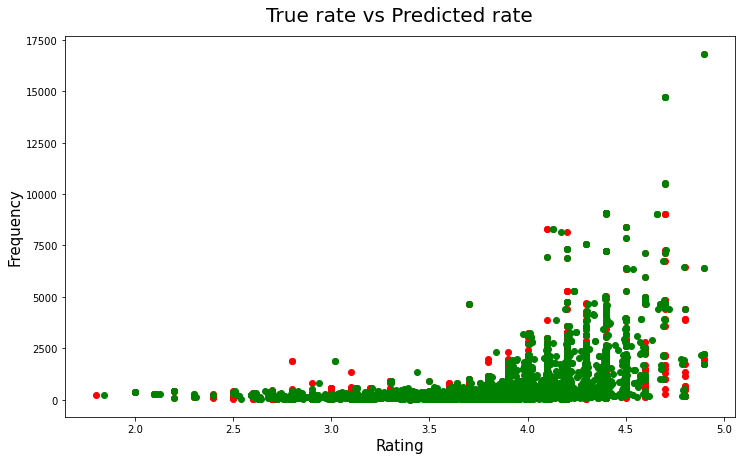

In [232]:
plt.figure(figsize=(12,7))
preds_rf = rfr.predict(X_test)
plt.scatter(y_test,X_test.iloc[:,2],color="red")
plt.title("True rate vs Predicted rate",size=20,pad=15)
plt.xlabel('Rating',size = 15)
plt.ylabel('Frequency',size = 15)
plt.scatter(preds_rf,X_test.iloc[:,2],color="green")

In [233]:
data1.head()

,name,online_order,book_table,rate,votes,location,rest_type,dish_liked,cuisines,average_cost,reviews_list,menu_item,listed_type
0,Jalsa,1,1,4.1,775,Banashankari,Casual Dining,"Pasta, Lunch Buffet, Masala Papad, Paneer Laja...","North Indian, Mughlai, Chinese",800,"[('Rated 4.0', 'RATED\n A beautiful place to ...",[],Buffet
1,Spice Elephant,1,0,4.1,787,Banashankari,Casual Dining,"Momos, Lunch Buffet, Chocolate Nirvana, Thai G...","Chinese, North Indian, Thai",800,"[('Rated 4.0', 'RATED\n Had been here for din...",[],Buffet
2,San Churro Cafe,1,0,3.8,918,Banashankari,"Cafe, Casual Dining","Churros, Cannelloni, Minestrone Soup, Hot Choc...","Cafe, Mexican, Italian",800,"[('Rated 3.0', ""RATED\n Ambience is not that ...",[],Buffet
3,Addhuri Udupi Bhojana,0,0,3.7,88,Banashankari,Quick Bites,Masala Dosa,"South Indian, North Indian",300,"[('Rated 4.0', ""RATED\n Great food and proper...",[],Buffet
4,Grand Village,0,0,3.8,166,Basavanagudi,Casual Dining,"Panipuri, Gol Gappe","North Indian, Rajasthani",600,"[('Rated 4.0', 'RATED\n Very good restaurant ...",[],Buffet


In [234]:
data1.drop(columns=['dish_liked','reviews_list','menu_item'], inplace  =True)

In [235]:
data1['rest_type'] = data1['rest_type'].str.replace(',' , '') 
data1['rest_type'] = data1['rest_type'].astype(str).apply(lambda x: ' '.join(sorted(x.split())))
data1['rest_type'].value_counts().head()

Casual Dining        7331
Bites Quick          5253
Cafe                 2375
Bar Casual Dining    1321
Dessert Parlor       1083
Name: rest_type, dtype: int64

In [236]:
data1['cuisines'] = data1['cuisines'].str.replace(',' , '') 
data1['cuisines'] = data1['cuisines'].astype(str).apply(lambda x: ' '.join(sorted(x.split())))
data1['cuisines'].value_counts().head()

Indian North                         1152
Chinese Indian North                  852
Chinese Indian Indian North South     455
Indian South                          366
Cream Desserts Ice                    334
Name: cuisines, dtype: int64

In [237]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()                 
data1['location'] = le.fit_transform(data1['location'])
data1['rest_type'] = le.fit_transform(data1['rest_type'])
data1['cuisines'] = le.fit_transform(data1['cuisines'])


In [238]:
data1["average_cost"] = data1["average_cost"].str.replace(',' , '')

In [215]:
data["average_cost"] = data["average_cost"].astype('float')

C:\Users\jesuj\AppData\Local\Temp/ipykernel_20092/3204092961.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data["average_cost"] = data["average_cost"].astype('float')


In [241]:
data1['listed_type'] = le.fit_transform(data1['listed_type'])

In [242]:
data1.head()

,name,online_order,book_table,rate,votes,location,rest_type,cuisines,average_cost,listed_type
0,Jalsa,1,1,4.1,775,1,29,951,800,0
1,Spice Elephant,1,0,4.1,787,1,29,963,800,0
2,San Churro Cafe,1,0,3.8,918,1,22,806,800,0
3,Addhuri Udupi Bhojana,0,0,3.7,88,1,19,1201,300,0
4,Grand Village,0,0,3.8,166,4,29,1237,600,0


In [243]:
x = data1.drop(['rate','name'],axis = 1)

In [244]:
y = data1['rate']

In [245]:
x.shape

(23259, 8)

In [246]:
y.shape

(23259,)

In [252]:
x.head()

,online_order,book_table,votes,location,rest_type,cuisines,average_cost,listed_type
0,1,1,775,1,29,951,800,0
1,1,0,787,1,29,963,800,0
2,1,0,918,1,22,806,800,0
3,0,0,88,1,19,1201,300,0
4,0,0,166,4,29,1237,600,0


In [253]:
y.head()

0    4.1
1    4.1
2    3.8
3    3.7
4    3.8
Name: rate, dtype: float64

In [254]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(x,y,test_size = 0.2,random_state = 33)

In [256]:
from sklearn import metrics
from sklearn.ensemble import RandomForestRegressor
rfr = RandomForestRegressor()
rfr.fit(X_train,y_train)
y_pred_rfr = rfr.predict(X_test)

In [257]:
rfr.score(X_test,y_test)*100

91.64197487192325

In [258]:
print('Mean Absolute Error:', metrics.mean_absolute_error(y_test, y_pred_rfr))
print('Mean Squared Error:', metrics.mean_squared_error(y_test, y_pred_rfr))
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test, y_pred_rfr)))

Mean Absolute Error: 0.04793348459681148
Mean Squared Error: 0.014631135555466867
Root Mean Squared Error: 0.12095923096426692


In [259]:
#import required packages
from sklearn import neighbors
from sklearn.metrics import mean_squared_error 
from math import sqrt
rmse_val = [] #to store rmse values for different k
for K in range(20):
    K = K+1
    knn = neighbors.KNeighborsRegressor(n_neighbors = K)

    knn.fit(X_train, y_train)  #fit the model
    y_pred_knn=knn.predict(X_test) #make prediction on test set

In [260]:
knn.score(X_test,y_test)*100

46.57880480471495

In [261]:
print('Mean Absolute Error:', metrics.mean_absolute_error(y_test, y_pred_knn))
print('Mean Squared Error:', metrics.mean_squared_error(y_test, y_pred_knn))
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test, y_pred_knn)))

Mean Absolute Error: 0.21355653482373174
Mean Squared Error: 0.09351643916595012
Root Mean Squared Error: 0.30580457675769035


In [262]:
Randpred = pd.DataFrame({ "actual": y_test, "pred": y_pred_rfr })
Randpred

,actual,pred
26296,4.0,3.748000
2577,3.3,3.300000
9737,4.0,3.996000
42192,3.9,4.022000
38504,4.0,4.000000
...,...,...
3362,4.0,3.833000
24293,3.7,3.676500
36620,3.2,3.212000
25393,3.8,3.692667


In [263]:
import matplotlib.pyplot as plt

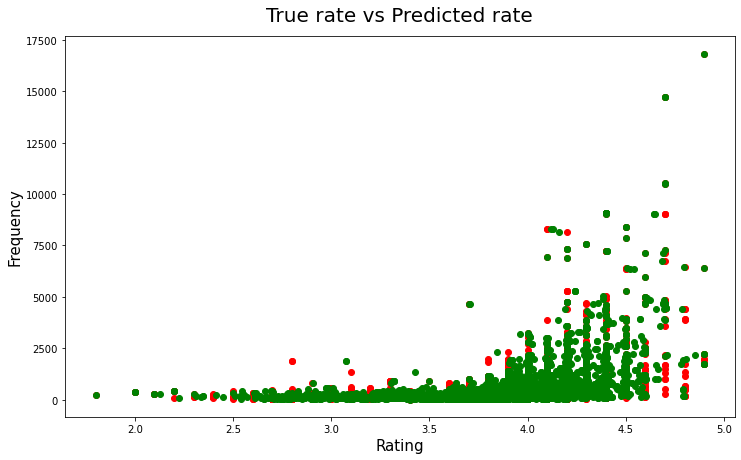

In [264]:
plt.figure(figsize=(12,7))
preds_rf = rfr.predict(X_test)
plt.scatter(y_test,X_test.iloc[:,2],color="red")
plt.title("True rate vs Predicted rate",size=20,pad=15)
plt.xlabel('Rating',size = 15)
plt.ylabel('Frequency',size = 15)
plt.scatter(preds_rf,X_test.iloc[:,2],color="green")

In [266]:
from xgboost import XGBRegressor

In [267]:
xgb=XGBRegressor()

In [271]:
X_train

,online_order,book_table,votes,location,rest_type,cuisines,average_cost,listed_type
22239,1,0,658,30,12,548,600,2
51273,0,0,51,84,29,1005,600,4
42285,1,0,658,15,23,780,750,1
31103,0,1,2248,42,29,990,1100,4
18522,0,0,74,26,3,399,400,3
...,...,...,...,...,...,...,...,...
23660,1,0,133,30,29,864,700,4
99,1,0,71,4,38,533,400,2
1273,1,0,69,0,38,541,300,2
13090,1,1,91,15,29,842,1800,4


In [272]:
y_train

22239    4.4
51273    3.7
42285    4.3
31103    4.3
18522    4.0
        ... 
23660    3.7
99       3.8
1273     4.0
13090    3.8
5661     4.0
Name: rate, Length: 18607, dtype: float64

In [274]:
data2=data1.copy()

In [275]:
data2.head()

,name,online_order,book_table,rate,votes,location,rest_type,cuisines,average_cost,listed_type
0,Jalsa,1,1,4.1,775,1,29,951,800,0
1,Spice Elephant,1,0,4.1,787,1,29,963,800,0
2,San Churro Cafe,1,0,3.8,918,1,22,806,800,0
3,Addhuri Udupi Bhojana,0,0,3.7,88,1,19,1201,300,0
4,Grand Village,0,0,3.8,166,4,29,1237,600,0


In [277]:
#standarizing
#taking numeric values
from sklearn.preprocessing import StandardScaler
num_values1=data2.select_dtypes(['float64','int64']).columns
scaler = StandardScaler()
scaler.fit(data[num_values1])
data2[num_values1]=scaler.transform(data[num_values1])

In [278]:
data2.head()

,name,online_order,book_table,rate,votes,location,rest_type,cuisines,average_cost,listed_type
0,Jalsa,1,1,0.455722,0.152328,1,29,951,800,0
1,Spice Elephant,1,0,0.455722,0.163105,1,29,963,800,0
2,San Churro Cafe,1,0,-0.248401,0.280757,1,22,806,800,0
3,Addhuri Udupi Bhojana,0,0,-0.483109,-0.464668,1,19,1201,300,0
4,Grand Village,0,0,-0.248401,-0.394616,4,29,1237,600,0


In [283]:
x = data2.drop(['rate','name'],axis = 1).astype('float')

In [284]:
y = data2['rate']

In [285]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(x,y,test_size = 0.2,random_state = 33)

In [286]:
X_train

,online_order,book_table,votes,location,rest_type,cuisines,average_cost,listed_type
22239,1.0,0.0,0.047250,30.0,12.0,548.0,600.0,2.0
51273,0.0,0.0,-0.497897,84.0,29.0,1005.0,600.0,4.0
42285,1.0,0.0,0.047250,15.0,23.0,780.0,750.0,1.0
31103,0.0,1.0,1.475232,42.0,29.0,990.0,1100.0,4.0
18522,0.0,0.0,-0.477241,26.0,3.0,399.0,400.0,3.0
...,...,...,...,...,...,...,...,...
23660,1.0,0.0,-0.424253,30.0,29.0,864.0,700.0,4.0
99,1.0,0.0,-0.479935,4.0,38.0,533.0,400.0,2.0
1273,1.0,0.0,-0.481732,0.0,38.0,541.0,300.0,2.0
13090,1.0,1.0,-0.461973,15.0,29.0,842.0,1800.0,4.0


In [287]:
xgb.fit(X_train,y_train)

XGBRegressor(base_score=0.5, booster='gbtree', colsample_bylevel=1,
             colsample_bynode=1, colsample_bytree=1, enable_categorical=False,
             gamma=0, gpu_id=-1, importance_type=None,
             interaction_constraints='', learning_rate=0.300000012,
             max_delta_step=0, max_depth=6, min_child_weight=1, missing=nan,
             monotone_constraints='()', n_estimators=100, n_jobs=8,
             num_parallel_tree=1, predictor='auto', random_state=0, reg_alpha=0,
             reg_lambda=1, scale_pos_weight=1, subsample=1, tree_method='exact',
             validate_parameters=1, verbosity=None)

In [289]:
metrics.r2_score(y_test,xgb.predict(X_test))

0.788965140712217

In [290]:
data1.head()

,name,online_order,book_table,rate,votes,location,rest_type,cuisines,average_cost,listed_type
0,Jalsa,1,1,4.1,775,1,29,951,800,0
1,Spice Elephant,1,0,4.1,787,1,29,963,800,0
2,San Churro Cafe,1,0,3.8,918,1,22,806,800,0
3,Addhuri Udupi Bhojana,0,0,3.7,88,1,19,1201,300,0
4,Grand Village,0,0,3.8,166,4,29,1237,600,0


In [291]:
df.head()

,name,online_order,book_table,rate,votes,location,rest_type,cuisines,listed_in(type),cuisine_North Indian,...,rest_type_Food Court,rest_type_Dhaba,rest_type_Club,rest_type_Irani Cafee,rest_type_Confectionery,rest_type_Bhojanalya,rest_type_Pop Up,rest_type_Meat Shop,cost_2,Cuisine Count
0,Jalsa,Yes,Yes,4.1,775,Banashankari,Casual Dining,"North Indian, Mughlai, Chinese",Buffet,Yes,...,No,No,No,No,No,No,No,No,800,3
1,Spice Elephant,Yes,No,4.1,787,Banashankari,Casual Dining,"Chinese, North Indian, Thai",Buffet,Yes,...,No,No,No,No,No,No,No,No,800,3
2,San Churro Cafe,Yes,No,3.8,918,Banashankari,"Cafe, Casual Dining","Cafe, Mexican, Italian",Buffet,No,...,No,No,No,No,No,No,No,No,800,3
3,Addhuri Udupi Bhojana,No,No,3.7,88,Banashankari,Quick Bites,"South Indian, North Indian",Buffet,Yes,...,No,No,No,No,No,No,No,No,300,2
4,Grand Village,No,No,3.8,166,Basavanagudi,Casual Dining,"North Indian, Rajasthani",Buffet,Yes,...,No,No,No,No,No,No,No,No,600,2


In [306]:
data=pd.read_csv('zomato.csv')

In [307]:
data.head()

,url,address,name,online_order,book_table,rate,votes,phone,location,rest_type,dish_liked,cuisines,approx_cost(for two people),reviews_list,menu_item,listed_in(type),listed_in(city)
0,https://www.zomato.com/bangalore/jalsa-banasha...,"942, 21st Main Road, 2nd Stage, Banashankari, ...",Jalsa,Yes,Yes,4.1/5,775,080 42297555\r\n+91 9743772233,Banashankari,Casual Dining,"Pasta, Lunch Buffet, Masala Papad, Paneer Laja...","North Indian, Mughlai, Chinese",800,"[('Rated 4.0', 'RATED\n A beautiful place to ...",[],Buffet,Banashankari
1,https://www.zomato.com/bangalore/spice-elephan...,"2nd Floor, 80 Feet Road, Near Big Bazaar, 6th ...",Spice Elephant,Yes,No,4.1/5,787,080 41714161,Banashankari,Casual Dining,"Momos, Lunch Buffet, Chocolate Nirvana, Thai G...","Chinese, North Indian, Thai",800,"[('Rated 4.0', 'RATED\n Had been here for din...",[],Buffet,Banashankari
2,https://www.zomato.com/SanchurroBangalore?cont...,"1112, Next to KIMS Medical College, 17th Cross...",San Churro Cafe,Yes,No,3.8/5,918,+91 9663487993,Banashankari,"Cafe, Casual Dining","Churros, Cannelloni, Minestrone Soup, Hot Choc...","Cafe, Mexican, Italian",800,"[('Rated 3.0', ""RATED\n Ambience is not that ...",[],Buffet,Banashankari
3,https://www.zomato.com/bangalore/addhuri-udupi...,"1st Floor, Annakuteera, 3rd Stage, Banashankar...",Addhuri Udupi Bhojana,No,No,3.7/5,88,+91 9620009302,Banashankari,Quick Bites,Masala Dosa,"South Indian, North Indian",300,"[('Rated 4.0', ""RATED\n Great food and proper...",[],Buffet,Banashankari
4,https://www.zomato.com/bangalore/grand-village...,"10, 3rd Floor, Lakshmi Associates, Gandhi Baza...",Grand Village,No,No,3.8/5,166,+91 8026612447\r\n+91 9901210005,Basavanagudi,Casual Dining,"Panipuri, Gol Gappe","North Indian, Rajasthani",600,"[('Rated 4.0', 'RATED\n Very good restaurant ...",[],Buffet,Banashankari


In [308]:
data['online_order']= pd.get_dummies(data.online_order, drop_first=True)
data['book_table']= pd.get_dummies(data.book_table, drop_first=True)
data

,url,address,name,online_order,book_table,rate,votes,phone,location,rest_type,dish_liked,cuisines,approx_cost(for two people),reviews_list,menu_item,listed_in(type),listed_in(city)
0,https://www.zomato.com/bangalore/jalsa-banasha...,"942, 21st Main Road, 2nd Stage, Banashankari, ...",Jalsa,1,1,4.1/5,775,080 42297555\r\n+91 9743772233,Banashankari,Casual Dining,"Pasta, Lunch Buffet, Masala Papad, Paneer Laja...","North Indian, Mughlai, Chinese",800,"[('Rated 4.0', 'RATED\n A beautiful place to ...",[],Buffet,Banashankari
1,https://www.zomato.com/bangalore/spice-elephan...,"2nd Floor, 80 Feet Road, Near Big Bazaar, 6th ...",Spice Elephant,1,0,4.1/5,787,080 41714161,Banashankari,Casual Dining,"Momos, Lunch Buffet, Chocolate Nirvana, Thai G...","Chinese, North Indian, Thai",800,"[('Rated 4.0', 'RATED\n Had been here for din...",[],Buffet,Banashankari
2,https://www.zomato.com/SanchurroBangalore?cont...,"1112, Next to KIMS Medical College, 17th Cross...",San Churro Cafe,1,0,3.8/5,918,+91 9663487993,Banashankari,"Cafe, Casual Dining","Churros, Cannelloni, Minestrone Soup, Hot Choc...","Cafe, Mexican, Italian",800,"[('Rated 3.0', ""RATED\n Ambience is not that ...",[],Buffet,Banashankari
3,https://www.zomato.com/bangalore/addhuri-udupi...,"1st Floor, Annakuteera, 3rd Stage, Banashankar...",Addhuri Udupi Bhojana,0,0,3.7/5,88,+91 9620009302,Banashankari,Quick Bites,Masala Dosa,"South Indian, North Indian",300,"[('Rated 4.0', ""RATED\n Great food and proper...",[],Buffet,Banashankari
4,https://www.zomato.com/bangalore/grand-village...,"10, 3rd Floor, Lakshmi Associates, Gandhi Baza...",Grand Village,0,0,3.8/5,166,+91 8026612447\r\n+91 9901210005,Basavanagudi,Casual Dining,"Panipuri, Gol Gappe","North Indian, Rajasthani",600,"[('Rated 4.0', 'RATED\n Very good restaurant ...",[],Buffet,Banashankari
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
51712,https://www.zomato.com/bangalore/best-brews-fo...,"Four Points by Sheraton Bengaluru, 43/3, White...",Best Brews - Four Points by Sheraton Bengaluru...,0,0,3.6 /5,27,080 40301477,Whitefield,Bar,NaN,Continental,"1,500","[('Rated 5.0', ""RATED\n Food and service are ...",[],Pubs and bars,Whitefield
51713,https://www.zomato.com/bangalore/vinod-bar-and...,"Number 10, Garudachar Palya, Mahadevapura, Whi...",Vinod Bar And Restaurant,0,0,NaN,0,+91 8197675843,Whitefield,Bar,NaN,Finger Food,600,[],[],Pubs and bars,Whitefield
51714,https://www.zomato.com/bangalore/plunge-sherat...,Sheraton Grand Bengaluru Whitefield Hotel & Co...,Plunge - Sheraton Grand Bengaluru Whitefield H...,0,0,NaN,0,NaN,Whitefield,Bar,NaN,Finger Food,"2,000",[],[],Pubs and bars,Whitefield
51715,https://www.zomato.com/bangalore/chime-sherato...,Sheraton Grand Bengaluru Whitefield Hotel & Co...,Chime - Sheraton Grand Bengaluru Whitefield Ho...,0,1,4.3 /5,236,080 49652769,"ITPL Main Road, Whitefield",Bar,"Cocktails, Pizza, Buttermilk",Finger Food,"2,500","[('Rated 4.0', 'RATED\n Nice and friendly pla...",[],Pubs and bars,Whitefield


In [309]:
data=data[data.cuisines.isna()==False]

In [310]:
data.drop(columns=["url", 'address','phone','listed_in(city)'], inplace  =True)

D:\Ananconda3\lib\site-packages\pandas\core\frame.py:4906: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().drop(


In [311]:
data.rename(columns={'approx_cost(for two people)': 'average_cost'}, inplace=True)

D:\Ananconda3\lib\site-packages\pandas\core\frame.py:5039: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().rename(


In [312]:
data.rename(columns={'listed_in(type)': 'listed_type'}, inplace=True)

In [313]:
dishes_data = data[data.dish_liked.notnull()]
dishes_data.dish_liked = dishes_data.dish_liked.apply(lambda x:x.lower().strip())

D:\Ananconda3\lib\site-packages\pandas\core\generic.py:5516: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self[name] = value


In [314]:
data['rate'] = data['rate'].replace('NEW',np.NaN)
data['rate'] = data['rate'].replace('-',np.NaN)
data.dropna(how = 'any', inplace = True)

C:\Users\jesuj\AppData\Local\Temp/ipykernel_20092/3284587246.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['rate'] = data['rate'].replace('NEW',np.NaN)
C:\Users\jesuj\AppData\Local\Temp/ipykernel_20092/3284587246.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['rate'] = data['rate'].replace('-',np.NaN)
D:\Ananconda3\lib\site-packages\pandas\util\_decorators.py:311: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documenta

In [315]:
data['rate'] = data.loc[:,'rate'].replace('[ ]','',regex = True)
data['rate'] = data['rate'].astype(str)
data['rate'] = data['rate'].apply(lambda r: r.replace('/5',''))
data['rate'] = data['rate'].apply(lambda r: float(r))

C:\Users\jesuj\AppData\Local\Temp/ipykernel_20092/2820877120.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['rate'] = data.loc[:,'rate'].replace('[ ]','',regex = True)
C:\Users\jesuj\AppData\Local\Temp/ipykernel_20092/2820877120.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['rate'] = data['rate'].astype(str)
C:\Users\jesuj\AppData\Local\Temp/ipykernel_20092/2820877120.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_ind

In [316]:
data['online_order']= pd.get_dummies(data.online_order, drop_first=True)
data['book_table']= pd.get_dummies(data.book_table, drop_first=True)
data

C:\Users\jesuj\AppData\Local\Temp/ipykernel_20092/3535926613.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['online_order']= pd.get_dummies(data.online_order, drop_first=True)
C:\Users\jesuj\AppData\Local\Temp/ipykernel_20092/3535926613.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['book_table']= pd.get_dummies(data.book_table, drop_first=True)


,name,online_order,book_table,rate,votes,location,rest_type,dish_liked,cuisines,average_cost,reviews_list,menu_item,listed_type
0,Jalsa,1,1,4.1,775,Banashankari,Casual Dining,"Pasta, Lunch Buffet, Masala Papad, Paneer Laja...","North Indian, Mughlai, Chinese",800,"[('Rated 4.0', 'RATED\n A beautiful place to ...",[],Buffet
1,Spice Elephant,1,0,4.1,787,Banashankari,Casual Dining,"Momos, Lunch Buffet, Chocolate Nirvana, Thai G...","Chinese, North Indian, Thai",800,"[('Rated 4.0', 'RATED\n Had been here for din...",[],Buffet
2,San Churro Cafe,1,0,3.8,918,Banashankari,"Cafe, Casual Dining","Churros, Cannelloni, Minestrone Soup, Hot Choc...","Cafe, Mexican, Italian",800,"[('Rated 3.0', ""RATED\n Ambience is not that ...",[],Buffet
3,Addhuri Udupi Bhojana,0,0,3.7,88,Banashankari,Quick Bites,Masala Dosa,"South Indian, North Indian",300,"[('Rated 4.0', ""RATED\n Great food and proper...",[],Buffet
4,Grand Village,0,0,3.8,166,Basavanagudi,Casual Dining,"Panipuri, Gol Gappe","North Indian, Rajasthani",600,"[('Rated 4.0', 'RATED\n Very good restaurant ...",[],Buffet
...,...,...,...,...,...,...,...,...,...,...,...,...,...
51705,Izakaya Gastro Pub,1,1,3.8,128,Whitefield,"Bar, Casual Dining","Beer, Chicken Guntur, Paneer Tikka, Fish, Nood...","North Indian, Continental, Mediterranean","1,200","[('Rated 3.0', ""RATED\n Nice place to hangout...",[],Pubs and bars
51707,M Bar - Bengaluru Marriott Hotel Whitefield,0,0,3.9,77,Whitefield,"Fine Dining, Bar",Rooftop Ambience,Finger Food,"2,000","[('Rated 4.0', 'RATED\n Went there post dinne...",[],Pubs and bars
51708,Keys Cafe - Keys Hotel,0,0,2.8,161,Whitefield,"Casual Dining, Bar","Salads, Coffee, Breakfast Buffet, Halwa, Chick...","Chinese, Continental, North Indian","1,200","[('Rated 3.0', 'RATED\n Place is good not tha...",[],Pubs and bars
51711,Bhagini,0,0,2.5,81,Whitefield,"Casual Dining, Bar","Biryani, Andhra Meal","Andhra, South Indian, Chinese, North Indian",800,"[('Rated 4.0', 'RATED\n A fine place to chill...",[],Pubs and bars


In [317]:
data1=data.copy()

In [318]:
data.drop(columns=['dish_liked','reviews_list','menu_item','listed_type'], inplace  =True)

D:\Ananconda3\lib\site-packages\pandas\core\frame.py:4906: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().drop(


In [319]:
data['rest_type'] = data['rest_type'].str.replace(',' , '') 
data['rest_type'] = data['rest_type'].astype(str).apply(lambda x: ' '.join(sorted(x.split())))
data['rest_type'].value_counts().head()

C:\Users\jesuj\AppData\Local\Temp/ipykernel_20092/2130938599.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['rest_type'] = data['rest_type'].str.replace(',' , '')
C:\Users\jesuj\AppData\Local\Temp/ipykernel_20092/2130938599.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['rest_type'] = data['rest_type'].astype(str).apply(lambda x: ' '.join(sorted(x.split())))


Casual Dining        7331
Bites Quick          5253
Cafe                 2375
Bar Casual Dining    1321
Dessert Parlor       1083
Name: rest_type, dtype: int64

In [320]:
data.head()

,name,online_order,book_table,rate,votes,location,rest_type,cuisines,average_cost
0,Jalsa,1,1,4.1,775,Banashankari,Casual Dining,"North Indian, Mughlai, Chinese",800
1,Spice Elephant,1,0,4.1,787,Banashankari,Casual Dining,"Chinese, North Indian, Thai",800
2,San Churro Cafe,1,0,3.8,918,Banashankari,Cafe Casual Dining,"Cafe, Mexican, Italian",800
3,Addhuri Udupi Bhojana,0,0,3.7,88,Banashankari,Bites Quick,"South Indian, North Indian",300
4,Grand Village,0,0,3.8,166,Basavanagudi,Casual Dining,"North Indian, Rajasthani",600


In [321]:
data1=data.copy()

In [212]:
data['cuisines'] = data['cuisines'].str.replace(',' , '') 
data['cuisines'] = data['cuisines'].astype(str).apply(lambda x: ' '.join(sorted(x.split())))
data['cuisines'].value_counts().head()

C:\Users\jesuj\AppData\Local\Temp/ipykernel_20092/2721207722.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['cuisines'] = data['cuisines'].str.replace(',' , '')
C:\Users\jesuj\AppData\Local\Temp/ipykernel_20092/2721207722.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['cuisines'] = data['cuisines'].astype(str).apply(lambda x: ' '.join(sorted(x.split())))


Indian North                         1152
Chinese Indian North                  852
Chinese Indian Indian North South     455
Indian South                          366
Cream Desserts Ice                    334
Name: cuisines, dtype: int64

In [213]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()                 
data['location'] = le.fit_transform(data['location'])
data['rest_type'] = le.fit_transform(data['rest_type'])
data['cuisines'] = le.fit_transform(data['cuisines'])
#data['dish_liked'] = T.fit_transform(data['dish_liked'].

C:\Users\jesuj\AppData\Local\Temp/ipykernel_20092/2199468563.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['location'] = le.fit_transform(data['location'])
C:\Users\jesuj\AppData\Local\Temp/ipykernel_20092/2199468563.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['rest_type'] = le.fit_transform(data['rest_type'])
C:\Users\jesuj\AppData\Local\Temp/ipykernel_20092/2199468563.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[ro

In [214]:
data["average_cost"] = data["average_cost"].str.replace(',' , '')

C:\Users\jesuj\AppData\Local\Temp/ipykernel_20092/2163635429.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data["average_cost"] = data["average_cost"].str.replace(',' , '')


In [215]:
data["average_cost"] = data["average_cost"].astype('float')

C:\Users\jesuj\AppData\Local\Temp/ipykernel_20092/3204092961.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data["average_cost"] = data["average_cost"].astype('float')


In [216]:
data.head()

,name,online_order,book_table,rate,votes,location,rest_type,cuisines,average_cost
0,Jalsa,1,1,4.1,775,1,29,951,800.0
1,Spice Elephant,1,0,4.1,787,1,29,963,800.0
2,San Churro Cafe,1,0,3.8,918,1,22,806,800.0
3,Addhuri Udupi Bhojana,0,0,3.7,88,1,19,1201,300.0
4,Grand Village,0,0,3.8,166,4,29,1237,600.0


In [217]:
x = data.drop(['rate','name'],axis = 1)

In [218]:
y = data['rate']

In [219]:
x.shape

(23259, 7)

In [220]:
y.shape

(23259,)

In [221]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(x,y,test_size = 0.2,random_state = 33)

In [222]:
#standarizing
#taking numeric values
from sklearn.preprocessing import StandardScaler
num_values1=data.select_dtypes(['float64','int64']).columns
scaler = StandardScaler()
scaler.fit(data[num_values1])
data[num_values1]=scaler.transform(data[num_values1])

D:\Ananconda3\lib\site-packages\pandas\core\frame.py:3678: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self[col] = igetitem(value, i)


In [223]:
data.head()

,name,online_order,book_table,rate,votes,location,rest_type,cuisines,average_cost
0,Jalsa,1,1,0.455722,0.152328,1,29,951,0.089176
1,Spice Elephant,1,0,0.455722,0.163105,1,29,963,0.089176
2,San Churro Cafe,1,0,-0.248401,0.280757,1,22,806,0.089176
3,Addhuri Udupi Bhojana,0,0,-0.483109,-0.464668,1,19,1201,-0.871467
4,Grand Village,0,0,-0.248401,-0.394616,4,29,1237,-0.295081


In [224]:
from sklearn import metrics
from sklearn.ensemble import RandomForestRegressor
rfr = RandomForestRegressor()
rfr.fit(X_train,y_train)
y_pred_rfr = rfr.predict(X_test)

In [225]:
rfr.score(X_test,y_test)*100

92.18257121958642

In [322]:
data1.head()

,name,online_order,book_table,rate,votes,location,rest_type,cuisines,average_cost
0,Jalsa,1,1,4.1,775,Banashankari,Casual Dining,"North Indian, Mughlai, Chinese",800
1,Spice Elephant,1,0,4.1,787,Banashankari,Casual Dining,"Chinese, North Indian, Thai",800
2,San Churro Cafe,1,0,3.8,918,Banashankari,Cafe Casual Dining,"Cafe, Mexican, Italian",800
3,Addhuri Udupi Bhojana,0,0,3.7,88,Banashankari,Bites Quick,"South Indian, North Indian",300
4,Grand Village,0,0,3.8,166,Basavanagudi,Casual Dining,"North Indian, Rajasthani",600


In [325]:
for i in data1.index:
    data1.loc[i,'Cuisine Count']=len(data1.loc[i,'cuisines'].split(','))

In [326]:
data1.head()

,name,online_order,book_table,rate,votes,location,rest_type,cuisines,average_cost,Cuisine Count
0,Jalsa,1,1,4.1,775,Banashankari,Casual Dining,"North Indian, Mughlai, Chinese",800,3.0
1,Spice Elephant,1,0,4.1,787,Banashankari,Casual Dining,"Chinese, North Indian, Thai",800,3.0
2,San Churro Cafe,1,0,3.8,918,Banashankari,Cafe Casual Dining,"Cafe, Mexican, Italian",800,3.0
3,Addhuri Udupi Bhojana,0,0,3.7,88,Banashankari,Bites Quick,"South Indian, North Indian",300,2.0
4,Grand Village,0,0,3.8,166,Basavanagudi,Casual Dining,"North Indian, Rajasthani",600,2.0


In [328]:
data1['cuisines'] = data1['cuisines'].str.replace(',' , '') 
data1['cuisines'] = data1['cuisines'].astype(str).apply(lambda x: ' '.join(sorted(x.split())))
data1['cuisines'].value_counts().head()

Indian North                         1152
Chinese Indian North                  852
Chinese Indian Indian North South     455
Indian South                          366
Cream Desserts Ice                    334
Name: cuisines, dtype: int64

In [329]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()                 
data1['location'] = le.fit_transform(data1['location'])
data1['rest_type'] = le.fit_transform(data1['rest_type'])
data1['cuisines'] = le.fit_transform(data1['cuisines'])
#data['dish_liked'] = T.fit_transform(data['dish_liked'].

In [330]:
data1["average_cost"] = data1["average_cost"].str.replace(',' , '')

In [331]:
data1["average_cost"] = data1["average_cost"].astype('float')

In [332]:
data1.head()

,name,online_order,book_table,rate,votes,location,rest_type,cuisines,average_cost,Cuisine Count
0,Jalsa,1,1,4.1,775,1,29,951,800.0,3.0
1,Spice Elephant,1,0,4.1,787,1,29,963,800.0,3.0
2,San Churro Cafe,1,0,3.8,918,1,22,806,800.0,3.0
3,Addhuri Udupi Bhojana,0,0,3.7,88,1,19,1201,300.0,2.0
4,Grand Village,0,0,3.8,166,4,29,1237,600.0,2.0


In [336]:
x = data1.drop(['rate','name'],axis = 1)

In [337]:
y = data1['rate']

In [338]:
x.shape

(23259, 8)

In [339]:
y.shape

(23259,)

In [340]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(x,y,test_size = 0.2,random_state = 33)

In [341]:
#standarizing
#taking numeric values
from sklearn.preprocessing import StandardScaler
num_values1=data.select_dtypes(['float64','int64']).columns
scaler = StandardScaler()
scaler.fit(data[num_values1])
data[num_values1]=scaler.transform(data[num_values1])

D:\Ananconda3\lib\site-packages\pandas\core\frame.py:3678: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self[col] = igetitem(value, i)


In [343]:
data1.head()

,name,online_order,book_table,rate,votes,location,rest_type,cuisines,average_cost,Cuisine Count
0,Jalsa,1,1,4.1,775,1,29,951,800.0,3.0
1,Spice Elephant,1,0,4.1,787,1,29,963,800.0,3.0
2,San Churro Cafe,1,0,3.8,918,1,22,806,800.0,3.0
3,Addhuri Udupi Bhojana,0,0,3.7,88,1,19,1201,300.0,2.0
4,Grand Village,0,0,3.8,166,4,29,1237,600.0,2.0


In [344]:
from sklearn import metrics
from sklearn.ensemble import RandomForestRegressor
rfr = RandomForestRegressor()
rfr.fit(X_train,y_train)
y_pred_rfr = rfr.predict(X_test)

In [345]:
rfr.score(X_test,y_test)*100

92.5645438914248